# My Pseudomenstrual Cycle
***A theoretical implementation of hormonal cycles for trans women like myself***

### Preface
The goal of this notebook entry is to define a potential method for trans women like me to administer ourselves hormonal cycles like those found in cis women. I'm one of those girls who has an obsession with bringing my hormones in line with that of our cis-ters. When I started trudging through scientific research papers for data, I thought I'd make my secondary objective to identify a plausible medical basis for the hypothesis that a hormonal cycle could benefit the breast development in MTF and Turner Syndrome populations. I figured it couldn't hurt to have a reason beyond my obsession with being like a cis girl to recommend cycling HRT.

I had assumptions after reading from **(Hilton et al., 2017)**, the near exponential raise in bioavailable estradiol durring the end of the follicular phase, could be in part, to fuel
the near week long period of rapid proliferation in the stroma. Since peak rapid mitosis occurs at the estrogen spike that closely resembles a binary exponential growth curve, the cells may need this volume of estrogen available to continue expansion at that speed. We already know this serves to replace the stromal cells, since without the estradiol present to fuel mitosis, the stroma decays and is replaced by fatty tissue as seen in post-menopause women. The second peak is predicated by the start of progesterone being introduced into the blood, which may signal for the stroma to either slow consumption of estradiol, or outright completely stop since the epithelium cells also need the presence of estradiol to act as a mitogenic agonist, but not before their specialization is coerced by the presence of elevated progesterone. I thought maybe my hypothesis held some water. It still may.

However, a clinical review done by **Wierckx, et al. in 2014** which investigated the breast development of trans women recieving HRT spelled out a pretty bleak picture for breast volume plasticity. According to their data, 70% of trans women seek breast augmentation surgery. Even after a full 2+ years on HRT because we rarely develop beyond A cup breasts. There doesn't appear to be any corellation in final breast size and volume of estrogen perscribed, type of estrogen, the use of progestins, or even type of anti-androgen used. The evidence as presented could lead to the conclusion that there's no way for us trans women to control our final breast size. Though the authors were keen to note that their data was insuffient to yield any concrete conclusion and more research was needed, that kinda sits pretty sour in my stomach.

**The data that I have now would suggest a cycle should do absolutely nothing beneficial.**
*But half the notebook visualizations I've written were already finished by the time the above research was done. So I sunk cost falacied myself and rigged up an HRT regimine which should produce a cycle in women who aren't using an estrogenic androgen blocker anyway!*

Since I've been homeless before; for three years intermittently, and dropped by insurance multiple times, I'm going to write this notebook entry with the intent that it be the best refference for DIY HRT. While I know that the last thing any of us need is to be without the gender affirming medication that keeps us sane, I also understand the risks associated with doing your HRT wrong and how poorly that can effect mental health in the long run. I plan to use median or mean datasets for control values in publicly released visualizations and medication planning regimines, as they'll be the best general reference values if you don't have the data or techonological ability to download this notebook entry and modifiy the interactable segments yourself.

***I can't stress this enough; if you have access to a doctor who can take blood samples for you and help you get your levels to target without flying blind, please see them and work with them. I don't want this research to be responsible for you harming yourself. You should differ to the WPATH Standards of Care; recommendations I make here are not as well grounded as those made by the WPATH. Beurocracy sucks, but it has a purpose.***

#### Data Integrity
I hope you readers can appreciate my desire for precise, or accurate data where precision is not possible. Having precise control variables and isolated targets disolve mutablility of experimental results. This applies moreso for projections like those found within this notebook entry. I have no intention of allowing my projections to harm the scientific or trans communities. Since the goal of this research is to help people transition, I'll only be looking at studies which measure serum (blood) concentrations of each hormone, and other methods which can be directly translated within 95% efficacy.

#### A Note for Women Who Haven't Already Developed Breasts / Baby Trans
Please for the love of fuck don't do this. Don't try a cycle right off the bat. It's been shown in AFAB children, that having high estrogen exposure too fast can actually be detremental to breast bud formation and can lead to poor breast development as a result.

If you're just starting HRT, please talk to your physician if you can and ask them to titrate you up. If you're doing this DIY because you can't afford insurance or are in an otherwise compromised state, titrate up from 0.1mg

In [7]:
import IPython.display as display
from matplotlib import pyplot, patches
from matplotlib.path import Path
import ipywidgets as widgets
import matplotlib
import functools
import operator
import asyncio
import pint
import math

ureg = pint.UnitRegistry()

In [2]:
%%javascript
/* Inline Javascript Dependencies */
/* Base64 decode @ http://www.webtoolkit.info/ */
const Base64={_keyStr:"ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/=",decode:e=>{let t,d,n,r,a,i,o,p=[],u=0;for(;u<e.length;)r=Base64._keyStr.indexOf(e.charAt(u++)),a=Base64._keyStr.indexOf(e.charAt(u++)),i=Base64._keyStr.indexOf(e.charAt(u++)),o=Base64._keyStr.indexOf(e.charAt(u++)),t=r<<2|a>>4,d=(15&a)<<4|i>>2,n=(3&i)<<6|o,p.push(t),64!=i&&p.push(d),64!=o&&p.push(n);return p}}; window.Base64=Base64; 

<IPython.core.display.Javascript object>

In [25]:
%%javascript
// Set up display system for later ease of use embedding images in JS; this cuts out the python
// middleman entirely, so content can be inline with no extrenious files.

// Fix Jupyter Garbage
window.display = (element) => (element instanceof Element ? element : element[0]);
window.display.image = function(data, attrs){
    if (attrs.type == null) throw "didn't specify the datatype.";

    const array = Base64.decode(data);
    const raw = new Uint8Array(array);
    const b = new Blob([raw.buffer], {type:attrs.type});
    const location = URL.createObjectURL(b);

    const tag = document.createElement("img");
    tag.setAttribute("src", location);
    tag.setAttribute("decoding", "async");
    for (let [k, v] of Object.entries(attrs))
        tag.setAttribute(k, v);
    return tag;
};

<IPython.core.display.Javascript object>

### The Dangers of Hormone Replacement Therapy

There are a lot of warnings the doctor perscribing HRT should give you durring your perscription consultation. Always be sure to completely take these warnings into consideration.

#### (E2) Estradiol Risks
##### Thrombosis
One of these warnings may be that Estradiol can increase your risk of deep-vein thrombosis and blood clots. This assertion isn't unfounded. Any metabolism of estradiol in your liver will produce estrone. "Thrombin generation is significantly increased in women who use HRT administered by the oral route." **(Bagot, et al. 2010)** and "Thrombin generation based upon the individual’s blood composition is associated with the risk for thrombosis and may be useful as a predictive marker for evaluating thrombosis on an individual basis." **(K. E. Brummel-Ziedins, et al. 2005)** It could seem plausible to conclude **estrogen doesn't corellate with thrombosis risk, estrone however, may.** Keeping estrone levels low should circumvent this thrombic risk and make your HRT safer. 

##### Cancer
We've all got to face the risk of cancer development in one way or another. You can profile this risk early by getting genetically tested for breast cancer associated genes. Regular mammogram and ultrasound screenings improve mortality and are standard proceedure for cis women. So your doc will probably recommend that you start getting regular checkups after two years on HRT. Cancer risk for us is pretty much the same as cis women as far as we know. However, "additional data, specifically from prospective longitudinal follow-up of transgender individuals electing breast cancer radiologic surveillance is needed to understand breast cancer risk in this population and to develop appropriate risk-adapted screening protocols." **(Sonnenblick, et al. 2018)**

##### Testosterone Suppression
Estradiol is a testosterone blocking agent which depends on serum concentration and sustained administration. Testosterone suppression can cause loss of muscle mass, erectile dysfunction, and loss of libido. I will do as much as I can to discuss the mittigation pathways for this risk since I'm full well aware that there are non-binary trans folks like my friend who may read this. If you want to retain your erectile function that's perfectly okay.

#### (P4) Progesterone Risks

### Forming a Target Cycle
Before making a custom hormonal cycle, we need to know the standard range of hormonal values our premenopausal cis peers experience on a regular basis. It's well established that progesterone and estrogen levels fluxuate durring the menstrual cycle, but less well known is the fact that testosterone follows a similar rythim. Testosterone in premenopausal women is concomitant with, lutenizing hormoneserum. But while "concentrations also fluctuate during the menstrual cycle following the same pattern, ...the magnitude of variation is relatively small," **Glenn D. Braunstein et al.** these fuctuations are so small that for the scope of this project, it's best we ignore them. Below shows the estrogen, and progesterone values for 36 premenopausal women from an ARCHITECT® assay by **Stricker et al., in 2006** which collected detailed refference values for luteinizing hormone, follicle stimulating hormone, estradiol, and progesterone during different phases of the menstrual cycle.

Since we've identified estrone as a risk factor, we also need to establish a target range for that hormone as well. To do that, I'm going to be opperating under the assumption that estrone cycles cocommitant with estradiol. Though I haven't found any direct monthly serum evaluations for estrone in human AFAB individuals, we know thanks to **Stevens, V. (1997) in their symposium on reproduction in baboons**, that the baboon and human hormonal cycles are nearly identical outside luteal phase estradiol levels and cycle durration. We also know that serum hormone levels and urine estradiol levels are somewhat corellated thanks to **Coburn, Sally B. et al. from 2018**. With this knowledge and urine sample data provided from **Bozzolino, Cristina et al. in 2019** the conclusion is plausible that estrone levels do in fact cycle, either near cocommitant or directly with estradiol. A High-Sensitivity Tandem Mass Spectrometry Assay for Serum Estrone and Estradiol provided by **Kushnir, Mark M. et al. 2018** concluded that the mean estradiol to estrone ratio for premenopausal women was around 1.5 estradiol for every 1 estrone; 60% estradiol, 40% estrone. This is what we'll be using for estrone targets going forward.

In [8]:
# Group 
#  Estradiol pmol/L; raw imported from reference assay
e2_median=[139.46, 149.00, 137.63, 128.45, 130.29, 145.15, 154.14, 162.76, 196.16, 215.06,
           262.22, 363.15, 485.72, 651.06, 939.34, 671.06, 312.87, 260.57, 322.96, 403.52,
           450.68, 486.64, 551.78, 491.23, 503.52, 495.45, 340.41, 314.52, 170.10, 151.20]

e2_5thpercent=[57.55, 66.06, 75.20, 79.42, 82.98, 87.60, 93.40, 112.49, 124.67, 157.66, 
               190.47, 186.47, 241.52, 337.35, 503.85, 482.00, 159.87, 154.62, 208.64, 269.80, 
               292.57, 267.07, 291.71, 281.91, 279.18, 294.48, 210.22, 174.82, 101.93, 93.97]

e2_95thpercent=[194.44, 187.67, 189.34, 200.97, 196.75, 209.56, 224.68, 220.86, 267.23,
                313.36, 346.76, 490.81, 803.56, 1153.76, 1517.67, 1425.39, 514.35, 398.38, 
                495.82, 665.99, 703.85, 719.72, 695.47, 718.20, 
                764.41, 806.70, 640.16, 546.15, 497.74, 693.54]

# Progesterone nmol/L; raw imported from reference study.
p4_median=[1.27, 1.27, 0.95, 0.64, 0.64, 0.64, 0.64, 0.48, 0.64, 0.32, 0.48, 0.64,
          0.32, 0.64, 0.95, 2.54, 4.93, 12.72, 20.51, 30.85, 34.03, 35.3, 42.45,
          37.05, 32.44, 32.75, 14.47, 13.04, 5.25, 4.13]

p4_5thpercent=[0.32, 0.32, 0.52, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32, 0.32,
              0.32, 0.32, 0.32, 0.62, 1.24, 2.21, 4.74, 11.34, 11.38, 23.72,
              22.36, 25.98, 25.06, 18.25, 17.74, 6.74, 3.67, 2.15, 1.91]

p4_95thpercent=[3.75, 2.73, 1.59, 1.65, 1.3, 2.32, 1.29, 1.61, 1.3, 1.0, 1.02, 0.95,
               0.97, 1.27, 1.62, 4.13, 8.95, 18.67, 29.05, 45.51, 46.46, 48.18, 54.17,
               60.39, 46.65, 55.94, 38.21, 41.58, 33.15, 33.39]

# Convert estradiol to pg/mL
e2_molar_mass = 272.4 * (ureg.gram / ureg.mole)
e2_median[:] = ((v * ureg.picomole * e2_molar_mass / ureg.liter) for v in e2_median)
e2_median[:] = (round(v.to("pg/ml").m, 2) for v in e2_median)
e2_5thpercent[:] = ((v * ureg.picomole * e2_molar_mass / ureg.liter) for v in e2_5thpercent)
e2_5thpercent[:] = (round(v.to("pg/ml").m, 2) for v in e2_5thpercent)
e2_95thpercent[:] = ((v * ureg.picomole * e2_molar_mass / ureg.liter) for v in e2_95thpercent)
e2_95thpercent[:] = (round(v.to("pg/ml").m, 2) for v in e2_95thpercent)

# Convert progesterone to pg/mL
p4_molar_mass = 314.46 * (ureg.gram / ureg.mole)
p4_median[:] = ((v * ureg.picomole * p4_molar_mass / ureg.liter) for v in p4_median)
p4_median[:] = (round(v.to("pg/ml").m, 2) for v in p4_median)
p4_5thpercent[:] = ((v * ureg.picomole * p4_molar_mass / ureg.liter) for v in p4_5thpercent)
p4_5thpercent[:] = (round(v.to("pg/ml").m, 2) for v in p4_5thpercent)
p4_95thpercent[:] = ((v * ureg.picomole * p4_molar_mass / ureg.liter) for v in p4_95thpercent)
p4_95thpercent[:] = (round(v.to("pg/ml").m, 2) for v in p4_95thpercent)

From this data we can form a graph of best fit with adjustable peaks. The percentile groups represent the upper limit and lower limit for their respective days mesurement which makes visible the large diversity of hormonal values between women. Unfortunately I'm not that great of a mathematician so I spent a few hours playing with the values to get these best fit lines. I still need to finish learning calculus.

In [32]:
# Define number of days in the cycle.
x=tuple(range(30))

# Start at lowest value, use update function to grow away.
fit_e2 = Path(*reversed(list(zip(
    (Path.MOVETO, (0, 20)),
    (Path.CURVE4, (8, 10)),
    (Path.CURVE4, (13, 30)),
    (Path.CURVE3, (15, 200)),
    (Path.CURVE3, (15, 10)),
    (Path.CURVE4, (17, 30)),
    (Path.CURVE3, (22, 120)),
    (Path.CURVE3, (30, 20))
))))
def update_e2(path, l):
    path.vertices[0][1] = 20 +0.4*l; path.vertices[1][1] = 10 +0.3*l;
    path.vertices[2][1] = 30 + 0.7*l; path.vertices[3][1] = 200+3*l;
    path.vertices[4][1] = 10 +0.3*l; path.vertices[5][1] = 30 + 0.7*l;
    path.vertices[6][1] = 120+2.25*l; path.vertices[7][1] = 20 +0.4*l;
    
fit_e1 = fit_e2.deepcopy()
def update_e1(e1_path, e2_path, l):
    e1_path.vertices[:] = tuple((v[0],v[1]*0.4) for v in e2_path.vertices)
update_e1(fit_e1, fit_e2, 0) # Define initial range for E1 levels

fit_p4 = Path(*reversed(list(zip(
    (Path.MOVETO, (0, 0.012)),
    (Path.CURVE4, (5, 0.009)),
    (Path.CURVE4, (10, 0.006)),
    (Path.CURVE4, (15, 0.006)),
    (Path.CURVE4, (18, 0.06)),
    (Path.CURVE4, (20, 8)),
    (Path.CURVE4, (22, 8)),
    (Path.CURVE4, (24, 8.2)),
    (Path.CURVE4, (26, 0.08)),
    (Path.CURVE3, (28, 0.8)),
    (Path.CURVE3, (29, 0.6)),
    (Path.CURVE4, (30, 0.012)),
))))
def update_p4(path, l):
    path.vertices[0][1] = 0.012*l; path.vertices[1][1] = 0.009*l; path.vertices[2][1] = 0.006*l;
    path.vertices[3][1] = 0.006*l; path.vertices[4][1] = 0.06*l; path.vertices[5][1] = 8+0.1*l;
    path.vertices[6][1] = 8+0.1*l; path.vertices[7][1] = 8.2+0.1*l; path.vertices[8][1] = 0.08*l;
    path.vertices[9][1] = 0.8+0.08*l; path.vertices[10][1] = 0.6+0.012*l;
    path.vertices[11][1] = 0.012*l;

interactive(children=(IntSlider(value=0, description='l', readout=False), Output()), _dom_classes=('widget-int…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
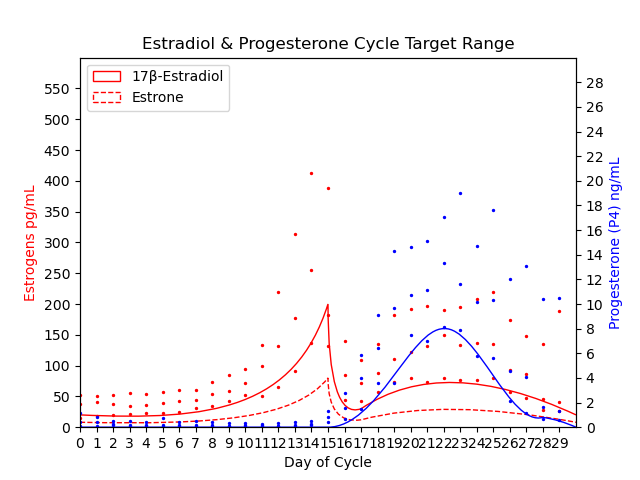

In [33]:
%matplotlib widget
fig_target = pyplot.figure("E2 & P4 Target")
ax_e2 = fig_target.add_subplot(111)
ax_e2.set_title("Estradiol & Progesterone Cycle Target Range")
ax_e2.set_ylim(0, 600); ax_e2.set_yticks(range(0, 600, 50));
ax_e2.set_ylabel("Estrogens pg/mL", color="red")
ax_e2.set_xlim(0, 30); ax_e2.set_xticks(x); ax_e2.set_xlabel("Day of Cycle")
ax_e2.scatter(x, e2_median, c="red", s=2)
ax_e2.scatter(x, e2_95thpercent, c="red", s=2)
ax_e2.scatter(x, e2_5thpercent, c="red", s=2)
fit_standalone_e2 = fit_e2.deepcopy()
fit_standalone_e1 = fit_e1.deepcopy()
ax_e2.add_patch(patches.PathPatch(fit_standalone_e2, fc="none", color="red", label="17β-Estradiol"))   
ax_e2.add_patch(patches.PathPatch(fit_standalone_e1, fc="none", color="red", ls="--", label="Estrone"))
ax_e2.legend(loc="upper left")

ax_p4 = ax_e2.twinx() # Add a second y-value
ax_p4.set_ylim(0, 30); ax_p4.set_yticks(tuple(range(0,30,2)));
ax_p4.set_ylabel("Progesterone (P4) ng/mL", color="blue")
ax_p4.scatter(x, p4_median, c="blue", s=2)
ax_p4.scatter(x, p4_95thpercent, c="blue", s=2)
ax_p4.scatter(x, p4_5thpercent, c="blue", s=2)
fit_standalone_p4 = fit_p4.deepcopy()
ax_p4.add_patch(patches.PathPatch(fit_standalone_p4, fc="none", color="blue"))

# TODO: get widgets to work when not from the last active notebook cell
@widgets.interact(l=widgets.IntSlider(min=0, max=100, step=1, readout=False))
def draw_e2_p4_target(l):
    update_e2(fit_standalone_e2, l)
    update_e1(fit_standalone_e1, fit_standalone_e2, l)
    update_p4(fit_standalone_p4, l)
    try:
        # Needed to prevent ipympl from throwing an error
        # while updating the canvas. Damn it's janky.
        fig_target.canvas.draw()
    except Exception as e:
        pass

### Controlling Testosterone Levels
Since having hormonal values similar to that of our cis counterparts is often considered a necessity by us trans folks, the first thing we need to do is suppress the dreaded testosterone(dihydrotestosterone). The left graph below contains testosterone assay data collected by **Wael, et al. in 2010** which we'll be using as our control AMAB refference dataset prior to HRT administration. To define our target levels we'll be using data from **Glenn D. Braunstein et al.** in the graph to the right.

In [43]:
%%javascript
// Base64 encoded 16color PNG from cut out PDF graph; embedded for portability and longevity.
element = display(element);
const control = display.image("iVBORw0KGgoAAAANSUhEUgAAAsAAAAGVBAAAAAAQH/XrAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QADzoyPqMAAAAHdElNRQflCwQVLBk1WCQiAABl+0lEQVR42u29CVgUV7o/XKAmM3fu8z3dgFuS//+hGxSNM/Nnc3fmsrlhFlFRoyYjKu4mAY24G0AjGpcR3HCdCG6ocKPgBshNFJC170Rlb/reJAq91vd9dxKFrjrnO6equ6p6b5YWnI/XpKk+XXXq1K9Pv+d93/MuBOwjlxLR0wP4Z6c+gF1MfQC7mPoAdjH1Aexi6gPYxdQHsIupD2AXUx/ALqY+gF1MfQC7mPoAdjH1AexiEgBcXAQhNQ8dvNjZ06OyoNLojxRWP6DmydBrySHmDZhL9vRALYgHmJ6NHqHVHb28fKunR2VOytmTIxaQ1j7RixehoUf9iX0EMdmBTl8N8QC3jkQvP0oOoYkQJOvpYZlR2keVZUHZ1j7Ri9CwVaLXAeAHn6CXv63/M3r99lO2CVTjl0IINYVo5OrCnho+mJUNQdIiSBeQoIKE6vv8R3rxaBI+d/sLBI3NkPYgobawhwZpgziA6Zgc9CRhpZg9/GMU2/YS/fxg2zSS3hW8Deo3TD7TQ4Okw9DY8taCC8FbtRuywZG1EDakpKTsVSCAPdcXwSeBfwFHw6cUoRlMLxt9tmcRNSMOYMqHRMMdSA1Ex22DSabt/Dvo5cmbipc+s4crSjzDRpI9M0gQ/1EVqaluD5rjm522iIraDuFNsVjsmYNG7JVxCGQk/0XpEx36CQK4xmuOXw+N0jpxALcORi/P3wazitCMkSpwk9IfAQzi3lQ8iawIL0pdWDZa1kOjLJZOXqWAxZGVyetqRyiHoWHUJSQkbJJhgB9+AJbe/PDZxMq8txCLSNxfgZ+g9xAH8FPMG374M/zbTvQ3hBlj8mwEcHvAm4qMgzDt7NJssDSnh0ap2S3xWECmHYQtM6g5X8xALUCr0+kgBrj299TkBx+qcrS1b6IZHETCb3f0LKSmxAH8+A9o1H/9VPfdH9Gbz8/hphMlbyMOMWewIv4svLk/WgbjD/bMIOlmzZWNwddj5qfsHgkyfbE4oa2saqoiMcCqkcqRjz8Ej2KXvkGLqX4pKXEf9DSoQuIAxsDSIVMT4v4FvTnMiBG6F28j9nfZT7G0CAE8RQGT1iFZIisr6yr5agfZthAhmrRmpk+QdDysGaBATSUR0XOmFGGANVNb/vT4Q33Y6F1v0h7tbkE+0p4FmEYAZcksAf6PP2OhEi0dA0gjwBAB3D6iwQDwXAZgsCsoKGiMrIM37SK98EOY3oxcsio9/TrM88pBTXloGME5GGDtrsxPHn/4fMi1VsQiqP7p6elFPQpwCRpZ0CLrAD97IyVlT0CREOAnExuGswBPVsDE7RDsjo6e4/uKH0GPlYyMtYgHU9fpZcvw6NX5iBQYYN35wEOPP3z8Z9iCebAvCVtzehTgxGHR0dFWAP7uD/h/tHL89TN0ErtO/OMdeHjYHI/t8TmGGYx4cFNlZcWcVwwwiJ9eWR6enTu98sKiWr86PJ+NpPciv+8ne/yHn0dVJGGAY7ZWLtnZc+giWrytsrKymnvLL3KjIEj8DB38HSG9+BzT9uO/wmSpxO1jLEWciZUZpAjQ9KoBhrVBEeHjFMqgiKADqTP0YYK1Vt+ffNyf/OH3rT4RwYNoN/Khb8RAWY8AayRWQOCIA7hlKKQDi9DBL7+FIIAd44/vwPKsC17ZTyLLw4vStj4Kxp/DuuhXzSIgfXn5iusQXFq+uflSNrgk0NWolaRyM2w9SB9bcWoLWEFSXy3f/8oxNaHPTUUtDmDVIKj0ItFBez+SYg4QwL9DLy+HI00ufJCi2DdsBNOcK/GSvepRA3kz86qDWhL/x3/QDIEOAtTYDHVQjqQNOdnJe3QTfX7I5C2vKgfKVFuYIScoXvyGbft1Enppn0bSG4LXkOplo1lbRMPliKKefYZeTbYABok7QTNzJEcsjW2jsEgPCkjYeFUBYeM1km2mlxX19FP0YrIFMHz4J+7wy0P2egCvXIp4rcgmwEo/4xHtq7DXQ90rl4NfK7IJMP2FwnDUNsNuD7devRTxOpFNgKFKYTjQF9ntoalyg/0T/v9NtgF2msAXRT39FL2Yug6wag+rcPSRVeo6wCVBXkU9/RS9mLoOcEN6n6Jhh7qBB8PdRT39FL2Yug6wNr9Pk7ND3cCDw/t4sB3qOsClsX2Khh3qOsBA02eLsEN9ALuYug5w/cZ/AkWDbnZVz32KBiZwZ+V1F3XddYAb773+Ypo+NnYq6Zquuw4wXfn6G3tqF2nW57im624Q0yJefzEt4xC8+Zlruu46wHn/BDwYAZz7qWu67uPBmGoXaXsviwDa158H66M3ziNd03WfwR0TuD3XVcEyXQc4V9y/6FUD0u0EerGicXvj6y9FuJC6weDe59ljj7phkXv17quvE3Ud4Ef/DMYe11FHAMYrAcDuoDr8ojWsCxf+CTQ5F1JHAG5bB+nbCadJcCnhDKSOb2JjhLV9LMIedQBgcPNt2BoYNFDWFhg4WFEjDYwkmXZt3yJnhzoAsNr/HXhjREXU9qfTy4KKUiNv4xhW1NznF2GP7AKs05GCdxmB78D4HfDxpJsHYXL2+rP07BzcnCd9/Y09LiQ7AIPyPQmnBBrOxlvvwMsy+POkpIPw5oFYGUxiok8eJfTNYDtkG2BwJ0As9ljAI4xDaRFlbF+SYwilNYRZHy3q6afoxWQb4EeBozelLAsUZB96gfNFUJNlTKRnNBurrMnPb3r9rWkuJJsA68NWo8mrLQtbxzUxANcsIo0AJ66DIE3s0ScH2yObAD9fSDJ/ldO4pl8Qi6A3yOASYyjtDgh2RUSE9wFsh2wC3EAaD7imH9+BoHg8iWOUM/Ait/4cmuJanfz1YxF0tdZl9kkzciQHVwqOEcD6wP1yxc218vXZyfsbw4twK3j9AKZvTTu6qrrr/ThDDgAGkwVvEMBPPebGbn8+OtZXluG7bLgCt9a/fs5/tVOWDvxiwau5lyOAfQRv/vF7GC/1kI7Sh0lnIKVZupZpzZS8dopG5sHcwU1IznwV5AjgYMEbKhveO5l+5TpsOKlAasgpkml9/WKVQXR1wldFu3Jeyc06ArCt8b5uxh4QW71nY/UrCnzoOsCg6XUDGOZuz32z3FXOaGbUdYBrXz/PntYxuwZtWPhq7mU7VlmOqckxwJmvnyYHbo05OlX2au5lE+AnQQx5OexBq3v9wrjoatd5XJuRTYB/kDI0zGEPmit9W0Z2yCbAmkqGqhz28E/h2eM66gbPnpTXTQ5+pWQTYKBjyYk+Xj8e/ArJJsA1yxla6bAHIP+nTMgBuqkfmwD/XSwm0H+OpYjXUA52guh7zvx2nSDbSZHSj3puTo8a5bCHC+GvPjGd66lE0k3WNjuL3A8fQ9jiuIaGrvd7VzZ1WOilgk5KyW65t51d5cQi9OLruIte79mjDhuv6OAlz/8Av8vplpvbAThOhouUOOyBOtHbvSvPTw+d1MFLvjsEf/5jt9zcDov45hMStLzpsIcMopcrGsCPVHe0IsX3RfD5/+6Wu9sB+Fm/fcf9/+Cwh9u9fcvo5TsQzlLYPYU0b3j8Z/jzX7rl7nYApkIJwhkJDPRyReOX/wVhvMLeGfUrzVfB9kGVDr4TZ8m2JkdC9cbl2Y576PUGd3oISbGpjm2QMihsnNnn4IjU1WLak61OyjYlvX7TM3Fh0p/sfZ47Qz3b/BHoyWT33NwmwE/Fw047dY8Mca8GWJkNqbBIhVmrUE3DLK7YvFzMbWk3pSa3zYPrwsTTnKlopu3VLKI9YKACanXA9EFqpyn4N1S0AtZONL1M73MlSOGob6fInn9wnsRjtRN8olfvaPxtUdoHquWrds8nBY2t0rCF/HuwKwfmmcXaP/kj/GmnnW7NvjA7ZNcerFlP+DnsQdWbw7iQJgpGpq6N+U2MEMGH6/RjBQjlRqrCzR7hu3N25WD6mNMMxIHBXTnZYQ/ne7Oi8fJfIYz5HdzwVtvv+UbsyCHMXqAPk0wwu+7xh/Dnz2x3m+sl3e7kCBztaDg2i5b15mh76rcQLv5U/16mYrKCf6bJMph6TnCWeh9pdp3yLTJRYbNXenZ2yUgnR2AHYBWuI5V132EXvdqaNpOkfD5on5gmF/KE1IP0XIX9Zwr1HGT707ZISEfLnBuAHYD/g8DUz2FHvRrg/xh1+P0hcOlbL4Q6f83wC46ME+oIO+6tz9ZBmHbOuQHYAfgJMTrae9hMR9aI0l69o9EeMlARtzr0jShh7VQqvp8TKqptapsA6eUy5861B/AoEj75Q5vAnkZa6yEzuFcbe9qKoH72olzTOtdU1wrq0kv3H5ng5Ll27MGHi9DLMMhbhF++B2Fe8HYIjo4+C+kNY4oM7b0+jIvu7g5LRE7/au0AjC1QIEgA8I3fwXZv8QBFm7d4sOKpWDyBZM6r7M08GFNb2FhF9/YI7jididHeDN6JWNhAittX1nu/A396syI0+0lkI45VrmVjlYt7vWdP3Jb49ztyPhXdjQ9khwf/fVBBZeJbT35rfJ8Y+A78/mN48yCOVT6bnGMo2PeoN8vBmOihpKYjOxp0nHSgotvubk8O9heLxQdnfmJ8n1L7Nkw9C3/+OBXHKkcbY5VBr7ZFIPrlDwKDO+1YrleObM7ovkq29jS5ullBW2E6aXxLvngbxiCAJxmLpuJQWroKgt7r2aPAL1gEXoaPAHqWh4MUji56+Bmk3u22IXQgnQEOpUXi5M9vc1Vp10GQ5BHceyM9X47Ar8BPoXoLP0iNeDsIIRwaEb7PgdT4bhtDR7wr0QzGAL8lAJheEiTttfkiQKIbM7K0qWGMLS2R+K0uxM0hwDUfQqXjvV5nyQ7A9NE5cyLmCRr+8Q6MOwv/MYmLVd6O/dt1vcHxxKp9lhYRH5IQQPqLRSQJSPCAeJd8OEDmyJarHlYY80p48FORiDBx/vvxHbzI/cQucrEyGM+qn72AB9MbDli0UYoSCXH1PX3s/VsN01pnPH2vJt977Rflfk3L9tsvpArSPP1k3TY0OwB/OwLXrRc0IIB/mARTDz5YB9ZnJx2kwnOYh7vb8w7YJaLBpGkLdX/JAsllz2eDfhZfkT4c9ODtw5Pitkd9HXhvdKkkNjBHo7OzVaPJ6sY4Znu+aWd1pMnP6cffwV89N0pzng3a7VN0c/iGwQrc2gtCCEAc0V9m2vT9xPA1Y3VVVCFVoC3QFGqqG297j2pqrtRVaivygrLCj41r/Bo02+AW3eS5ypA9gM3GjGOV6XikIFOzxAtIVYAHu1w0XunxGQzyCHPpq+as3GySPiZ+S7JHOrl6Zd3woyNKxucdbJQ1kS4dmx0WcSPH7Fy6GqeQQcPWFCggaCpgRwZ6wSJHLTWXDSznptL7Y/5THajSVKVFJi6MWzW3+U62Oge6iuwA3BrZ7FSMRm+oBGOsDg6OK2ydYvmRVnfr690nZ58MWBC/7nhhStOKplXK1ZAE+NtBr62Fy9Xz9KtfLuhSNIEdgB+7BQUFjXHYQy8KIWhSrvaxPRYrcwWQOl1DwZ5rx7N80r1ued3y+3ZE8aLM68sW1nyS8WlMivhBv/8e+u3Q3IOw82TPw12MaKDDHjI8egfA6rPUnCPvXSU7fqWO1Gmvyq82XlNfVxUcnhS1QDLq8PtRM4bJr+qvtl9vyI76X42drxNjB2BNfmV+RYHDHjS9oVAJaNp7M/Lk5EqFoK2psqosYVMKR5s2JeA/ezZXVlZaEdJIvGEDQGN1Y3VFdaOiorna0AwffLBkyPG1nRyZfVWZdKqPnremNZWuHNNQeF+gQKjz7wRKpRKp2ENsIHQgYf56SKXSsVcdiboCxqtV3E0PHFXZOeHYJsB1xsHWOehBvaenxLQyhQGL22PythUAkhR8dgOBK5X65VuhXegDsXQMmswyZ++k0927v37dFcemTp6MX5DtQMTp7HhrHRmWMnvKu1IfxspmpemB07QKsw+LI6ZWNVVZnXRaubzpaDiezKOjo1c6JykhKjkdunnjfQex2+C4DL8qKFmuARSbAFOzpqHhaW8HOlpCH/VUettiAuvHoClxzT5LlkrL7botauXHExKW4akcHBExpVAud+zkSLeIVgYcH6ewe5JK8rG6uqJ2+tM/xeSwLbZ5cH2oz9zlYdI1pIMb95g1rZgYQkLllvTyan4KAlMLtr1h63TapsrKoxHh3m4I6DFX8y+fwbHZtq9PIt69V+tHQnBSfb9RBg0rFOC5Nf21JpMYmLo26IZP3h/uko4ABmWzxOJ+DvHtuSoEqoADujtHhzQLliNqTkQHM8Vo5Y0hhPuKjQFoRfSJQDSlqqpKbvXUGOJ3OroQPfDmzMj4cY2raxfcLth45ui1jflblQfqV8pPlIy4GUj0O3Z6srpAW+SQB2PkrqQ74YHdYxURQdndj3alb+PfI4ADxM46hDCE7RAgzW2NTleWnn4iALHlYIS01Ofr/HwT+bQCw1AsWsS+a7615oLfrZFpIzackGwOS/e9NKhkfK7XJd87a+oviyO1OpPvx8GWkRODvLW8h7aMdDWTP2riftL0iWUHIcjP51Z6mqShltmVA7AZqb4KQNIkq1IDkhXoqKV4gVFvlrHZGyqQiFFVtjFhRQyW5BgJ+izzvekDsRmD4qQObbO2SlPYWFipza/Klxc0FWgK1QWaAl0z0B43X1e7oTJ4D7EI8NXlrYanARV3N8ZKxe9jnIyfVufu2FAVq5+hT5BfaJimWtQyo3jdkW0bCreoN565WBBbUAiqwQUR3s7n6hhhkMEltOI17E1JiWEz6ixfvuygLpMYhL8QrcntScwEdOgfyf0zP6d7AO4p78qysOsKwwAuhUk9AqddETr0tcyYuVCcJW4Z8atng/ThG49/d/7t1PdDVgecGF4i3hSW7nPM7874WxJiSKOZbKsKWMQi3YB9d69gZcU3OoDoT3Z2mN1Q7qxHQgjoUydOGvBVfSHxjNhaWW0iAHz/8d376dp9dOG372pPqk+rztZn19+/W3Wl6ZQ6vTK96VTptAvjj871j0xe26i7kw2p04brHhKDDUdYpACVFZW3IsIJYsDxjZubOwVy1wHO6JEdDdXYKiM3KBENP22xy6aWAeb3S/n3J9GvGOB/EDeRgPlZ03JNYZP84uljV5flh36UcGyYjP1x1xBDzXqiKys2xiIt2yNifpUz8nK3A1x2ogcUjfZ5X7OQIpTVewWyjrntVk+4k7a70eq0eeJt6VfmBLh9NFe+F51JfXHW8jS5/MSJlA0RkqCgoPG4N6eFbegAYDnpRE90D+TsAa2RzPwFddFn+YUNAtX+FWYQg88dOOkkEjOQ/DCTGLupdGDFam2z9R0krJZUHl++PBYbEEqj19jflxaSPYBLwg9dctxRyatPrai9U8jID6AsSiwI0QTHjkYO010wHU29AwtNqts6dGWG+7bm+o9K/G4uLD6nsfXMWjnDIkC82CNoNRLpFM6M1W60vXhHzA6HPWS+cs8esOtr5tnArUDPfdxT0gVZwfnXryolpkGbjvZ76sbI0KtyrAKJa+pr5yMPf5C24659+3r5ldkSj0Cpz8r0dEMOZTtkL1/E4L/uzHTsBdd471Xz4LI5jEBGHQvwMUaiqk/tK1mwP0tH6p4QjjdhhERXkcwr80anri5et2FN4AT1WTuXAF3F3TkREQFIHfFdkZBwWmfPhmHP8WT7f36mthPMxA3xFcvB1BwmSl2zSzLsNIsvtTd3/vDSM4xVolY0xLluHlnHUFtdWTF3TcafHx2ssuMfAZoqK8uWL18eirRr3+Wxy6OjVyH+QVo5025SpP/8zIn8wZpXPIP1BSfxg9C7JGOusU+kuTi87OrXho1lKt6BfVXDqn9UjM0cEkDe/OjskhnB1+YBe8WAAYL0bkrKnlB2wyQiImINtucXGFImkg4BjpP9504nkiK9itLrNI+F8uR1PLHAUelKVjoDzXlTtgp+oo0Ku12BI6xJt9Xbnviu010pWJ4vrhvTvgM0C+5u0RtCsjwd00akVHsyGYGjkbAxN3r5aocAf7Pzv3a2O2YRryKUtngRB3XGQgbfRwHjWfYA6qbdvdYB8b/d3/0s+5f1/LIJMZDrTii9fnqrJjL3IFUIqjUy49w3w5vN8on3SU5g+1C8YQ9wsCOA4eMR/742+W2HI9ZpXM6DwcyBMvZIv2svI3bRS/xY8QvoZ4/tiNwP27wJhoeAi+YB82oLgU4Hrv767s134z8+Mr544pHt69fdlV0lYd62BhtSBoN0QzpLpx0CrAr095E44XPh+h0NSuRmGMcvvvcZNMEu1l8VXMpa2bGi6XTcIBk7bIXpByDNsAtp0kgXqu9XVG+Ykfneke0b9oVdnapoDx04215YGHCWB0NwO0z6EQkdUV20yxUN2t/AL+mL+w0DasKPCKpKA7Z31DpQZ5i55lKEyr/fOVvXNFU3VWuam5o2VmwhX4rcRO4rzkAn72tPk6Mr8i23ZRkOyLwYHjUv3OWLHMicyN5MyU4do/jUNi15pT1FjbY2uQ3jRlKEwqS9lXD7zPJstUx4KfbYpGJ8RG6BfncXqJxKytFRY0/98mz0u1yRDeljK1n0G/NdLwcb2KN+E7NFqNrEQKOVK1ffqybtXFYsSBIBwQkTQFu9B8hMTlb7u5+z6AHsirS4Qemp+IFXVj1akDmy7Jpj9m+PRdxBa+I+09PpJeKRZHuoeBxZIxEb7/2qPHvAr6Pw71K/xJOB5mJKYbNdRRiEEDv5d8oAExfXdn+zGQwyrAjGbd6W6Rxosv60Tq6tvrMvOWLFmXIFtEt2AG4JFEvEZlUIXgxMCZY9HYteUqfuZp2eqVdWhaAuC7NN+ojnKnxj7YZTDp6NJoh/4989xrv8AjyPmod1qK3IBi8Jd5llK8tldLq7SyP2zT57T0FC22QH4O8GJSQkbDY9/ee3dTHZN9fqcNlfDZvNrSTwVRl7br6PnoS+IGEKuVKbrjrakkUz+JzhkFbAp6J3TYDQKMzPt4ITHWMvCFdXkV8RfXVy5ddAYfMce8Hg23XNzWYP8Y+34ZIcY0VENsqo/lVVIaCOYVntlgR7HEF1+RiFwytyhxvRyfsUUrPOOrzAkuodZO4AleqVj4aXraULSOsndCRGA1H7sE1jFIKanvAVxiq3YRHtUehYZsHL23qSdHgFZfzR60MQeyh3fIEVAG1fVMbiA+TqzSUjSsbIrJ9pB+DzOZan6wOkQ0hBpCfUXJW/osx/euw/Ss0azoD26KsDHQkFeiFyV3T3eNRLjMntgE59Onf43VVN162wCjs8uGaRZR2NZ35Zc7IFdZXBkaDJc17JjgZ4jhlE8cAz+KlUS/d3SL9o93+T7O4BlYgEkU2kuqBu+K2xJYcsGLm9SE+vFRaL3Pl18ObHS3MM0fY7IFg/OfrVAFyHjRBUFDNr6F0rZR26GBztrIO6bSomBiiE76lT9dNyt506YMZUOhijgdMZvJ161hBKi+ZURWVlxasQ00AqzlBbzAospZM7mjTKUmToMqlCzXUQUNhQuWvSrXMm3j32wrhSLBWNxIPw8aQH60B8dnK2IZT21cQqt445iCfwDPxMIH4b2cXuuoHAHStaOig9EL9uo1oAiD1NzkotoydjU2YdfDZ2j09RxtTdrA1R/SpSyoCn75F4AuNnoq9dlnWhK3WXUqYJxwTuKSwaad29yik3p2uNnkJ2bRGqPQnmyk377KAxMn1Y4DiyNjCQzUX2ShSN21kyBA0zgVVX93cllti4o9ENpArfZq0ZFBTPrX33tuEu9mbwerF4uMzs4vL0Qgjupd+H9JWTrLGn4RXU0QBpWITIxBMYPF/bpVh4fYg77kvV+cg3jkpEQ61/QFUqtyUbkLNni/BduSf0Y+iQXsGu8nEmwUAMnsB1TqQrtUd6fzfs9Jtmnha/E1RMCDewTaQHQDoOIYDfz2jWltj4jgREvwIpIorhm8cRtE0Z67rWFQswNbNfDgdGFdm5rlSBQuGvdKvVk+zZIs6hgTiu6Vnqetep9j0K/AexXio2pVMTmN9va/fHe3J6f4J78LopnRw/uCLj39AxA6120/VaRrkuTw5K11Ybdu5BQ3inZABw5D0eCMzJqRD3HOaDfBKkui3qTJ/QNLxcL3I7ZO2crs/gBpfvaBRjD7BabFnSr+pMsDeetrzWVYJ3RUASa25XRZylZhIjumGQen+e6QjJPg/WOcGDNeku5sEgYyfeDMbpJ5XTyE518VLUT2E8Zisq1zEJbhszRZF0HOFsunC7o8y0PrauSxF5rvaufLlKBmGNZzaO9LtGdqoLKupdM9mZWfM1GwIQuHnibZ3p05w01hcHe3nTksViNsGqXXJ5Na6f/ohGHzOBhKqqA53to/TsbSvPXyIi3BZC9SbHD9l5spcvonxPwjXHPbg6jKvt7kEIduMJ/PDjTtdLB+pQNtuxCeUSw5bf794kUxZkB+C8HKcCEV2dFOn/3UHCFilSy0GSE1qPLXpC9FdYNCJdV+ByanPzQgs7SLRgt8XellGOU73VJbhUVaZzz6GhjEToqMd0RgSmFMyfGpEVXz9wRdhWZ8ORBHzV0eer9eE9zuyJaTlO9eZiObhtugK+lKIBt6d3ymiex15FLTVqgAIfP/o4K1UjaRg7Fhuc1kxIVQRfejNGUucJJBJ8YIAdFvFger5ZTLRVashyJQ+mypCK8CPeO/95qKIz1xsl4Abj1ZnjG04buEGthGXMygikPStFbjstsUqaQP5IvEF26J5gMRfNaN991T0iImKq4/5cauz55WM04V5g5fZWp/StdsLNdHT60H6zh99jo+xyCXarLoOY0AzVIVac/9pE/WTPRUxwnPMEUgk+EMdeHQ0mfYLD7tQuncE//R8IruIJ9+A9RWeup0LMeG+7P0G4hXsxvKHWm53BqYTXSgXIs+JK+lLkVkTP4dVz2ikrZ2sEf8WXh0w+EgKszneKRbg0hABszIGtw9CD62d/0rkeihmPNGzJYIUBOkkqIgg2Dza9G/uigOZaaZj7AWPwhgnRMYNJWMm/r/FTGI6MuQatjlqA2jeHTD4y2dEAFQon5LRSVyoaFGJmh3EugWcTFJ3rgQ2wKEVMhslXBGH93lD3MINDN4OSepM8PZGYYf3yGhMPdBDnbtR1Sp30E/rO1IXdBODbc86ZunxaJaB1XWI6+urXkA5A63/5IyefxzpRMe+SKn/MxKlCAPPG3mL8jA3ZOTI9tulyPbZDqw5mpsIxHUKsM/boFGNWyb47ZNIgBFgf6v+pSSFBGyAUuA7gNiTu1AxSQE1yV9JHYs+efoonxG8QJHkIWv11xqcKHGM4Jb2YGAnVmxWwzrFJAmT6GoS8VpEzOQbotPfsAPx0+F93Zr7lsJNS14UQgNuLIP35KAgv7u7SBIa/itwV3xNvKCAd5c71pPJnHBtAEhGJffbpJGtysBm1G4L8YZu3E2fDdu83vj1k0mIS6bnjv3bqHYdxuWyRUxbRwQrY0u8s1K3vWKCLBSFZgnyC/YMpQRWCpwT2cacL67Ebiw6qvK3IwQayXIrALl7t0dgcXTvR3zbAIBEHIjqO9HRVrDKdNEMerYB/mwDhic6Z2QWUtw4qMS+HGYxrBZOmp1aEJ2Hd2Gakx1GnSJW3+yFONjA1P9AnLJV03lcIXLDpCEBHTbDNInAo7U7g6wQSrlE0EJdbLYdUaA6Es2QduM5qNgIkS7AJmttX44/rt5BQ27QE51hLdd+yVwFLvLJBmp8CXDIUVjhucscW0UTS9g0NjgBWqSbbDg/+Zsd/7lQNho5I7aIc7i0iNz+kyfVHvxE26MU5onbzxfgoEymejedgAqSS+t0HFw9gB1/wOeHhsQ0cdlsEVWcQW2bjNJQSk73rG8QA0vYd27xxygnrjALYE9Mej/jbwuRRDp8oz0WePdQSj9MQPl8NNRmOk1bwVCvid9iKhymsdx1CHGwPQToD4giJSOsYAVLdGJZaYzBqPhZ4PKBfxEO7ANPrhxdhj0/rjMLOItce4O/jcc7hEz1yVdYp5RySkUMvHM/pwFUP+BRcYCa/N28KSbz7WcSBZFhQy3CfjaQINi0HVPpjTQ3k1/JZPcCRg7A9zK4dpAH/ZvTeVqLAoF1VGdwOD3Ii0tNVPBjkG3z+1zvuHtzj1NynBCf4gBDiM+vn105T6KNGKJT+C6FyfgOSIlgbAwCZWFFTBh3kTcBt/kj4uCtzOARbAC8+ZPLWTFXOd0JXdlVyUIAmMM4CSWFjrQOqD+BMtupQfrb91c0GMDgE9NYBmEcMJkEVqCQN2f/KsjWkFoLzxKg7CuOpPxHORR/Q8X5Wz7MXDI5Hd9fxw7mIRWhSSGojevTnjp8PZPDe5uC2jGte7JZjBxES1oiMQVrqzSR2DZhAguNF4Eui3yxuafpVNJB0arx11ndkbQIM5N9vl8ubLDx7LGOVXaNogKMFsqdoyannAbON1WKiHzcGPvgTeNtiEQZqFRknfjGWtJSILSsl78GbYgnBLe5gvZMbKTa29GwCrEpYPDYh4YsBZuc3nrhGgrK99yF9Z58hVrnAJTyYjlq6MGYiTgvixLOlEsaEEiaU5iWzex2bQxvdKz+JeA/XivEqekIMhurYJEH+P7WiS89hG2CpCCd5NUvHS6+X+t5vD5NiB2ypIUYBuCROThtPuA8rgmW3cpw4WRlmWpjaQJQD802thH2EEmkYLsxEH5mBpDwkP+j+Tgxt6qbnsM0iLsdNS0lJMXu8l8NSZm1/OnxPUFHqWEMIgcYligb9dau326cQRuU4czYol1ltJx1ctoRV3A7jHQ38KEWQ3oBv+IQYafhZOqruZ9KdtXPtuU5Zwe2nSbDubMY6mJy93hgEU+IS1yn9IPpzJN03LcvpQidq6xvxXMJgjWEtyyAiOWlJw9w9fBkxiXlb57w3Jyizdq69GA0tVJv7gt040KTA5X4FFRHLXBGrDB6tht++BcHSyq50ct68yhxLj7YYnqrEsJ2pjDiH/wietexLlgvTi01C9G0QewoVZS1w3F5qxT26JC8zO+zhlOit5JJsPlZZJ5e7IlaZni1Th34M6Q6ZecwJ+CMpQq8w+e2iQ4qzCWdgEzFurMQnCNMZgG8IxhL+krAlSgvIcGEr0c/KuXYAfu7ZJAn7venpMUERvkXGUFpc9vdOQoIr6mioJiseIhZfu5ns8KX8biQIdTvQfHOtVqHkoVOfJl+KCIM7dp5IkIPDNCFHi5TZy3npbQ00UwKZrIqBhZAOAfzt+JY36s2saVEL5efXCYLBqSifoCAHwlAnCJzfAVLXQXX8Zx2+lD7G/+iKx7as8h5wcWEiF1UMMvoXvRAZpVz1Mt7yBtW8B7XO4OyDz5/h4H462O7vxqYdOGJNlLHrm/bTO+b24Liz8OffM7HK0QyLoE+cdkUorebIOeyKc6ODIcmYWkW8OzWo+tKNILzdRYQRdDqE2N7mzcUMaEmdMfuw9p5/v9OsZE+fkBm4BufaZhNe+irZ7s0CbJEozCHAsn//P+Y7GucRwKNSTRJyuMDYAy6yj5dxruPXPiD682/aCUIkRv8b064h9cXtIEjitRL6ZNNmFpaSsWljk9k1r1b0HlT6sCJBg22HQ8SL6KxHvvdBsnUrhEOAD+///DOVWYzGg/d0jz++uU4bn518VsOKaS5IDkpvkGFzDMVlo+6ANFojEuhGVEj/5Hn+/aN4RGuGK6CSl95qPTZ6YPDpys/dT6V7Mwo3WuAG6L5h/ffoxUNt3Ron/akVByJ+rjoDbZM95z8vaVGG2a7yr4PSZ5195nfcR5Yx7Si7r1rc/dW4lPvIWj8IajhYVM5Lo/Syc4J3DyfqFRkTf/y9ITybvm7m+5RKEIzLSeuYELedShHDhcHnRL/mw6wU0WZbilD6DybPE4SbAyZtB2Bl4DjdLDO/CHqpdLjCqCqzPD0vvNu37b//C/jrCFhrzPKHuNUQhd0LQAXv+26yJ0crMBu9MSpjEiNctAznf/HMruV5QooZMshw83Y/R8czLAIDrDBIEe1mUgTg3aseEgNkuWIfX9vfPekAYFheBC+TZhepcSRreVY1BPey2IfWyrubB2tOFOl9srU3/s3YQInc7PtFqO1vOYT08x/AeFacJzgneXAEW8lyiVVTZPgbdBO77TS4DoPDRH+FQYqAGaa+wXX8vlCr9whSFX3NtvMefcYRwEDrTLJ9IO9uz56ad+HDofBOBdct5e1m37MnlzAvvW4yQpGbiGCSeqXyAOuZ9LaJxAxm7hd7beCFzSdi3vvUVIoASbzfCr3rDK7TYOcxGLdiewA3xM61x74NVN/dzn902VpN6Pt0jGBkcfYVViul17mP5Ij8+8dLiAGFcvl5Yq2x1shLJkFzrohlofrVaj7UmFpu64Eof/4bclRNAyxmsrbZC+Na7CFxQofIkHTzIvf0E/jQS6b3FNz6pQPPKROVzPD4usqKysrKUpyTWtwvXkzgKtHehGdQ0JiCKp1Op4/Cl7QbsrY4RXISxLs77cMFvIm/QPuqsteWy1F/cthRQzebK8GN90Hce6B0bAeuUXmbr+XqrEsSiUQsEUt950yORiRhqmthE7dEOvxkVlZh6RmsYjCV4pwblzriPmzpQDaPVCYroz1VGf0aWpxI6d/Nxh5qlUIdIaOCO5J2w5IHfysSMwnVR1dW1zObZRcL0HwuX41eLiUESsSi4SkpKbiWp5MlUyG4m0FMEkoR0G6NDvRR+3QIHYZx0Y5dp7rb4K4cB3LfheoFHbgEJAqi4BpJ/FoSPb8ZcV9tM6RmCmJYmCNNenrsHFzIbFh07LyTWdUWmYmsYa6UiAjTfOsAVCigDQL30J0UDgCOl6EXx85/uU55yjoP1qNsOvRT4ESIqYBqxZw7DzXLTOD4heBShBrukDFcxhTCuB0eFCESi6elpOytkst5VLEtwoJuEO5ik/y44G5+2HZog5TiHMORPVUZjdSJQiW3ujcxHT37HPhKoTFNH2LVjCK8yOg/rJWXEGZc7R+EmX9Pu7/BTR2JoXXe09bj9HCITa/mKo08xeZMQ2FO2njnp6KRKSajUIcEW+TsMZpKkbb9B4cAwx/elctzHTtgd7OxR4unDx1LmjTedCqES6epWB8kIcz8GBDApnP6pTfBdXeemKHfk5AwS+ojQVJG8NbKgkqd7m/EIEjNkTEnPDB6AdKzzVS2YqRlC79LLVK+0gxTGolo7zgGWCmeEit2HELQvbHKgEkmpPcxAQn4m2YxtHqhTnMvXuoRPC/ALKL5VxGRY9JAR3kaG5BWzBg31SflJW7BEWEeuCLtvZnEIN1D4n3mhBAu6WUladpvLuEmFrhMgNzxpMrbEDOGlEEnZjBIFYv9zHq1Qg3Hu9Ozhz7ajBQBLa7dxG9NUCLCgYMlaCrbtETsMXcLGnWOWY9RXmYPUbeaa8ggIg0dHO6XA6mNy5dHicVuxMCTi4nfYEXiJUHYergasZ/QEE75u+c8IYw2e6V4pxMAa6+kyxwLMRndaU0Dd5qV4yCdjg/TeLtBqP2NG23+pTCx2HPVKYhTSpqzk3qBOkqaFSbQR+dAJrcyFeLGBuKp04/PmRwhEYs9VuTnZ1WK+vFmJFMs6N0nw7bxTe2E206lt9EyDLh4e3ssAuN23CEmmu7c0aDjD90YAUux0UUpcMp99p69i9S7ERy+p9mKZQ/s+fJSp2sEOWkNoBVj7Uzvz+hdRipdvnwjAlk8wnvACWM1VpBleil2DOKb9P79zoFMS5OJbccT7Xef6nQaHydA6UYerNlTFbdDOysHgyowxdozuAP1Erexe84YJ1qNyE4GnueeocyKx5df1mHHtvGM03uOWb930tNPiJEYN2b5AUYdaRWZSWW1oikS3MT4WYCMcVY1D5sAtwb5+wQFBTquftedMxjk/aXWqzmLCX/U+w8inbhEeyfM4yMF/55ef8iyW6iXMQeJBMFEGdUaq+qo58roGCbrVI353fQ4yVHT32aUSiX9grakN5M3GEVD8F3TX6xnrPV5OIsgScusjs8mwHoJ+vIkkkkOnzDXo/t4sDr80LcT1J7sM+TtdAbfTLGnqZc4bXmS6v4N9jmSCMI9m4mIzTEMHklsxe7bGUPkOdOLHjNRXYuH6uQNc8LEoimnzhPYh0GY9FKXgQHWh6BLucLMTgMMK75ZixR3hcNHvL28+6SIVj9qVo7aeWcIoF4qHuPQpAoS/bzZuIIXvt44DBwxXAOaXyIxrQ1nfkJNZtHmXxJ/ZEz96EMkXiwRi5e47Ueibqpwc0UZeBCzDuJTkGfLXmpvkZM59J5j6Wh3AQzK0SIE0nKcPr8x3m2gnTwzBtOMXkQY3NTp66lehc0YTYPmlytaBB9i32CQaDKDETP91u0zxKKNhgx9erxYFOiX3+Av3FxhMghTUf1ykBBiQ2OwZ3DXQbWtiS8gdfd59uiDdXEfa47KnDy9/Li35xZ7RreHbzK7pXpRP+/fkswDwfb9uX4KOsb9Kvu9UHtkTKwy+umvEuJ7SwH1K0n4YHwIZymiCi5GI7aJeIzQboGpbiukFtuKlbPnmxarW2w9H6MJdV/pdVBxssFXd8RZfFX+xEAr7IEP0gT+bjFv4oNvxntj2Q0sV7AhXPDpyCQuTwdIs0hlQKpEf8F/aW/CdFf5bopE7B4dKB1vUVO52NaKbC/jiXuF21LHtoimbvOL0I+BxSPpDU4C3DCLGGCFPdBJ57hDhA+jJlMNIjcFttesY5jtQUg3hbgxp4EKErb5mt0RXPuBeAs7YCMNUsSoykbxi0RPi1QasYgYe9KkSA4JqmwM04417W/vPX/TiWDw7pODNatg7aFSJ7YBmbvGEMRvrbTXCLz/H7gZLGkg5i0SC2m/xdnX8Nw1prdVoQW61rPIVH5tcdsjGheYg2A7PDiEUVuOGRgKdiTAxTs3hImIMSvucxDXW88d7ADguKIf/pcT9uBuC+OimZ2Rbz906mSQ7DlHZK2q9vcC1yl6a4ghJVIrXpkYgGEb+gZVKf4s87tJLNIlEuO/kgl60H1HDFmSSbwLle/pTzO2iFYR62T6sJ/RokZ/tUws8ply3VC4NdF65lUHACdW//u/OZE/uKS7bBH00nPoJ1gvc+ZcUCqZANZb24BsNYH9idBi+1S8lv0hgyTD1JanEmMTZhKEmDV7MBOZmnOecAvwRz+Ev/ZT0EwJmW+I/owtLYbg1QL68m6k5nl9XYUU6XZv4mNog+yV/V0bs1PpmEXc7q6EHHWL6tbR8eecOveCaITCel4icFE4GqF6paP31rK75IhBMHYvffgXIsItwiPAYNjFmX3AeWK6eCnhKTnI+G/XYHxuEP1DsTUkyQRHUHFpbqjYPXiNvGmm7Xh7O4vcT25uss8dl/3tNh58/tMvJ2qSHG9jI6r3H9SRNIsUluUAWj3PE4vwIR3Xbz12EcwlpGgZXFhQwvqzUjOHIB79JeEl+Uj8cTnikcY4Rn3AUmIAmsMtwxVmPTecCBW7Sf3S+ud3fJFD3U4AITtfHcCNTbPOPRREFFonHLbW7j+gI/jCb7DDdYvoYwSwD+NA0TKBSdOci+AlsJ4bzQDXio/RKkkQA3fLoHBLvekfhHtgttmeMkuaezFi3M0g0+oI95wAGEuUFY5Hr9rYPSyivqh2EKwlHEjeIGYi9jjY7lyfsA33Rntj08P3xG+vtngGMJ4jBmuaPnAOMX0fyWgg9H6o8nZHTwL2fGPcClJw/dAhUsK0oKIAJvmtoKAgEeGVkMO1KVkp0AHAjpyDWDpPdI+i0XA/cWLumcW8Tm/V6+BX0ZuKC2Jn04SCxW+g13YRtlE+F40Wn6ni8nIx1KQxSED6j3L7K8B5NrRAJeVB+XmnYXSPCbOKaeCocJMOXJjjLfIMPqhjzfLfOrMnB2sCD162GDPeEtDgNVVj4Dpl17qFRaiLqFk5N3c+4XgwOG8t198z0ZsV/s6EVjHURuBoZTCT8ZrYGEMMJW8IWBBeJNnNY5DnJnL7FAciMu/yofEDOuQ3hnu1icyM/q3eI0nj3jNzVVPTLImb51Vmt/RvzgBM+ROfzrQwYbwYrEDa5kiyzd/NOI+6xdjz8JPiwepruptcdhyliMusIXDApvwHhb4hc7ZTvTdjNnvCztrzxFtkG5vKi8ThXDFrkRyRw+C4mBCUrW4Vr4NKMSMD/srvye1WmA2YGCBrDxRKDxqZMjqUcJuepdMppTmOAf5p8L/vtNy2v/mm4tmgrzyLMsYmG4LMusXgDu4VhLxfPJHiq0c/580AYCa3q9wiIoZ3oAzRD0Jlj+Lsqi2RJTPgU6K/LJVgAw4y3Ff4cUP5kujXbAhEfGF701PpPe6L9YQgXoGOQRI4/Tla8KS+lVcrqxwC/O2h//qMMt/RADPfVGRsB+tz4nMMobS53cKDW4Yoh1UWyih/bpGjQzglQbCr/ELkeAefRzTbdJvBuK0E4t0D+hXViAbIDhORTCypfj4XX8sC/FfWTwp8bnsD6tJdb0IIcCsjAbW67U8V4/SjbzoCGMTjvGnmmtwLn8GKpIPw5oFlMsgqBbe6JcV43YLzEx5+gDe/uQEpuW5pZnln6JZoovOdft/fejtWNIhDev+RUClN8WS6JgUf1xDvIZxymOP/245jSDHhLjkovMw9B9zRXSGBvCwlZf0EhwDHWQP4xgo/tuxvNFf2tzscT/ST5fHby3KggEUIpYhUI2du9x/hfCUC4C0svc61kkATQqCf3XPRQBmoTCIsvIbofAUEWezJi23PYFBMDBZ6o7QQ7kUqCfuFAGCUwOypyjv/6zNzaxoIL/NTGCM9k9i1ozsUDf1ohbZ+BGZhAxXGW2XwUgTnyP9gSAcqPQCRyVa8gZ6+93T8zf7HFmIeXIR3hmbYEfdfmCfQFvS+O93f5LuhF48gHxDmtgV7vmlD/2NdvJmq/GKkZiwHcOJ2CG5FRKzoOovQr6yCoOEjdFTLqRAqkaUNWxXgrIbBUEY/ix4gHdU/1P3kfiRF6KMikUQWh/iBMshWBRScYtz6J413vMeZ5geEdYdArbnroV1VWSLyMI/uOT+xbJiMAXgKG6sc4ibthnwR7cNJWMJU9OV3xZ8RFvDoQ99UdKRb2sy2jKRWuhHz30VMz00krPEIdD8ID9suF3XThplMHyVmcouaEMg8syvHWYCf5sDSAPF0s9Nj3MTE71PxIhctw3kjQHmBTttlMQ0cQ5JXsRkvfEYI8gWxUJ+3qSLb8TXnqV2aDZ+NSPLyJozdgERi7F4SplqUi+L6s+Xy0oLNDwrTNnW59wgLVzObAH+3EwKNRa3Ayym7PA9m7IBp2etz6Nk5TFvXeTC99PoezUqzez3jU/jBZ8w8avdeRNrqwJkEzueJd3Ux7ievZ6CpV8syhQwCx8EppWaXgwsKB321+w+PMqvNSMdJ+YwRHND2ALZCAL70UzwZcdmnKGP6BTYCmOp6CAF9rW5g4zSzxuc8i0C6Lr7VDZsicLGtODlaOLRE4rdafzR7NYUQxLBxwO3M2IG5a6pS9L6DIYPMrZiFCy+sRdKvMdhJ72NEuoMAQ/hykKLNWzyEfCoWsTUScru+q1y8szjyjnlIKsUrGnrGWkOH2HIzAp/bUnZ+EO5oPBdvhxnsl8TsyZXJIJALz27IMRz8nXC40aAtRjxY6ZPDtyBFY7cRzRuE0aZiG+AdOiuFq9F3/hEJjk4+A6ndU1gDaDeEEJSeXnJm/TnmsI7nsk85n2DaG4v9T5nF1Bq3BWmE9cmNFEMBAvQKBWwZyTwRLjmpjzIzytFJRr3sPwgvh4NuQTplhnDHn46baBR+nfFw/86TCYMaY/EwOhzkR+IXtkHX5SoEmuq6YafuyJhBxvCZBwTrS0YkWvDZjKhHrFWlVYUttNpzu4iPzwBfYGfnjDdu45KT8EgkWSMyij+M+YwxLynYhh8Ix+Fr9Pq1MFWoKht+AGW4+5uEkcfYBtgNB4eIHXtXQl1XAU47c3R/LLtZQHnzqrLwYZohFcpA3+ZtvnYzCMl1VnsGX/IhXE9xtDISK8UemBlpdbBGZLQ9G37pSm8jwCqJEymL0SyrNQk8YmaEKvAc7j7WOErbAK8pwJVgHGenr+1y7so7F72upbNA0DOtBu+iof/swRjRfna4p2RCSl48+J5AQjSIMVaBwT5lxmlvmIgqb6PvNjCWnXZAdLr5aMENtq/OShFWqMuuUxXyODdPo0Jzw+rGzJNJIGYU88HPBGf3cYYEbKaVMRPV+MVww61QGMSAL1mO0Mp/eU7J1dBKyCL4m5lM3XWANRWxHXlkC6KXXpvp5ptjeLOY58F1Odwpof0febBSxguRhf5kj9rO8Y/O+GSB6hohu1YG4W82wziDWTGWdqL+jU2qE5tyl64DDLoYqwxOPPLuf59k3wh4MB3FTQVKRASwE5i1ajvf92GBfGyYbXhSsxP7YraBOagC2Z3QVKZv0CK2lIINU7qND1CyQfRGhcl7mwA/PufkQ3Q1f3DeduXqK8ZhC8yVLXwtZJzkxbgpXt+RDft2q+W69WdacAiBMmAciQGm9ulwZDHMW8BkPNHHxhBeCrNL6A2saTbJw2E6AzOuYRNgmnTUk4Fuda22Pbh9FvC+c+A8JyQIg2D+m6+O7ix3ZIjyNgtCZHpI8wx1Tz/DmCuVku2wmAVNH8rGJz4QiQh3GX96Hm79RcSMi/YXWo+5ahv2oLK7be8UdbHs75Ez1TCXZ7wqznD4XJA8PTFS0aFOOboh2Gs3Tq02f0JESEeQT4l+OeCKgo7BUUY4bIyZ7eBLJGcIGIs+AO/l/0gwPyeQJDQvqgJYtEvXuBTgLhp7jqR81CDwv+eXfYGq3OZt1ZbTqHDYu15QzHCOgbm8EBFiD5H7mWLsn6aDBg93SM1kvmZwnhgxR7BO/cRM5zZvVrppHSG4ZzErfFAx9nhk1wFW7+mKwb3+VFJkqsia7xzgS+KdJ6xtxFGznLC+k9zRc5HBlNHm7bZqX0i/2OXerECSa7h76TbmZKX4oDDV0T+YVBQg01C/VuiCVsN+M20it3XQJnUd4K4Ze4pXz84+esyadsZP5pfehAd3i9vcnKwR2UtpaEEPiH9hOwRJftW6jDH+A8NYW4TmqpxJVKDT1TJBilmk8DI6inE4sebJqQ9jvpk2kW3n1e4AuEtlf0HFxXFyudaqvsilakgazGf31Adw6Y8eGrL/Okkt3h83s5dic2VerKj/VXy55hSpKxEzU5CKYb4xHX2C1dtBNR5Co8zm4FljJWVUXdTWzrQdSquzbk2zvE1XkuS3z5u13YZjEL3UYEh57nH9PBec9gtnQIDqUOcrWdeeheBeGb/11rq/zJ/dokqOWAsPs791pYiREcGuySzTe+h306nfSD2bC5OOH98RgJ9GMOS4rjJo6vwiR1cmD7x+z/pDGOVgOm4oybtOtXtzcgEod+bp2VNxjAZIJXCmT6bc5KX7YCOz5imnlkfLipmMzZr8EGaZU4+Tp30IGVunt0GMviyz2zs7olaRNTOJTYB/EDtpTcvrwqZnTWTiglgbmkOrwTctTXxWIFsIAHYEKvptnaB30CdkDfQtkXvTGWUAMeCKony9zzYINjVVs/bR4kUg85AGZ6Kjlo69yMzwmg+gCotmzwk3b9baeUE6RmHevcpi2K2iDqUYV2UxdNXhg3Sh7C+o3xRdaC0DESaliLFttXsbA7cZeiZy4N9qJLLk3NFG6fNBTyTpYTUBhFvyqLT53lPD7oXPIrz2VickbNrIjPrCWVizCGCxoWbasa3MnR7kQBr/2HOT3/iG2cWmgrYsMXfwAcm8qd3w9VOLO5QkH5BO8mBt53NXts+/MGZzs8moeGeyFla2Pz/AxK28zZtb2cBFO0lvlYui1kiuTWmd1jKlfJ4qPH7yuDPnz1wum9o4J+tEskf2sq+Pz2Wm4IVzsIYRE8CRbPVyZijfF7EAr9ec+ZlZ/H59S1c7ygy7Nm9edqpby6b5qO9gmQdwNz09PcUxTJ1f5JTjbq2ah/HiR18caTzSM27A7d6mIhBI5lY2VYDV1L3svH4w6VJhVnMVaKardM303MaKGWTLOl3tdTCvWfd8XENQbFBQpPoMIGvWgguMhEJvJMGR+3cRUk/fh0octvV9DnmM+TJ//BTSoxWmd2kxMlykqcQMusiwEDyTtebDsVeoBOciHAYdUX3no+2PntEcx0uOirNR0VG8SfYRnhDnzV1N+GKlxYQ1R2xwgelAdV/Lm130MyCYR1Lz7q1UwAQFfH6Gmpc8dv3atAl523MHnpjGpBQAx0hw9PbkyUVQPTlr6WeopXXaRdbn+r8PQjDZbBiGXMNQP59EiovE6CtNW0w2OwB/N8h/rr9j42Bu5xc5NBpGRsvl0kAJvSvxhGj3Nt+7UXOg5hK/Ic0+pIs0SnbrzoQ/I3T1E0lYvgJ9myUH6I0ysLmx8GhO6f60NcnRPl8vXZMvK1fk7r+98ouCC3+B4Nbk1Qzktw3bui/eh21vmd+qkeVceR4HqSg3kXHzU2mRRNNeYrrtfztQ7DiMS1PeWb+IK1W6dCyr0zGcrkmF8N6V2H3VYgKDZM6clWuxMwmKF8YK62/qjHTkQPE69GdTs06njI5FAvAlGb0JLTJNzU0Nc/OX7VuyZs610CCfTcPVe8ccqq86fkB1sPTsJflysEm/tW07Nfp+mg1dDcQRE8Ht1UnGENCHQnckRwDjsr96x1VpO2vsofZG32e9rujP3YzzVFAthE6ahJYSdvXmbacv+U3Ph8Rv+MGSuvqvN12+tW1TjQF2uVz+KNpIob4Bo9Ef6eTo6DkBnqfRR1tvGX7UQI5gvnUqIX/FpVWlgx+Mj3s/fk3YhPN/ipkoOSWt9fpp6I23Sr4aPU9mA2Ds/aptrjcW76npgPMfiJP9+G9OxCrTnYy2L/b4aGP+SQatEj7Aj9+lbBG9AVMN7g5PuGn7Ky+mKb05E5C8duuKzI+Gl2ubm6klTA/KoKCgALFYxO6NmxBOJDxvWfDX+XxOAq2uGf/TT68/tSH7yrUTZx6dvXx9r3yvap9yf/2ZmP3HbHlfwtphXCFsTAbzhHMAH875+Y/OxCp3ckcjjhgz+gtDJQ4+EXoJB2ULMUBvcMAF/E6dPoRb2eivDL9LcGde3kdjywuuMYUaWf3uKVqgh6efCPDYnG6kpGnpR+ajv+txHmGcSTFoVXr6KVIwJHoFaJiBxVOS+Qd1AP8jb+1Im2DuXMVdYlq03FK7tLPIfT+h5S21E5pceOcATnWTjriQww6LMwLSMQONnVHx05MNuFIizg0a3OJcUsEl5lOtvDF8WlNVATAIe+zypsYuB7qW6RfWcYz4wVldywH0twl9tCE8IiIiTOoj9VmRkLDZGAcLjp46ttMKiLJdkbO380EclqS1nXfFXgbs/k2es4dCR6Sp6BwPrp0SPqVAwRy2TiONqPob80Eh+e+i1GDwpb353SMl9yyMOw9dcHTvtX22AoVv3qeWG7uGLetgjVEV0FQiqriycS+eztKg0WhiY3lRvXuNwlo/TVWZk25tt10VJm+swtZH9nK4b9Qlie2Yko2k3dApgDUXhxu0ZEFuf3omH0KQGfa1ggPYeAtwhKu7UCwaQtbfGbf7ujH3iE5nFpoKlkF4mHt0/ZSK5TKTz+uj1+DpfDEC5x8fjdTn7IZqG6qr5v6FbUvWmpiK73B4U1HuNj2BHBTsO6mAjqiTVQiANn6yoRIJNZOzWNMh3Bqm8ub8g2lvbhfypbcgZC5SdyR9DVePh4qNXS7IbARIrS4ekslI1YLNAP2jj82OlJM6oCWRzIFDusDuk4xBQlt5afnyWLQkisfELl9eyOURNqXG5q+ywq7zlmv1LE7ptGdytwMw1pl05Q6Rutm5xHR0re8lY7bdNG4GmwQickFYAh4ssAe3eUcW3K1mOaMmvxrqJWIxF01IV1/cNqcwJGtBUGzhLtW0uveKZ1xYE7JtQ/78+jlf7y6IvTJPXtU+X36RXfS1CNQ7KSlfYZCDEXfen59vXooRfFUt10Yd55Pkl4g4gbG9cwA/QY8KIszOV6UjNlaWfh+Cu4YFuJM7GlW57luN7FQ5n+QBNg7oAS+zU3wKYH2I0WRF7RINMfygqRPrg9ZB+kp6OpeZ/MmMgK3SAmlgv3Dp3eBnI55OypiYtm7WqbC7Y0qle8PvBh/zuz0+c3zeynmFxjoEQKfT3k1PP4q4hbdnUFDw3vR0YVKzVgnS0e7V4SyKOsZ89pTfUKHj+tm0Ozmoq7zRzE+2fbZ0LFvLqDXMh/EDRat2p4w95VG8by2fh4EHWB0axrmG0iGcpZWTIjR1QQYPcDSXpdLggwxExi8KFi+a25yvy7+1oDJfeyd5fNP9xvuN1RXNFdoCTb68QFvQVFgamTmy7Lh0y7Lrx/eeVLCMBoOMmPIdJGMEIKB9EhISThlq7jxgLB/YbAb2Xdh26bSuYeka7m71X3OHzgOMc1eKxWZSxMNBJ8IOPh3LVuMazjy1Jr0TM5iuzvR2tyK9U8Y9BHBzUAUv+xTzz2LYfWy4XHCVTdzemH6dSj9pyAEJyg0napoZ33XG+pm25Qsrv2BttTr65O5VBVnl4XODtsVm5/MYASRilCHBYpZUGuiDpGW8mj0T/dZwAihInhDvV7bg0ZlGeSHWIe1mh7Xt2bMHz+AEM0+hxEW6m5NurmXqyanDGWCLAzvBg7Xls5Za2++iZxqsaXUmeZYpMxmUbt5wrZnEs44+sUy60JjYQqe5Zki9bnLymOoGa6ZwCC5GzK+GOm1W/q6t0VcnN+3VCcRZvCdZnpV1ZXagR+DYlE0pFXyIHtl4/dH80hl5C3afGFN46f4JOU4MjdWSZitA2+bB2uKzWq15So6L9+E/JjEVEZfJAFsR8VEnyv5S+y4MvGctaB5ksFZAKmqQTOC81WKqgIJba44ZgNSHekxm63/T+VUnbi1MsHzEF7+HcIPC2jBYYyk+qKpsXFnqdXuBKttsmwRU3I2OFvsEBU6RFgq+ZVClqS7devxuwObAk6PvDq/YX7+yIqXho7pzTc1qRROQwWqj1c+eHKyrtFAQNSR88PF6JlZZxsYqI82y4zyYmhMWfYa09omaXS1qPPeDC9yUAXFcIkRMiP9PZCQp9PXTxzdXMvmRC0qCVk8uOyu37PKXP0KYbBVgYUoXIFdtzh3xcEZpDm8QZT9oqjx+MutikGTy5GtVwgmnbZbr7uSnVO5rCL49Itfr4rBbfje3zVl7ZHt07bSGyMwihwDDWxERqy3GBJZmC6rSwkcrTl7pMA/Wn04bfMeemyI1awKp8uc8xBBnFpyt2Zs3H888bdnyrYZQEZ0qa2pe+Nosqzlw9ENJeioJHRLQNZyuXfjNB7vOmu9z4y8y/2J0gO/k5WtMOwKMxSK/8XT9voZ96LUybFHytogHk29PTHIMsD7UJ9DznPkwWj8iBQCDeA+fjvPgl2Nnjym0o9qDPI+zeE/O+DC0vyCzHjjqm8+k6dodZqz/Uj8/96P5mgobGf3B7K1HHeeZZoikq2u3x82YvZbfN+GIrryTECDGokRTpZFX0+kKA84AJ+shAbiHRJUCdX7T/QbSIcBPBl/NTzYfGdiVDZl0BpOZdAbgckpKh3kwfS/M6yt7E7g1IJJEAPPZHi5EGrGGDfIENoEziPfdxAiq6vyl40rPVNnurmTy5A7UBG1+dHr3sGUfXSmy2F4DurspSPmkN0RMPclqdKVSh+5xdgD+BnEApbnBvQRJ2kmCsr/YTNVRHqy9Euhzzd4ETsJp51oEmwMabnmnly6oMlxafg1zBPpk2pZ5hVaTAHLX3Cuw97HF7Ul1eMLS8HXR1ZUWH+E7gvXRkqAxKdd1TCQuam2wl2XZ7o6GZTUufQQSXjPWgWQkplFsrDJd2UFrGr0lc6BFdI6QWpjc/irRm1Y+u2DwhDaaYTWXx168bmf2doqocdriEVfFVyIUVt1CGisvfxUoHb3iuhyngMfOhIpOA2y+o/HUa296NlI0goqQosFaa0snd9DYo19wwcvUfkqb1N5iE9DCVtEblk9+OomJt1YdGy1jn/X2lK+dKTzaMWr5E1S+S++p82wYTZ1GnNXCh12nuXIsKHB09CxiYZVOH2KeX99JgL9BUli7GYs47CaVTmwLkIwga8QSljF2NJRWv6+wcaPMpKmW90xCy8UtZgJjzx7zS0HduNvY2EOvlzBfLnX1yHETv5/uAvh92DoK6qh9z8f+MlK5vU72aJv2TD0SzAWciL6XPHpOAOE7OSErxHZyW/uL3IhrFcmjTE+/tHz58rXg0oozkPpqBWsP1XSQRbwcT1Zg+ZqPwwZJ/F79o+3qUPYXZwXglpVbtfETSNgeMOU06kH7aNyxwg4lsXSS9GOrbuJ8NqS+sGXNzaGJ6+LfujUxafux/bsLeW5ELYmsjCO8wsSj/fsX2DIj2w2C0YeOjpCaLfbYrqeAOuzupDWsNR0s+6u/NHw/Y8BSzpUZhzqTMLp+0UsG7RrEmnOeW2Q80R+d1MxEGVEphSQE9y6tdAF7YB5pw9xowzMhoWLb5TOX9z86cGT7ki1hl+crjNY07P+dSox/tCfW333OlIT9NoZiE+CaHHArPGiV4weoi+6QZ8+LIF824D2NyxxI80VCKH836Xb2nq3eglKRzGPnLbiPFSsFE8+ivRRxYptL4EXUsIEXDACzA4pEi+p7VVn105CYtu/RAXkzrPX2U6BFDujq/d3GBIh9536NDU7Ou059txOxmXwncjzldqjsL9UqGs7Y9sBiwug1BM5zjnR0DGFckuk0s2SRtfOwNFv+BWOEAxfDxlU5MbpOkkn9dgEBxlx5ZPzueVcr12+DyuBsnPzEbfudPWESr4gtWVkWv+auR3o2XO6IotHyxbAxMmaocVxkCx3HzWDwDZ+WR8V3q0TPQT5ch/jCndlsgLt2wxbHceououbyq0tHRyysPwOZAu10vFcR0N49ER7oGRQk5lUilroOcIc8e0CaeMgmBXNY4mG0ByMebNwzpGKmKYzn8rHKMHU8qcvCwRL6UM/51XhD75TzBZFdQKDi3hcLb00vlzGDqGMMFCD/bmx0KNFvU5Vc+MuyDTCuZFRZ6ViGpzuSHJQO8RpryLRE7TVCCVKNcg59cRi/uRHD72j4u1dvYXZ023yZfSblFidK1LiWmqpvb9m19zR+BqPHBGiqvC3y8JgcPU/DWSvsADyM8eqa5/BOdR2Qg6l8/6GcLw0v2dQa7GagNJR3TmwVcV58lDdxfTrzFPp9ChxodWuC69iv06SVX949+YxpbWVq2eb1YrFXTfRHxvDrDqeUsaAOhBCA1mixlXwQoMSwP1s/awzflSAxHUgOW3SGnSkkU7gjy8lqJi4mXfmek7HXueqSeKOqiWxMTz9VGysNYh/JDsALnIzR6ECscvsV7ze2khbNdDyraGjivQTACY09LSdwkdd6tnBc2XIDF+8FRN/y2Du60rjcqr8wPB3ddHyT4Tlf5SJH1Ub7LrSi8iApAo9Cs1sqRF/vzRt7ftl/Fish2BgLNMtGV8PeQtQXG+etuDOtiYEYHJkXe85Q+ZMratl1gFVOxyo/3yh61xrvRItcEdYjJNNJ2MDNYRUPcPp/v4/wPeaJN99UV1ZeI3sOUTNqWaD54kz91NLxACm3dPT90o9vR5jm7PjykMkFnQDY6YQc8idSN6sOMIwmBx6FjruPsOZMf1w6A3AtNhHN3V8lE9D7itw1vWf+ooc/C0t20FW1fnUrCxT6BZCaO3mvqVrw7SGTCwSRnuecvEeZc34RQHc7yWuqVdMMwyLqw4ZlswnjDK0txixmTWPu4AzY/xiOFeX1Cc5vTrwCOpoDW9Ckob7O8/piq2YRpELf0+UKYupo8rtDJhfwAFvZlbJFTu1oUNseSNYIpWqBNQ1JEaolw7GBTOA6RRlC/cCqlYxvmv46GpRqoyusZ52n4oMwD7sUkA0nM4erxjbXB+2ANXy1IHDs9LemHgediLan851Z5Kh7Mx6MMTlPtVJmPGwdoT3iyeh1wigjVlUGmhHNIIbdVQZflVvkg+1Zap3eGG14DPXmWumqjSkfw4d85u7WMStjugxwrVMe7i2RWWmmrlKZXGgRyPQ6HrhQgQ+FOdxZgNuv74fw7244DxS4F92b+C8z3mXLOIu/ruErz/kF4yoF7tKHD5R5HzK5oBMAO6Vo6FN/l2vqbQDiuLyP1GI36TQZc0jzuwN0PGYRVD0aIH3YE30ZmsYpvUh+MNAj4bJCrbizdXQsX+YZ72jOPGRyficA1mkcL3JNT0T/cscMnEyuIhE1kxhnGKYA4Fa8yIHnhQq8O47DpIr3OWGdftVkWsuzWXU8MmYnN0pqMISJh0zO7wTAwDHAYHecp0VccYtHjuFI5c/FyQmlCCym3a1XoMMjo9Ed7u7a3gsMEI5IdT357EnuucMV2pBDJp93AuD6jQ4VjTveHpEWq3+mIXMpKN8lHW7sAaRxLuT6WdNg/hIZPqxYukBXGL+ltzFgq6SKvTqa8247v/mEf5cXOcdhXA2hopGW0lUi64CtvT3bZzO/bV/Hj6fhvjb4EqlJJ7G5sjKSDdrq7QR2b1qxr/he8xnGS1O5bPXhQyafdwLgxnz7LIKqWuq+0UoQTokPxlL9VYCvwAIB8gTedfSmuYDe5SHDCffWrHacuaI3kGpcc1pO/YWyd0sV+G2D7Luuy8GVdrOvap5OFQ3UKgzvBEUbqc2osemC2Hc/ybfSiwX5g/WD5LBUPEwGwWHf378G/BfT0/fh00+gqnZGogEUm6qy01RrL3clqLrwuVt/vqxzHS/D4B2Nxg2SqUiBU3KtJrWMqrZAeqYfVjG+i3SmjENvoCefMpocVc3m8kCi8CGTzzvDg+0Ye9RN078UvSEQIJLcOVNCsceBxqUeWIwEaZxsRvFiWkPlIZwuByFL3p1p4oDdm6lloi6X4YcOzZVOU+M9W6oyaMy48sb5iI8FC1wIt70J44jh630+woZUwaYnH09Uvv6sDDLbtu0Hl/Jxcr2dqNHpsTJhw+dd5sHAVhUC+u4SycnxZVUKQZtgBscRbr5bGc5Kx3BZfil/NghGp501prkMH4K2C+9fntmhtNc9SeBihGku1q7PYFsGd/WlAGKyuetYq5HbypviPcacZt+AXC56E81g3Bl9p2BqoTLqQ3R45ceF9+HTRfB1IcBnoWCoW5KDyqw0N6WK3IMMti9enTTscDeVb4wN2mwEH5Rw6SAYTQ40ly452KxJ7HcIgsrgZ4cEaSxfP+o8wHQ+6zf+yKomRy/zlo6/yx7rOTc/hkBj/oZwse9WPklEHJ+4HcfJqddknpDBXNGbJFU5da+dIL/XgToPcB2zBQFtbHrS4tHpRnb7gC8WTV3TNaQvlXoETT2tnsuFksQJnP/65WgvLWrU6cB5on/zs0VTehqgrlKnAQZJPgFsAi2r2/Yglld/E7nCPqBmWMoSqU/Q/KxqxFo42PN4FuHvtq0+srDpxF7yKeF24OdPC2BHCbET1zi1do46LUVQ4advMQ451lkElPMhk98Qk3CU9b2srMsxhE/wpn3YzxPE8N6VJgB/VL6j9guPYAUCeAZXy7MDVLMDfEX2EJpWqNPmyrYRJDUZ43Ih3KomB8q4p0wkRjWkpOzByVsIYqEh4kfgvkovNpgrAan2dltHkk8jVl/VJhMDOmM+A998QgWTnbjQRdRpVfnFUEjPLoI4X4hVW4Q+4KAhNU6lPzEg3icoaGxKSoqg2iMPMOvhDnTN9fcviNymK6Cm/OBllYT4rTPjMCeQmkM5LqX16sjmrrIjeoYAnoVFKgispbAGucSQ/Iqj2H9wDkG4B53MysJKsb8NgHdoqx6lr0o+EEMQw+5XPyr7+IumTEEKvw4QSFOoR3XiOlfRtwehVhBA7TzAz1mA72zKypq9JcuCrvgTbkGBuAQ5pgEphlZvYrrxjBBisOHosj8ReWl0lIebeNUSwm3K1PlRKftOZGUS7iezOk5XZmddGtGJ61xFny/IOp5wv9MAg3jEWEVSjiT8EeHBHbtJgwLZI283aydI+FaRO371CQxCh3wHEuOhj1RAEqk1InyMZ3tYXM438WSlSWJ5oaEpUNirZRd8k9h4PvMUkzoB8MuRJD2nCBxHq1fYyhQjRU0zHu0J4Fs9uaNdXpuMh7s9uBN2D+NOiB/BHX7O9ZXy5WD+DlO5w9D5xqOvpFy3X7ltimMv/KqfsS3OePlXA7n7DDfe28uiaU+I8c5JvzF+GGK8V/Ig7vbGs9Zzvc4cZ+zCzeQp1nYCYP0YhWqMgvHXZeqIsXRzp/EIJCm4Vr7EdxuX+xO289GH7eO4U59+yB3+N9cX/H94Z5nzvFyZnGM8oiK4vpT9FOfZdj6x6f8YL2/nMp9w1g3+3g+NMSMg0XjnX/4v44eHjVrTL1xoDnf7EmP1AXD4M8MR7WE8i1nkuIfuAMD0rK0X2IQ+Qk3uPA9wKtcr4AHmnxB/Q1YAfsJD+Z88wP/9Dn8HPnJPAHA4N4Sn7vfjZczRSy4U9wcOYO775dKNtnOJSa0A/CMH8DfG2/5sBWBjXTYeYEpsvFGnpQiQLBYvNAeYHxoESzgoKesA81m7hTOYlwBsAMwnELAK8A336xHsPV5y7q/fWs7gJ0Y024fZAfi//rexi8NGgJ9xKV+TjL+lEk5j4gH2MN6o81tGqjlTZBYAH+G6A1Ey7vHHcai28QBTK6wBXMsbJv/+GXf4jK+gd54vfMY7HfIAg8QpFYbsdDzAT4z+jjzANdwM5gDmbs0D/PMHFgC/4O6fZFT164w1FgUsYrLxRjb9gx2TMZZWyCJ4n0wQdY5r5c2VL4ZyAENeOhQALDBM/v1Da63n+fBELqmiAGB6VnbLUHOAOY2bB5hv4gDmbsIDzN83hstNyO2+cgBzeVl5gPmHW9x5gLmnX1pkpRVE5Vhp/UUAME9t46w0wr//b2ut563Z3nmA9b7kk9+zhy8t8020W6b34gHmh84zOo5mWmZo4QDmL+QB5qg76sktOWeltSMAt4yw1m+nAG4dDs4b3EdfWuabeGlZt6DzACe+MoANVdPNbmZ1Xr8YT1ppbfWz1vrDB1YaYa61ClGUMTgeqvfDRznsYZvl1/bSMs9v+xSLJpB8yOLKeEvH+jSLfD0gbafFWcmm4HQGYHBXYbXVGmiUtWx0ZhlPjCSIVRaQ1SzJQJAXkb+XZTQoben/apYjnKFymWWT5TM2WBr7GmSOmjoDcB91gPoAdjH1Aexi6gPYxdQHsIupD2AXUx/A0H4ldQN1qAC8kDolB1dac47WWnFOwEq71iKVEY1bLfoAMvyRudCLM8M1WQQjolbQZNqBtom5l0J4H5yGBMhNz9M0m11Ky5vuQ9BocpYGZxFrEuysgXtV8ioSmNSDAPIqaHoWGkCh+Xg7A3Bp4HSFRSPIDbb0mabmkfCWzzSzs2sXQWq9dKEZaq1Yj2t5y6zXYzJILfE1S8cBjsugOsxESQO5geNIkOmzTdBWIxmngHWBY2XC89LWoqapgqanQYGjYK1E2JtmvedBqAwTXNge4BMUXFQXNkZwoXrWsGrUl7AJrPc8A8ESH0EEZicA1ocFSyzrxVCB4VxNF37wAxVUQLDENGCDTpoBiz0jPM6Ztn75RzTAv5rt3LdKZfCmb5iZO3arbxFqDRAaKZQeEQGftnlEePBn0lHBAYvomGCJ8Dx9yAw6xlciSCD2774RC8FM3wDeQArPe4UN0cX5BvB7AfplEWEDq2N8hUUvc30D36PRWYK+nnlGeJHPPcP786PoBMA1I8jcSIvW1qFCe6VhWKEDFC8Gkw9NCtWDPNEMmLoDpH5icm6x+M84V48pwFR8PxkIL9KHy0xb+8vA+pzakYK2x2/DZ0N/miQ0tejHKJ4NVQ1TPBUWN6xx29EeLKvhrRYAZ66mfGS1At+K0GxqtMZX9sykKuLLGfpg4Vkg6ZxqCBUsaxFk+/zrJzDx3Hc7QAg/3s64ry4CGkv7QMs74LA5wA98Byp+nQRfmJSxpGbNmQGPFAlDqPFww2ajGfzMyxTgfwwKklFjmklTy8NTr4gisL6oXQjwjQ9g25t/PyS0KYP78MXI1nfJNqFlKS1wZ9s42D6ca6Jn5ReQqqFQzxcQoYfrdPK2kaTeJIvtwx2oo/Yx3IUguUg/RD8E6j35cxafgz9+mqjg95s6BXDagStWLDiqkdolRWZtdeXDFM8QwCY2Q3pf7Qy8St00BXjL0z9CkPi1KcAvDi6VtY28u09h2u3+DUXgyNkS4Q+DUsCWt9E3/D9/EDRqH05C369gqwrqp6TtaBkB9b5cE+Uv8djR+hakA7km/ZD6dPLF25DylQkGuD6nBaEZzDWBtIP1E5QjIB3Od48A/sefFyvg9zxT7ATAqcESzndPMICoaEsHpvZhigfmAKOfKWZkdPwh03Of/RHSwWpz76mlspc+AWIzkzDeUqkZFmYWi/f4zzHo+X4naMkUncUA86DAmok3d9QMge0CgANXHXn3GQI4gDuLGhgmXvfiHUhJBY/ZPlrxfAJsF/Y1bPYhxGuwN46Rvtyhu/HnzxXwu64BPOjeEss4Q32olP/dCQH+vQXAtRhgpXlxcwRw69t6KwBLvi4ZZHouAhjkSaWmKy0VVo0A/p9/FTSlSdaaAZyxI2NnzUiTGTyfpKc8NwVYvPXRkJZ3MGfm+3o+FD6fYTKD8zyk62pNAf5hcHoonsGCYMTOAPwpLLasIP3kXflh83LlGODH1mcwnWwuiCCAv3+/3ryQPQLYT0EFFZkDTEVU1fGFQfHz5k4CZjOY1Nb71ZgATC89k7Gu1gRgpGWA+BJTgAeRILjlbVOAb86Av44UzmAq/HrjWAZgfnBtAR7xXQc47RwsnmDeCL45h1dyS4CfWQe4ZBBpdi4C+EvPAC78iAMYrTZ0mAXAbYMgvV7YqvIogmgM//NH/qxsCCJKJgn9MdokPpKBjxDA/LYRfQ0BXIYADuIGRA0l4ey6UYgHC77B+B3wOeLBozmA2xG2s+9hHsw/CdAU/rSjyyzi5g5bAL9j3ooA/nUUfGHm/IgA1odZbL8ggDODAvgEM0aAqbEKawC/Ybr3Cs6jb+27z+Df/8I1oW8GRNRPINsFzkWzgyQDy8eS7VwZOqgaiLpTD4FqviQ6NZiE4Y2mUgRYcg6+RFIEL5FggGdd84OUFw/wbSRA5ByWwcM5XQG4Zrw8yXIj8sYkeeKfzBsRwC8HFmaY5QVGABf7WVQhfIbnXrslD6bDzpgyAwbgdt+qBgFvRcJStVzx81vamed4nHwK64c3BRfeNPl+M9ah3/YFXsKjAq/Xj6QDrz8U6JBRBxr8tEHXb77ND1GPuJQ+/HoeX6xM71vVGCwPu14iWNsXb28KVXy3rlHCj7cTALcHWMvQ3CqW8OVPBQDT/h5isw3aXKRoeEilZinVfsAAt1oCDDM8JGYsHy9yiR6S8YKmp25S6cg2kdRd8LXFeUgmwigPkQm3v7kIfO4hqFyKO/oT+NxdLJAav3X3/hO6WixQ7tpwiHqch4gfNHonGYmuFp712N17KPzFQyJI5d0ZW0SJdKFlI8j0sGxtH0vCEom5b0LJIpAkEZvLXo+xLeLlSLMevpDB9lBzqRCgVmXAMKG280AqFo+ASR5CztMa4CeDdQGm0z93HWoSGh6UocOKYKtkhKBJH4XuWBcovJDZi66T+AlGogodlo3uITyLjvI8B+klnoJRdMqaZjWoB8ittGEbldzCbqZgcu+TFq2IzM/FKdK1FsY7bGMzbaVRh83QrBQyU6RBq7O81KSJ6YjLvyBoEnbG9AysXWjyGNhQyL50BeA+6gD1Aexi6gPYxdQHsIupD2AXUx/ALqY+gF1MfQC7mPoAdjH1Aexi6gPYxdQHsIvpNQEY3LNw3we3ZTZOPk729HAF9JoA3B5gsQNChZ2zcXLooZ4eroBeE4BbRBPNm1oHkjZO/vYPsPfQawJwbgS/sWag4om2Tn7xLz09XAG9JgAnfY3zMSnnN26F4BZTOwgk7aA2Q3BModl9AEL17jUQXihZCC9Ol0GaC8zuBfR6AAxm319SBPWhRNBgWCNyYz2DzlHBJD27OpXwLKJDCbdPwGLvIb+K3BDnCFX09IB5ej0A1o9RZByExX5ZUb8BcQuOYj9ZKkJGzS6ihqt8Tib9qcUzP3MIWDzy/t++vidRwM9zenrAPL0eAL+MhM/XwbTtuuI3VdOatTiUt304iSax8t2n7+nU41T7derBICYbLK4GjRB+c6inB8zT6wHwk3FZtyaAJTmwza91xL2r8Z9C2DaIhOd3PvzkwaJ7d4N0uvJkBDAJvxyGY2fNko70KL0eAGe4icVvamflwPYFL8RiMfZOwAA/fP/mwcMeYrGn7ohHIANwi9gj0iLpSI/SawEwiBkdPcezkAG4xTMiOjqbBbh2YlL2N8PmRM9TeaxuHAyiSAjK57jl9M3gjhIVcV+niz8bfw6+HNE6XqfD1e6VgxAf9g2XPfhEp5M/GUXqmRksB7rED/oA7ii9xFrGzUU31+pyh+gn32cWOf0wElIhfvDpuzrV1Me/1z3EAIO4+7q/fdq3yHWUnmD3vZYRddIgyZsgyScQu1LhRKX05xOgPiAocFKre5BkAGYR33kGiYvg4qKeHjFPrwXAGdjS0z62OdMzZRysD2VqKYK4QxAkfgpBiWRgEZ3ssWZp8xIS6SLihSQQODf2OL0WADOprUBTlrxKGYn+4mhKzDLYXDugohpCbQGpgU2oVV1AwjZDYfdeQa8FwCzRS7brMnlH1poRUMPkM7agn992tstXQK8RwCDNM1zKBz+0+1ZnWLdYxn3ibJevgF4jgKFqiaegCDe9/mzqQqvnmQUc9Cy9TgCDpgKhf26ToqnZ6nmVZE+PVECvE8CvJfUB7GLqA9jF1Aewi6kPYBdTH8Aupj6AXUx9ALuY+gB2MfUB7GL6/wBGaqdyAzSz5gAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAyMS0xMS0wM1QwNDowODo0NyswMDowMBJ6F8gAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMjEtMTEtMDNUMDQ6MDg6NDcrMDA6MDBjJ690AAAAAElFTkSuQmCC",{ 
    type: "image/png", width: "54.5%", style:"display:inline",
});
const target = display.image("iVBORw0KGgoAAAANSUhEUgAAAfsAAAFhCAAAAABSHVwrAAAABGdBTUEAALGPC/xhBQAAAAJiS0dEAP+Hj8y/AAAAB3RJTUUH5QsIAhQC+x1beAAAN7tJREFUeNrtfb+r61yX3jPf5A+Ib4oPgottMEyTJQgT+Jobjg+xmWq7SRUEuecQVIRBARtSCXJzCa4CLixSqfB7CzGESSVVGRusA7dKwhR7dxMx3oWrj49L6vARpZBsyz8ly5Lt8x49xfveI8nSltb+sfZaz1rrTyLU+KD4zb0bUONuqGX/cVHL/uOilv3HRS37j4ta9h8Xtew/LmrZf1zUsv+4qGX/cfEPLv+Jr44fZ/XxhzyODh0//ieX2/P7aG//aC33/70+sj1zeE19/Q2vD3smjqLAuIfBC/yoxr3gnzpRr/e/fqgTx2vZf1zUsv+4KCx7Ke/d9Bo5wU4cLz7up7Xw3wnUieOFZU+vwb3fqUYuqFMniuzxYhAV/mmNW+Kkzec6Xc++93vVuALXyb4zrBf994vrZE+v6t4vUKMwCqz3im3/XS/67xgFxv2e7iDrRf+d4nq7HmF475eoUQjF93gbmFLWM/97RAmyRy3594mSfDl+vei/P5Qke16bed4fyvLhmuzeb1LjUpTmv695XO8OZXI3hv7196hxO5Qp+7Gqd/rvCWXs8TYwa8/Oe0K5fD0CavG/G5TO1Qzqzd57QemyN1m96L8TlLreAwB4vdt7Jygw7tP++xOoN3vvAdf7749B2bXK9/ioJi7H7AT3frEamSh/vQdQc7neBSqMx6s3ew+OCmXPagL3Y6OiOR8AOLv3y9U4iwplX3O5HhxVx9/Xm73HRdWy7wS18B8VVc75QL3Ze2TcIudKnaLjMXGTfDtBbd9/RNxC9mSqeuQ/IKpe72OY19+iRum4WY41We/2Hg03kz116sRcD4ZruBuXyZJe6+3eY6E4d6P/6emyzVst+gdDkXEPANB6P990delvh7Vj93FQZNwDgGQmyFhc+ttXVi/6D4Pr9nitS39Qm3gfCEX1fFI2pMMu/6GskzM9Cgrv8cTsk+4WoOITqM7I+Bgonl/PK/xMGt/7rWsA+ca93PwHQC5+fo571kP/7siWva3pNqSm99cHcsTl5EAds3l3ZMpeOkLMpOWK9lpYpYx7Mlnt2L0zMtf7wLCXHhTh+eLN/HnUIZv3Rua4XzpoaRIACwFf0zRNlfZwWSv890S2nm+YmCkAqg1wRkA/8yd5Qa+Bqof/3ZA57p9ngGJMykULpftjqE7Ld0dkjnu+0GCQ8dSESI6oMp9PQJ2J+U7InvPHkAT+c3uAldwENa09+3dBHrtexZLhTNWyvwceoSYq8To12z3wCLIHgKCmct4cjyJ7szO9dxM+HB5F9rVz7/Z4GNkDdfWNG6Oa/HoFweucnBVAnTpRTX69ouCvN/gWHw3s1ImHmvMBAvzat1sy2InjDyZ7AFzV3r1yoU4cv00c7kUwawN/qVCnTjzeuI9tyPXEXxrYqROPKHsAqCf+6lF4zrfRqXJqNuHXM39JYCeOF+bnmzKYtqoUP689++VAnTpRfH9P5rgTVDszq7riXglgp04UmfM3NyOSQcBYZaOTV2hG+kBgJ44XkX2KakEEf9piVREuiVDP/FdDnTh+vZ7Pxyb6FXrffavW+KtBKXs87nWCyjJqcK9OyVsNSrLrEcG3q8qjV2fnqwbl2XQ5pBpWtvQPn6tTKT8qyrTrER+bGFaz9I8R3OaDfCDsyt7WPn3Srlq4+bgT9KtY+nk985eN9JzvW8wF1EIzzn7nDN4OkSntZSVTtL+oozhKRFr2C5cAEJfnKbPZoRREElUYfeoojlLxJ9HBITtjdu0bufQ5qRSqsPnJOkHnZfDVCYEe6vnSKWdlJQL8KcqfpaeteukvBcXzbOUB5+WLn8aytvKWggKyv2zR5Vyqkp29BMCulD3wMZCWfV9V8ggiXr6vv1PP/FcjLXuDKbBKIi+IIINSw+xpXBv5r0Va9owAsEw1uljvIIJt9TrlKelU7/evRHqPp62A5gpNcf4nOfd4R+EvytX87MqoA78e5NrjubB6HVQaC825VFM8lyYwEzW3ozDSsicoE3jVK30gEYc/bJVo9Qmm5fWlD4XdPR7TXGV1M35yvTbIOfxpIfH7i8P9gok6dLsQdm26cjqHkbV3uma9T6PA2j+cjxbzo+qIrJN1ncLJ9X5H12O5pFqW7AGpEvHbM4xyiE5aHjA8sbG3a37PceTT9dTCYr0bfkEiLlWwfJ2GI6WL7OtVGxKt5fGTJmo/z2XY0fWIw1caK14R43IQQaq5ATYaZifcYXNJsIzTFygV1Lbe3NjV9SQY69y6CQR0gmUrzN6r0UhnqntmxeH1hu8C7MheWj8AAN/PLujlW31XMKEZORx+nGfJlgAMK3Ac/xqxI3vCtw6meH16O/ftSifP0E8NqxcTUmWLP8+jx7Km9+TB7pyvTODZKp7wqKiu5SpGa9UP15tpiQBZr/xZ2LPt9A043Wmz2FeTFlS3UIrETblMIsjALoPrRQiCetN3Fruy94YW65lDt9i9rJ6J4Rl1Pd+sQASpiln99u8D+KhDOk5in6spKVNCJ207mlj/5yjkU3P1Pfd8Lsvhesna2J+Tqzn8pbnaFsgoAslONsF6I6nnFgSNpZriarYPjQHYFeYIeMfYlf38e/EdsiSjb8AanTqvDAJ1swjgKRBxyCAoIa+P6Qe1we8Qe7oeilfJIJhwMDo9sJcAwucLb0rwS+D6caDy7FDvD7uyb3/5jCuqHJvnBnXHkQgKVETkQDlUT1NOX6k2/G2xK/vnZ5RfCykBuU9FVQkiSGW1r9XaaAygimiRd4q07G0z+bh+Jaox/bzmx8QlhiWwvWJ+b3mj316+W7J4WvbLfq9DgD3Dje35+UAYS9jLnLO/nIbHOQEEAKosev8wNBb9Wzo+S8TO/l5aCqtmFoOjPO5GEUgEYNlEcvTbr4Hjnr5MEuT1ocK+4wH99kPXe8m3vydPVl4N71oQCHLayrLWS+WBlgGduQ+IZEC46pVVG0BvWfj3d8VePN6DC37dyjHgn9f9VBfILttOBJC/iGt/FkHHAeAYhX57dzxg/vx84FyqM+k9YopPLscE5wBoiCIaABlad959p8reu5V9EuB/audPro7VtwsG8xgSgH2pB9lkeLc1fvY4W9O5+67IzmvDz+FiReLSaZwAdKAA2BeEDb5jT9Gu7K32CuH0obXWAxBBqkXrUFwXiF5Ow3jzQnEPUIsxrlMC3wNSspcENfoFo2pjsqoAEYe/KLRgx2+uG69WaidExAGoRYsAP8d+8p0iJfvkFQN27zYVAueQ9jJnXk97hrSRwjJMeNq+3sA5ADCl6FfKAdmd80dPTR2jgre6O4ggVR7D3zA0YKVX6s7ZmwJgKqACmuBjY4+3I3O4y+9r18uGDLIyO2ouSaQCgezlGDJPYJAMOgQb6NA7Cv3OyduRwRKZvol72fPzIk7wcpbwR6B0yhZzqDGVxxZABMCEJMBe4plDvmen8K7sddZGK+sna37+A7/02a0/AJ/vhnaNLyOXb3sAfMUIvnqXpLDdOV/L41+P53wZYNlaxs5wuf4gjwWJYHl0+EtLoRiZ/OSTQJBTtMwHjAfNFYMNDFsdZEoxvd7HY18qhWUrUYR8sAfqCFIpHFFhKhKQJMgAMCHjEJOLHiMTJUKqnfpwMh5diiN9MOMTp9einLLvq1UTWXG4GbqeD4W10uBfxQAsCzJYtkpM8JXzoYojYRv4OZKXAfLpjTDE2Le6c+b5X5K4uL7CiPsWUy6mYy1xSg/nTJ3hQA3H/mK8mcNz6nqepKtX8XTHYAgAxIbC+/UDIsBftG5L1UzUwvgrxP0gHBGkAjuuH64PWS6h7yOJjbLbI+pz1R0DfoiNqak7xnA4hs8I8BlJxZPeJhUjzBPbhFRn1ZA9PV9fNTPD7y/Q8yklay4VFGJvgVS3tpZxDhmUmeHrAhC2/SCeApSFnrm3oZYA0FpKEOBBrvtHiwB/hk8vY0cBuhH7JltA2JN6N2yPP720pnPj05vOep9+ajCsLlY2czxgGPa+nIuq3bPnd19hZVGQisbhEqXvoYJlIolbKUe5TT+VNgLA2mSYbJeCuEkEAMtNMbtVfLajL0OFXgeWbTiAS2w6BsK5A9aZdp+fLTTH0FzqAAZebGZwZom56bcBOR/hJcgte+UBhnWTL6CQKNoyQLBRFKt+LiFz739D0LpNQDLuE5a0VKyZXOIGzw5jhNGUtTfn2+0xgBAAkwBWBJIrpw2mWEKzDgGsFudJ13v+e9uUi3OXlwWpd5EoLvG7x28up2ihkooLWyR5/Z8fzUdDzYAwHxGzTakbbBVPh3L6CkWaC8tAuLk27AFAb/kKnQA07c601TTYdCNq1gao+ZqRKDNKw2s0iLzoPEhEV4NEFHn8+Dkh4hZMJkJEUQkPO/6UCZ9kvWnOO3E+KeU+RI1BFIkGNQaRaDQaDS+KokmjISIvPuSRiLxBFEWD+IGDRsOLKIoiagyEoAaPuBcJimgwGUQUiUaDiyianGrd7h7P7uTQxEuw50vdpWxLkoRSS6RsMHKK18P2FY/Y9VUJq79vubDKyU4m0wbT3S1XxvZr5/TetTn3eM6N9CACAJ8dewlrGxOW2iX4aokWZj3oB2Z33xopfVSoO3Ikof7XTP+WSxg9lfLhKP0/2mnUJalo8jZlV/ZdvYviFIgLMNK7mB/xnkh9xKb9w5gKnpwjZnl7G0TLJTCn6FRExCUCBIVtP3IFgJrVf7LysSv7Vhdh+5BtXr7XhrMAxwInrBHHWDv+G1oxArcABEukLDWE+GhREAgyQMEkDfQSEPwH0xvzYVf2plTjfUFLGrZIPqEpyuwDdO5WJwwITUWw2c5PpWLMZ2SzEpoj99g8OTHuf70uXcX9sKP5TaghaF8t9GgScbHWLaOIX68en1TePR5FHp1UhDntbzLEZMAHA17SbkCIyWCQ4/XE7h+ist1IGfDy6fma+/SmrN1OLPXRYqwJ+Ivx+qLKJjiplMPUyfvHHq4DrOmU5UxLsefvzCQuLaib5p29Ejn1/BUOLUHWiLUkABYCvgO0V5W10naYGp2j2xw/lfQHGUxby1Lyc0kEmJ7kfWWlE3s32JX9yxT7tROGahGqDuKwQ84lEFaVtdKfCUArmOAt6RlSldA6QsL7OUr8+OFVXlzkNtiV/XjY/PKy26NfXxEsiUlatOLPUh1fT/UkoZshOwnrXALHZGqQ19vsOQA5DXtsL4cvNSVtPC7vGr/Z+Wv4Kn6+9ncOEREDRvqncL1qsKpefLkkpIzWR9HXn+CGw6xb0bjDguHQv7JFNPY6zJ4Od2rxGbr080V5PjjSup49+9FkOE4ISTlaq9P1NIMtwkSLsp1jBKJ+b2YsQu9YE6Sl9rN8lbUnlWqRzvTnO1en/rklcul6Hahu60Sgwo7vvSrZu9NZL5nO7ZmQwaHBX5kz9qoDSllM7UpaH3Gp7+4D1g7y83p7NuJMfxvjL39Hgj+Lwy1u1n6xDD9eJkhEUdTYf5KgaMIFxR4tsWMHEDyKosng+N1ybtuzICaDweSRt/JHcXJ/v6vr2bPRE14yti/Vjfst4mRYh6G1huYun/D0c3hZkk4qp8UJ9QPPj0H9uBa7sv/6Zn2+BW8nEzTSXZq+HBw3mYXvjOKCSTtJOknZpnSyVDB5teDi7f+vQv67dr1Pb4d2vQPcJh7Pd3AmfZXURyxwdhvaV6tmdnU/iQBlMHZ9haywvwdBTrvet6cm6Y+ROei8QkWuBewNcq9vmNLK4v0RCGWUT+eAVMG0xTJL+DwsDvLnZ7v+HzUOV+oiSXiXD+XE1PsLPAr181QLc8bh6is0r9i++w/9EfbAZVBCcl3OARlY7fcx/+9gLyar/UqZWSJPjvvhvDvPXG8rRL89lheyt6RSudb+vsJ5H30c9/mQE2LOcX8VP1/OBaDdiPF3DN6wr0YcGM4zYwrX2JDjz7e63/Zgn41ZISSRH489/+/ggJ+Pwvz8wADQDe746vGEZUNc7GPNSNCvRoD5NbMuIyX635VmxFthV/au/hXNgm4K2bFMYH7/bD1f34Cxdpn2bSJr8ZdPePqWvaAljuTFe9j/7417lwC/YLgd0O853fsveU3gzC7uVMFUojO/GunG1+aI513QYvv/w+t/f/oft//2/+4v/9Hv/+Z//Od/e/4nf/Xnf3b8xL/6A/7lv7v3CwF/dP7J761/9q+PnpO9f/FP//KPv9s72v+rP/wOAH4LAPL3vz342Z81//r/jTj+uPiL3K347e/+1T/+h+pv/uvf/f7//jb3jyrB3/2f3x0/sTPurZUDhuK2nTvq+OlWMAun4mR0l8Cedk9K3WDOcqMfkH8kRyuHw4FlZi6iHcRmJBUEFUcYFsV+TFaO3AuPatvJg2PlG/s9c4+UINViX/WTVq9zthbDOUillldG/1yBnHu8TkA6isU3vQ8w24S/2uvfnf2riPj+2k9e32FFWfixAhgsQ+Ohxv8eR7uLsDe7Lt/OXZE5a2lgP/ZqNtnLMeTT0UJOfslpsmWwPLMBqMgxkHPcY6wZHaeSFtwEGstgzktxaHY2+xpTb0cv57KM0lxbxA7gTeqnvebefE7YYXJw3hB8kMED2YvL8Thl/eJW4JMoGvDLfye8M2Qcb1BKdP3O84Q3GUw8PolEqrkT4l4UEZEXTaJ1pNGEiM5EHU0iMYjo/NNO8nZ2ZS8GXjTIIiXFso8zI0SRx0V2d7kNBEVRJBrl37ea5k74YOJtA9BEI4q48AZRFAkeURT3x8kgivggptIJIeJuKpK/RExtoygSZxhpOWUfeVxk8tpi2YsJb3DvFLHuPmhEZ6L5roVX+js2RCQmfJDc2BtE0cQbTPgkosaEEycviqIJj6LBIOJEk6hBA494Q0yISEyIGpNJgwsuKPKITnf5nLIfUENkzuDbOV8MqNEQUSRuQt/MhkeeV1lThMdL5mlOSHgkIuENBiKKRMObNDw+EXwieMS9mHg6IaKGmPBIcEFRxEXkCR5F3mQyiCISjXiOIBFzVY9/lXxczbn7BDd/uBGNIadPTdZ+DNeF5FiEhs7alVT8IeIyKBikfxwmm2JESZUO0Nu09Q0eMNJNQHGwGYAlGwEUqD6AFaAIHEpjyli2AFAzTsgEC2hf/PzDOlnqsi8yxlyBaazHeK7s+6Vjy+YlYI6v39m0qoo/VA7da4NdXprlSV1oLgVdxBGxbQAtEADGPAwJALNNX8GlbcCRbEsQRuSrix+/K3tDx3R+mU1Xxt/ZX8ys7py1i5q+YlxAo1qTy/xUkIZvib5huZc68S5BfONK+EltDQZGOpgHZe+eYm0NXTSBkeXAZTrYSAFgYP0RCBjpYAUcqHuLGmWvlydzLzQ4ES+wxdpgkCg4OeA1qCGiKBIkvEYjeSgXERdcRNe0Id/TSwn1uBFyrfeaS3RN8pCmB6m+fGp2i6Y8CwWknmtI+dbPOFHb1FDW23Qec2raino6YOe4wXXgHHJ4PdfvzkjH4V6dVMEHqZef7vNU69sFQmBVD6CuynPpwgCoGwAtOC6Fo/hHr5bfYStrdgv+CI3fbT3MNXbW+0CBXZHh2tUXoRIg4lIpx2K9SxW/2TLszXN90jgupwWYGoJAJXm2aOSgfbNsKBUu/bdB2pejrZpYITNp1Blfjp1mqsrAQfcMdeVAIZNP+ObkS1m1jcuR018+j4J9/9NVyp4MLsjsLB+Wn7tGrroZn95yfbFL/HjS+nGK8D/8ZV8xGKK1fHZG+cTW32TfsJ2Li9+cLyqgdVvOJVxzGWTWFrsn8vrxygZ5cVIElniu5TRMKDXD8I2GuxvxFkxgcZboux3P24FuXsyKlTrDj5+nzvYNE+YlXPOyt/23Qlr236t5BHnwsQgV65lSN171mNo1F9jPoMksE3J+jibcB45MCxfP709vBPs0i7uDg2xjUh2f6+JCKO907U/LvrpVi4MD/kIDYxDbIbU3Wrj69Fmdsw312y3o12d8kSDgNE2hPR1DqiDVpaTO1NE4P3tmtNINCu5h2CyOy20FV+TV5ANO1JiIKIoma9+v4KmU/WcNS6LRaDTKIAucy94fRRGnQYP4Nr+oIBFFE+55B35+EtGeE0VMMn3gt0ZeH24eXCH7ySCKBA2IBkJMKP665O36AU8nfRENL4oo17cVkTjjdPNoMDjn6hUeRencMo0oikSDNxqD3YSzcdaXqpzGZSGXXa+vACAzlu2K/HpmXwNcglSWAjM4AJ9xkLFV+vqKqRPbPAVAYv5LVlIYAGQ7hs5ObRk4C9g5MwIFBgBjk1umKQlWs4fR008tvZ8j+BzD7rFbnFIQHglp2fcYgPPldYDr8u14sQuGiEOqhQXWi49viO/9nnky6pHBsVbN7rifI8+O45I5PLllOJ1/x3dgcHR0E3A25sGRbuDHm2VQcy+5oKs7JwmC9vLRE7GlZW/GpvBFlalitx+diAO+mqnhM7Z5clQHMJ3jphn6DOPr6jV2cJ+HZAS8TrMuO4DvGHCUSWzYWnbZ+ijHAp9Vb8H2Jz1yT+0yiCDV8JG3/djnalKDNy7kal4LwRtEg4T9F2tPJ5Ooc2p4Z9W0zZUkoqgAyXLz+Mn+jwVNiAYXapoPofbl1PVIcG+S9WVLln0URVEkBo0GDUQUCfLEOT/ugItJHuVqQhN+uRJ2RnkT0WTiFdPhB+VT/S5B7vz501ZHv1OeLakcBdYOz1OufCcfJUsGRazs/Z4J+3RwSmotypGYKNWWe679Oetg246rZxrHq4zLkWoRAhc7AMtDXzHk8QTazkX5ZSSmd1v7c8leEiT5i6xhVXVMllSLULHeydhVGSwrZE3kq84rn36WmFQ63lxUhVy+HJK6AfacNedXDSIOyMBRxz3AUu+2SjDsnnz6yTPpzUfwIgmjAvlljkU6246rrAot6ieR1kkajUajcWs9/wzEgBq0b58j78xO4FbwqOiHOEL1o6jSN8pl1xu/Tp/5rSqS5wGNIZWyFLppVYkDVFXM6jEcexR3+saikOmOc4nhY1h9dupm0HjRt4Jc30PT+nmuuxrETU+4rYXWH9pSAgCzb+sstfW+JmH3tR0KqNdbtAqujUTjXdEzG5iym73QFjuzwIBPvDwxWYK8fNvsKIrKsnBMGtSgiRcJzgc3jAGb8CjyaMK9yeUexPOxjWK97xecaLBmlgtOgyjaLHSDgRdFEz4YRGJ7Oz4YnLM0iGgQpVbKXLYdkS+YkXvRxIui3Cx4kV2OIQ8mPIq8Biea3NRWwr0oiog84pwufBdOGdEOYrIuxbAJaBUNL+I8WldVp4HgIiIhRESRN4iHkSAhdvyQYvOfKIqigYhEOpo6t10vh8WUe7G1NGcxykkjR7xHDsQmt4kXTThRlpo1adDlBt3jbzuJoigOc20MvAY1JlHEieeYzPgk7rBnsXU1i4aIkq7mrWUvKIoECS5ENCEueOz2Fo0oiigS1BhEEyIxaJCIeIOE4NQYiAYJHvH4SBTljsU0dIYfOahbr3qH/HzuPN9JoiiuBZMEH1hYwoRUSgNOk8Dt2RusYmm/7D3jwUhnbNpFCDn9PJ+/EfrMGrEjpXwOoDqA+TXjoq1HMf6HYgD4OrCS4PMpoIIZPGek4CJ2Y9nLkEndpaE9M0w//OlPWz1PWqMfb7Dw8kwKbdi9Ec5v1/dqIXcC5OHJ0kgHy5d/UxkAZRW9y4ORPoLVNWEPxyCCGW8B2NGSVY5AHm/fIaTVblk7dhYaOWiP5ZMGo/X1hYCe0+WgWc6NxsXF0eMvFSZObddyeiCBzhNAqr15ZuuZy5UOdNGB6oHzvnIANAlInPBkqRlWZ1u5H5OVU0YXlIpaAghLiGGhkQM2Bjqz9QGCCRk4FrrP+wElRbeA056Jjr7zcpwDoG/OaBF+dwDM0ALQPtqbfSeV2c+wDFj5A1tj8mJ3wSH1zbAKPNiG3dlnApsA0HRJwoq/sN02OHZCoWS7Z8rzxqe07CspdNtx7M60FJsB59A0iOlOoDmRCfiLOTY0cABg0zGm3csfgfAVIHak55idaWsMa/gawPvUITk/5vTwLRf6xoVkwjlbwkXScA43NedPW8vX8adWRzcIMyyfObDst+dC6t35C2G4GUBNAKCu1Z6PAHScYdh+thbzbnxBy/KAEK/6MsxY9lJrf2PieZ7nZVmrLjVnDUrKVyEi4rRWYI6cHlBjQ+YjyjRPHm/r4LyJbdBokBANahzV9+PsN2d3X2nwQaLgxUi4oJOBiCLhefEThIhEwmH0NndIBLDZdHgi+Y8XRUJEXpT8KEnmkseH++mzYgAK106oGtLypFqc84fJYDkHus+Mipon+2jPTyeXlE9vJHX3VPJRzaWDrJ3p09jxkV5a46Uo8sXl5AyHuiOIsDh/GpDBIkS7pQrZ/kZqN0LAR1qVUC8E6qpTWlF3OobNTt1aM0zkoRreDBXHZJUKUj6X2VWI4xIGi5lCt3VxuNauWKWFdjpQSAF7Zfl2MO5rZ1jOzARGVlr2uV6nOqRlny8U845w9S9NI1cj4/xFcuoA3VZxJsi0PY6n5gSm5jN12oUjz83fUgEIUooqCc1CvtepBjv++/s1Ix9IXLZ3ozEgEew7AvMjHO2p/UI7VzPpbOOo2/fk1x3D2YWvUzb26+PlwCPnUj4OCbUI1eUzgP+lCRelcVnsWZX0nNNvcacY7JIhLagCKd4JxFM6QO5UXtZ3i+koLYOL+UB6HnBH2csidQmtnpkzGdMRxDqAv3C2ngCJcxP11ODcdt7dLJcblcn+5EwTQz59YxfWMQR8mKDudZkTeVoJfGpmsZLNGavqC90dFclePr2cp7Hq3zmYfiB7/3xviDNNXg8aQwLBE8Dmp3MwjDV0pu8gprIoKpK99Z3Dt85tefiR2XY471rnLODcylPjPh8IQFNIpRyNoZ0oAbbD0qYddzprH1H03m3h6z1UJHvFAX6uuCqzzQMTmB0KSP2cKuZaM1Wq8ZHIZp5UajlTrN3CzCU/pdbTekqwd9Np9BVG77f0+QYFZJ8n/p75HP6560bWDGpvBC97AJ0tqkqlGr+p2x+p2Six5clg+UvTgrFZd7bC1XbzBOuGKXXlgHlS5aLVPxL3OY3LfV15/HiCBjyDqXXoCZsMct793F0vunrCeboZ3IvEoEGNPcfjYLLj3BMURZHXiCKvQQPKwVglynNVZcjJ2boA9uyc64dclWVJO+Ij7/cN65o8hVIH8uVmXD9xV7lQX5pu+IL5D8xUihI2F8D+Ku+8AAzu2XxdCfrGTLEcHK+bo7DsTVPSmaTneQlAOxjpjjE7TLqRe8rUXcooVX4OUh/BeXoBXFgGlwqLmWJtPDPmc6T6KsE2fbUm5LCdfF3Hon+VY7DFj4KNqhJX6HoEgAWL1/KCZBRGZPb39nnSgspXzj7JnVa0NYpxcDvh+jlQ3VeCVGoRqi8vLSdFvhJ9B4bFEDQBqDQ9yLe6s0OHvGGC/XLQ1nSHviSguzxcqefHw3uKK3xlaTACjMWu7HXDxDDXYKaVJKhrv+JKEmhlmBhOXxNVTgZL5jjdTVlTDwDTwQzdWIbpllkuYbi/CLCvDE5zt0cO5yxlnM4s61cRLtcdjmljIoqiyRFqlphcQpMXFMWxluljjSiKs5zl0Goa19RKEiQiQYJPooji8MjGgFOiPYqJJyacGrSjB4rJTmMFX/9np1XE+WT3BSY8rT1SHiJ/cdwiv57wDoQ/ocngEhV3QoeFFhsif5SqGOTNinLsShHH0XBqTDZ5d5IgCY8mccuENxkQpXtA+jZxpp7Dt9qPThmIKBXbUnGWvvL1/EPE878920ZMyK9veRThLTqd4GDx+GYZsHL60ijvo3zLwIE7gVwQAE8SYBmwGIBRnKvLcgN055pIWGGIo4PRgsNUyhJpaMYyPGjrYbLnVkCStixveadkzJf3o6wd+Hb+jwtVXjubTXj5xWl4VvDZhA+8VK6uuBLd7pAWwhsQcd6YbG0EvNHI01ZBk1Qx0Ql5Xt46QQVw85yqcW3Phjg2Bz4ADqfZI2vFhCbr0k/k8WgyOFh6vEEUeZziRUBE0YBHxxWOwW7KNhHxdLygl2UHuwrXyH6/Wfktb5MBP2X48gpkQCsR3NtTr+hYvpGtKuc1GkSH3VhQlEwNYsKp0aDJ8emEBuJ+73uF7AcN8iLRaGzafonVVXgi4oPDDcCEixILqU4alxpNBfGdsbZXkvrYizT4kYLUfCAm2/sImnCiBu2/8GRy4WcrFcV1PT/8KXVmvdHwEmq5DJZ4pVj/86SifVfY1zeSrnXBnlZa6iT92Xd+wr8s6RUJP+2FkaoDej1XDJbo7ZjfZhRY7VRYFYMnLYNBWYqhvckUNeuhSM3SypE9RKKIBCUreJSzAw+4t1clUUwG0Wb9uDz5OJ9s9luH57JCoTZt8E5lbSgp3dE6Qj6KosgbDDgRn3gi8vg960VfpesNBhHF+rpHRJRDJd2ug3uY8HhbTV7SGfLiXGfhXpSrDLugnWwtYrDddg+4EKe61slvSkeysIg99UhMOBE1iDdKygVxOa6RPR9EUXrc5+jAk0Ektj84+D4DPmlc6NdsRCcHpojIO7VYi3RP3cvORpPUYBw0znbpAR3c3yMRHT7VaxwNFhUDim2CIorKSUGTH1fIniZRFJHYDuMcc37aJHb0vBBCXJQ2Z0DCO7l1Fpwf72feTmbm3RzdHo9256bjrRGDwb5Kl/oM+wc9EifXDiHEZMCp0WgcNT6K+ENvX2TipUbPFf2luK43XM0cuK4OdgE9lgytO++e1g0JAF6DxRjw89XhHNvW6Zixk3QeyyW4G0botujDcM7UqA34gL+IueK2AxxRF23HgOYqD4Rj/GC29/diRMfj9+OXJvjWm1IzHei2sJ811jHhI1z7rOUSnTES3kAlBLFM2Y/HkHRx+JDZUZns+8TFHyzHeVz0hQMbtjce6YuW4wKwQ5ekDt/C6jN60F2CP3NJPh3WzPv6Rug8vQBgy90zPYuRf2CsVRmtUV0iYDmGr5YzKNZubfY/q6bPLWOG4RyG6VtMGRiOh3Mwrw+FCrLI5rHn0+4nzPfF814fD8opwiqcmCwgDNmmTW4Qs3pmIwJh9KWJ75ZhApYHZ0Sg5kGsRtwnm3NJBz4FEzqw2iMbdPQOzmYZYQ6AZWtTkM5XSwcJ2chYMLC2HQppdSwBDQqAkDrUiNsFcvdm4UFisuLpdBiqcuMTPc1ZNVO82/Wt48n/syfJmpkwZ8mhlQ6sdlYWgiQEcJ+aq5f93X3HcWk/SohcffVylpq+6I8sbFcPDkBS7Mkx+wFTYevHJyBggAEAobaCBJe7dXrKwYPIHgAg5y5UfzRsFcuOdgzH69mMdNWxumxN8xi2k0PN7ng/H9ybzgCBtyP3UYx2KnwBACiLlze2p72916Pk3lLNRgHw2cOw48QWIbs9whMgSVXwvR9J9kEXRAv1CiUpZQeUQfG+cHwOmbKvn3smjL6hVtAYPIDc6aznvB78gtyAbcJI5DTcJ6guLw4TOqMBGw4FMGd91aWRxhQYOk6IZlWErsKyr4Jz3iIAioMAdFQAgs8AvRs6pbJc+zDaoQmYcH58Hqk49QWNgdmRRTWtuFjtUbA1RDPlMzUvLW8GvcHswOzAkyBwBoIcQ8i4GhevwMFfOP7eXoZox/uUslZoqbvYi3aXwezHG8m4Gm1Jz5G6iAvjAPj0E5BbcWrdV/10cKY98wB7uT3ffw8piiqIvzcBSJIqmIYA0MZzvo36GZCrr5q744iooxPUQknoWOUoiJkDqgvAUACA5u5aKmzrXGzwvjvmHvzKElFK3g1JkFBQy7ANHNos8uPYyP70ncN3vL6BRdgzS1hr5NMbrYOE+z1zPQXk+KHugrQCuR/ui2rzblBKV4WCUlMALYaLZ4Jjl3+31HLuAhxcWibUAs/8qh5A3/TuPM5xJA3HQTevJkmuzoqk/XhUlK3nr/sAJJRSmIbtFhjAiuuqnE1bAlJJgsI6k2/cAwp2AbOTpPwY/oLmJfayPLmeZLG8fvdAgTn/0tJgUkFhiRDoXbwcSKyDnIahJ/eZtfYyNAr3AGD4y+fe7McbZQn08Lw8+Rt7l7i7j51kyzdCmXP+qTrY/gJHdbHtLkkiVg3brWWL5YpeDhzDiYOcxrZ2YNOO30lO8cyLFB0Pmz3HULo4L/ojN+6f5BBJxyVoJ4OU/C9vqWTL90Z5OdZsZ7SY55kSJEkgngtizRAnR5HUBZCvmrQMli0TMrggk2ZfrX5Cy9g99NvhbpZV+yvwnQXHC6f6izFgn7TfaC6VU0jiElSfY006AtzOQ8GjWDcEAAkoBJgCQAuHyqHqAmgts++5mV1YAIIM0MnxfUd6056tXsITnwwc8UYg5d+TwXLeXH2zRqZz/Fchztj65Ob1HwLl6nod57LrKaUCSgW1AIDWcrNFYHNJMdMx7w0Tn6NSBDltnZ9eyX36ipfWUUlJSzFLQKpOuhqffHoJV9+czvLLz+PFBrgzfF6EpyYSYgHIxqOgRNlLkkGRegUJ0moBggVCoN3q6sYM5sUWPSIANJYKQB/tUwQB+v7lJZwftRdbPRN23yMo2v5W6j9h/5iNdDS1b8ef7NlO+/Tc5/Wdy5JDVIry1nuplx1JHCsGaomwDbQYUHD3JAmwlxgDNvZnglO0oXUqfKl3W5tcO1IXkDpc6we+F1TY7pB6J2cN9Fw4lU+3up1toh1CLQGgBbA9iQ3nTOVSMxF0KIkd8M92Jc1F7FuQKd1h+EsTrvqCy6wC98Yt8ukWSrOS78472iE2igEAxgAahmIn1XnGjZKiGmrxSrCXLcaPFFk1ngB8230rO/xuMR1HgzSOZlt5cNzAtlMZJKAUlkDYDtutWa+DItZDSYC/QMtMDAVxApQ+0N7nkWkuycA5/vZSZ8g19QAA+pXw707gFradm2MzGfRbY0gHU4QA2i10cEEnIKwNxTSWBGAKjKEYMNZgA+basCeZIqITOxndJeTa4QKAZphHqu5s/9w5sW9DlBl2yPx68SPxdgpjpKOzScYqSSoFTEOgnZiOct+IgDV30OASQAcKwBR4JQSwVEdnQdChI7oNIeb9bXFyFbCZCeoG+2vk0xthiLH/5bNinnxKeIPDOSDsDpJ+JZ+aOJP/WQbmdGzn5DkVln1SiC/+BHL75W4C29l5f3Kns42ZnDZLdKwgBpgibCNxKeVt48hSTDcSQ0z8KLOD6cyIewMQKA5pteOlomVCY22010nnJEC2cyznFgCwo2GZa2KO9c2E5rN1Qc3QJWDWocS2THBJPo0hFZckFY81FZ8RJBSjAHKciCdb+yg+7hVTLEmv6qtlC0s8cwAyTlISfy972QIQM12kSmq9bl60cF+xZy4N09kKj+da2bEcQUFtNwroZDSAs+nsICdL/FKEjQ3JAwB6BUkAoXJjWzUhwPL5608boW3Cj53OARgHbAYONvcZ5m6cWG2z6dt0WBMQ2DD/1TQcqR+Wp6y2JZLLm7Bnbcu1nS7Tu2H7Ve+G7fHT5/bcnamOJgBo3VBlDv7Csucn/p2IIWEdS6y/c5yHVyVhJtOwDYTxWB2G7bCN2GgfzyZJsyVwvM6dI4Dxp4sMPpTuBkAQJCoiWugcfQw9z63FqblVIj3nExAYnQBOQMlsawLyM0z4jgnOD1j/hgM1oiHwSpgiHKVW8FYS6sMSu6Fkr9Ddl7GEBw0AQQO60hmxltU2TMnGsFX3FTowoqHqgRgAm73ibFJqANWt97udGdjdAu6M03RniWno8ev7C4Roh7E1od8O2+vO4u+kab6YxUc77ZJQahm2Q8XaaAEbV5DtiCNp/ZKHBc4+iWNp4glf0w6eHwBUe/MR4h+a8Zcwt++9mUokALSWHQWkMi+RBzAVSmLr5goAWFlAtxU/oDOdz8EkKBUVpM7lEljjYXS9+NukO8hOveURUrZVw+q2Zi8AgGGIdtiOuRgyXoIu6wvJhNCHUi6AANMQbQBh1+4cZmOI7+3PXIKW1vZMzbe+OSKVV5G+acbsEkYfQRGcETGfQzc6yVF7OYZKqSmJb6Hpkr8AA/tlDMsIPfQJkpKhA6aYh37mEx9G9plfZitUDszm3e2w2WYkDYC4hjAwjE0/HDg+NfRVulDxECLeosWqK0lYrU4ADIHEuZTWExc9iuO9tnCt1czFc2oHaDJ1GU3jTXcU4xjpFrodQANcgjnUMKKe5rbj6VDGZc5dHcwbMtA3DQZXGox4YHR0BgmY0HJU3vv11kiLtfykHwBIgh5lPHb6PTNNA9JcignbG/jOiIahB99iymBQWLZivgEYFngFrN3PIHWxS+Au1GRK/W+ny27+nbHEHdn9/0pqpF2ClJYf7zPiP4Nl2A7bIUzQyNrUTGYA5E7OW6701WcPsFza7LWxtiWGOgMWizXnQBJAhjZSV9Zz2VOS6PBU5op2CTvg1zvuzyKuQW11EUKxngn59J1Zx6ZoGyb6Pz7vh2DYy5YJrJnpyUHFjKtjFCrABxz3Z0FsOJZWKkPWm9VuL/vrrWZqAlii30N731GUfM3tKJMgCQRQU4RJPS/GSjJ3VVWZp6J6OQ8Pb6ix9GCmOOgr2VzF9qmWCXScIaC8zARzlFpkkvS4Kkh0hFhJyOSp2w6Y5/NNiFhfJdbb484jxYevanGNfvGefTlX4dhH2wzjxBAJgFwLs66NXJzBzW12tiWxg0FhAYTxhADVia/bGdGOS4ADtmYGqxGXT68U/yUT+1OSjwUUzNgYKsQVbJAPOufnQWK3HekuSceI7ZEBOupgTbe/4tuZaYH2mA1SgQVYAmtvE5jigFxN8Uo/lKt0tl6NqKmUxb68BQ7c4RwQfYXuWAP78easlGUooK+ySnueRC37LJD7hDVFiwClVGxB2LjyhuFP9C/Y3O31BMRmCVDzmT39/GwAAn1FACwLjFkC6BvMw1xg6PdMaBIu2cFowR2gLdt5rDjHUcs+E/SW3nZt1UMVTAG0zLkLeFpRjWy7Ogjgm7025wOA0QFBackOtAuMbcdZ/0YBiqkQv8wzK8meQi37bJwQamwyjP/dZ0OgdRVrS1oeZqNZLGlFQGyL6j5zGQDAHOj3mBcbqgC2BFMM+OzBLvjYj6rnlwUCutNXtDHeOGDs5YWMkfWdNHSpp7ubGUQRgFfdUW4AkKGh21lq6MaTAvvlGUyB2hrYRabjLT6obadUDOd76pZEkJAWfFWgF5SM2rZTIcb7S/1WK2BMBcswP4nzpqhlXwLozJkUU2CKsA1k1Yq9Her1/magxN8MABgCLeSKGK0OH9audydsXYsSSsVfMnEM3Rz1nH8vbJcD8z7V8fCbe3+CGrhLIWQUkn293l+AZET7PlIMTCkljvx97iZVzAz1el8tnn4CkHo3tFxaJ1uxZ8BIga1JAX3FzuRplNOxUixPpOmlqNf7ihEX1zXR31I7lwYHrPZ4tQ4DN0xotikDxiEVI191SCowklDgwVwyAMgIGi+AWvaVIqbVqg7gAatEdPO5ZZhKSTjtX1JMQL07U+bTy+swbDvCQnsuLPQctVypRasD9NGelzv46/39DZDE2DQlAZJgdKjPDAAjagUE4KuDrtkf4dnqNMeYC0gfIxX6GBGWr3O+YICEUdhhdwL1el8pUl9qOF77a03AUMvWdpP3rQMCFq3lCJBgAAVqih4Dgc2AJJxtgRYrtXH1Hq9SyBUg8TKV0ADIWF3XpHQ6O5cRAT10nhcEIviyD7y+zpQC0E5mDcLz6+yyh2ehXu8rBTU1QIyHcYk5HTBMYKSzHr3qrCkJDECbAYA51OFKBowsZZjMUgZfxLewWwwMI0d1y51wax/uo+NqhnapPtwFUyzR+OJ/rP+9DclPH98oh+lTB7+99HrFVEJt2rtP+X+DKaZw6vyZf0MxKDCF+IPFHyc+AMR3VEDyM8WSqzfXJwfl+tnrw+efu/+dklwRR1Bg3NuHy047TEvr8Pip6685/uPz6etLxo/PGReU+J4Hz2qHl99nF6fm6QKyP4NhKUVNcuFYEcuqcMvMYv3bFWIpWc+/oUOqef0tHhC39OiVK/vwljv/+zg+K8YtP+C7Hffqhp9pdf0t8uKWHbrc9b7Ge0Jt1/u4qGX/cVHL/uOiRHu+D36r8nDxU/wbhbxIutFr+QCjXOlQS0F5415bOH34utL9yhsdP6W/mFqVPwpA34KtL/IkK7wWllIKfWdRNKj6UkQlQfAo4h4XkeBl3fIkJiLyeMSjiIvKnxUNOI9IRN6g8id5AxFF3iCK6AavFUVRaeOevNhzgNO+g9Jgkm2NZBvoVf8sPzQAENi88kct5romFy1IVv1rAeXqeppBqxsZXDrdaZw3s/InWR5uZdwZu0LouJ1tr0TZayPzRkZ2GzSe0wwXZUAqhiE+WT9kU96im9kEiRZuxogsry6mbsDnRt9wjOpb3TcWDMrGvHK/4ViS71B3+uyMKn+rZX807ZpxpvRb4E//Y0k3+v3f/v3f/u0/4X/46xvUef7dH/760y/47Pzm3/xZ5c/6Lf7vn/7uL/77vFf9xusv/ud/+/P/gOZf/+Y//bbyZwG1Pf8jo7br5cKv0l9cj/uPi3rcf1zUsv+4qGX/cVHL/uOiln02fpVKPmo9/yPjA477X+swvhgfT/byyT5yUDvTI+zhvdtcDT6e7IPP6RL2iciDc5Qsc/7rnCo+nuydESTQ1z5pNvqfdC0+6KHvw++jr2kapPZJ0yA1rW9/+tQHRjfhht0cH072PqORBanEG5a+enO7fcTpMdoOHMOG6zIb3Texkgqu53x/60lwde9WV4IPl3fDUZ+aKxkwEGupVcLAVE3gVcePkfPjqYlZp2WpuACu8aXZNYFVVSXq7ooPJ3vlkrRU8kczlbSMYDep3R5D0jAcQYdiQOenb90wsPy2+Giy73cJNNLdr0P86HW+DltOdwwwSILx9Tten9ByRqFSTkzRe3p5Rkui+Wsc9h9vvX8FQF18Bz6D3jAzxgCIAWDgoO+YGdzrOsa3gLWBNziGSdMb0NDugA9q15O6wVLlcCF1Iacn01beMu/GDVEaX+994bd/dP7+3//z1N//+x8H/+u/nKDJ+f/in+e76zvDBx33NfAB1/saG9Sy/7ioZf9xUcv+46KW/cdFLfuPi1r2Hxf/H0YimBy/UZgEAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDIxLTExLTA4VDAyOjE4OjU1KzAwOjAwcv8t3wAAACV0RVh0ZGF0ZTptb2RpZnkAMjAyMS0xMS0wOFQwMjoxODo1NSswMDowMAOilWMAAAAASUVORK5CYII=", {  
    type: "image/png", width: "45.5%", style:"display:inline",
});
element.append(control);
element.append(target);

<IPython.core.display.Javascript object>

In [ ]:
# Data extracted from graphs above using https://apps.automeris.io/wpd/
# Since the primary goal is to create a cycle and replicate the hormonal environment 
# of premenopausal cis women, this only includes data from ages 20-50

# AMAB individuals 20 to 85 in 5s; DHT in ng/dL
amab_dht_median=[549, 556, 556, 549, 538, 528, 521] # 514, 496, 478, 468, 450, 436, 419]
amab_dht_5thpercent=[264, 267, 267, 260, 253, 243, 236] # 225, 215, 197, 183, 169, 155, 141]
amab_dht_95thpercent=[946, 950, 950, 943, 932, 925, 918] # 911, 901, 890, 876, 869, 862, 858]

# AFAB individuals 20 to 50 in 5s; DHT in ng/dL
afab_dht_median=[33.1, 29.9, 27.1, 24.6, 22.3, 20.2, 18.4]
afab_dht_5thpercent=[17.3, 16.1, 14.9, 13.7, 12.8, 11.8, 11.0]
afab_dht_95thpercent=[54.2, 49.9, 46.0, 42.4, 39.1, 36.1, 33.3]

An investigation done by **Leinung, et al. in 2018** on the hormonal treatment of transgender women, found that between estradiol alone and estradiol supplemented by spironolactone or finasteride, testosterone suppression was best achieved with standalone estrogen treatment, or when supplemented by a progestin; in their case medroxyprogesterone. The data suggested that the two current stadardized anti-androgen complexes regularly administered for feminizing HRT therapy in the US, finasteride and spironolactone, either had no effect or had negative effects on testosterone suppression. A large amount of concern was placed on spironolactone use, as it's use corellated with future breast augmentation. Members of the investigation reasoned that the data supporting spironolactone's anti-androgenic properties were tennuous at best prior to it's implementation in trans hrt HRT, and due to their findings, argued it use should be reassessed in the treatment of trans women.

The uselessness of spironolactone in trans-women is highlighted by both the afforementioned paper, and a publication made by **JONES, THOMAS M. et al. all the way from 1978** which found that "Suppression of plasma testosterone levels from a mean of 760ng/dL to a mean of 295 ng/dL could be induced..." in AMAB individuals "...24 hours after a single injection of 2mg aquious 17beta-estradiol. Maximum suppresion to 123 ng/dL was noted 36 hours after estradiol administration." Furthermore, what serum estradiol levels alone can do in days, it takes a spironolactone regimine years to accomplish when it even does. "Among a cohort of transgender women treated with spironolactone and estrogen, the highest suppressing quartile could reliably achieve testosterone levels in the female range at virtually all times. The second highest suppressing quartile could not achieve female levels but remained below the male range virtually all of the time. One quartile was unable to achieve any significant suppression." **Liang, Jeniffer J. et al.** *I'm going to personally suggest that you not take spironolactone.* It's other effects like it's aldactone blocking function and immunosuppressant qualities make it a dangerous compound. The negatives far surpass the positives.

Before we can rule out the necessity of a testosterone blocker when implementing a hormonal cycle completely, we need to validate that 17beta-estradiol is suitable enough on it's own with our desired route of administration. The Jones Thomas study lacked a sufficient volume of participants to properly map the variation in testosterone suppression functions that estradiol presents between individuals, and the data provided by Leinung et al., while providing suitable participant volume, doesn't list the initial total testosterone values of each participant, the BMI of each participant, or if the participants were instructed to ingest the oral estradiol tablets they were given. Therefore any projections I make on the matter of testosterone suppression as a function of estradiol must be speculative since I desire to make such a function which takes into account testosterone rebound reaction time.


In [45]:
# TODO: make a line graph with the data from **JONES, THOMAS M. et al. 1978**,
#       and craft a function which mirrors the testosterone suppression over time.
#       The graph should be animated demonstrating the functions ability to represent
#       the testosterone suppression model.

#TODO: two graphs side by side. One needs to be a bar graph with a slider controlling
#       the estradiol value in pg/ml and testosterone value in ng/dL. The second graph
#       should be a line graph with the data taken from 
#       and we should be able to track over time the estradiol levels effect on 

While I was researching the metabolism pathways for medroxyprogesterone acetate, I discovered a paper written by **Bethea, C. L. in 2011** which summarizes research suggesting that MPA may actually be very detremental to neuron heath. So I can't bring myself to personally recommend you use that progestin. Instead, I'm going to recommend that if you do use a progestin for additional androgen blocking, you should use micronized progesterone over conjugated alternatives since it's the same compound that AFAB folks have floating around in their bodies, and it's known to be safe. ***TODO: add data for P4 suppression of testosterone.***

### Controlling Estrogen Levels
There is a plentiful variety in administrative routes for estrogen; intranasal (sprayed into the nasal pathway), buccal lozenges (absorbed through the cheek), sublingual (absorbed under the tongue), oral (ingested), vaginal, rectal, injection, pellet implantation, and subdermal patch, gell or emulsion (through the skin). However, a lot of these must be excluded from the notebook entry. Vaginal administration is impossible for those who are not transsexual. Transdermal patches are unfortuntaely not eco-friendly enough for me, and they're needed for sensitive patients like those with Turners Syndrome. Estrogen injections are dosed bi-weekly, and as such don't have the finite control we need for emulating a cycle. Pellets are doesed semi-anually and thus have a similar problem. The rectal route isn't generally well accepted and it's rarely ever perscribed. Likewise the intranasal administration route is hardly ever prescribed. Oral estradiol administrative routes like ingestion and sublingual, introduce too much estrone as pointed out by **Mijares, R. F. in 2019**. This leaves subdermal estradiol gels and emulsions. 

When I was buying my estrogen through the gray market, [Inhouse Pharmacy](https://www.inhousepharmacy.vu) was the best option, they provide a ton of options for womens HRT. However, as I recently discovered when talking to a pellet therapy specialist, that while high estradiol volume gels and emulsions aren't commercially available, they can be made available at any specialty Compounding Pharmacy

Before we continue, let's establish a control value for our AMAB estrogen values. Below is a graph provided by the immunoassay and mass-spectrometry comparrison study **Ohlsson, Claes et al. from 2013** which charts E2 levels collected from large group of AMAB individuals. I was too lazy to look for a long term control estradiol assay for AMAB folks, so we're going to have to assume it's relatively consistent throughout life. 

In [5]:
%%javascript
element = display(element);
const control = display.image("iVBORw0KGgoAAAANSUhEUgAAAXwAAAE8CAYAAADDvwqmAAAABHNCSVQICAgIfAhkiAAAIABJREFUeJzs3Xd8U9X/+PFXku5J94bSMkopMlp2KUWmgDIEhSJoFQVFFBBRBGUIMr4gG6QIFBBkKatCGSL4YSN7ltLBKgVaulea5P7+8JfYliG2pU3oeT4ePOhIbs5N733n3HPf531kkiRJCIIgCC88eWU3QBAEQagYIuALgiBUESLgC4IgVBEi4AuCIFQRIuALgiBUESLgC4IgVBEi4AuCIFQRRuW5MW1Kv/Z/mUym+13RrwVBEISKV+49/IULF/LRRx+xdetWNBpNeW9eEARBKCVZec60vX79Om3atCE5OZn27duzadMmbG1tkclkoocvCIJQycrcw5ckSfcvOjqa9PR06tevz4kTJ7h9+3Z5tFEQBEEoB+UypCNJEtnZ2fz5558oFArmzZuHUqlk48aN5bF5QRAEoRyU2xh+UlISx48fJywsjLp169KoUSNWr15NXl5eeb2EIAiCUAblMqQjk8k4cuQIqamphIeH4+DgQPPmzbl9+zZ79+4tj3YKgiAIZVRuQzo//vgjjRs3pnbt2piYmNCiRQvMzc1ZvXp1ebyEIAiCUEZlDvgymYyzZ89y7Ngx2rdvj42NDXK5nGbNmmFra8vp06e5fPlyebRVEARBKINSTbzSaDS6NEtJkliwYAFyuZxjx44xZswYXdZOQUEBaWlpHDx4kHr16gGIFE1BEIRKUqo8/KITqm7cuEHbtm25ffs2T9pUWFgYixYtwsbGRgR8QRCESlLmIZ29e/eSmprKsGHDuHnzZrF/N27cIDAwkKNHj5KcnFwe7RUEQRBKqUwBPysriz///BOlUkl4eDienp54eXnh5eWFp6cnnp6ehIWFcePGDQ4dOlRebRYEQRBKodQBXyaTcfPmTY4fP07z5s1p0KDBI4+RJImXX34ZOzs71qxZo/uZIAiCUPFKHfAlSeLKlStkZ2czePBg5PJHNyWXy3F3d6d9+/Zcu3aNuLg4MX4vCIJQSUp101b7lLi4OG7fvk2TJk2wsrIqdkNWm6mj0Wi4fv06ycnJ1KtXD2dnZxH0BUEQKkG5VssUBEEQ9JdY8UoQBKGKEAFfEAShihABXxAEoYoQAV8QBKGKEAFfEAShihABXxAEoYoQAV8QBKGKKFV5ZH1QcvqAmMwlCIKhedw0qOcZyww24AuCIBiyksG+6PfPK+gbdMBXqVSoVCpRY18QBIOljV8KheK5v5bBBvzCwkJ2795NdHS0qMApCIJBa9y4MWFhYVhYWDzX1zHYgK9SqThz5gyRkZEMGzasspsjCILwn6SmprJz507kcjlpaWn06dNHBPynUavV1KhRg+nTpz+2PLMgCII+KVppeOzYsVhYWPDSSy8B/4zbi5u2TyCTyZAkSfe/IAiCPpMkCaVSyapVq7C3t2f9+vWcOnWKP/74o9hjxE3bJ6iIT0VBEITS0nZGHz58yOXLl2nSpAkDBgzA2dkZOzs7Tp06VSx+iR6+IAiCgZIkiZSUFEaPHs25c+fYtWsXderUqZS2iIAvCIJQDp40rBwfH8/IkSPJyMjgu+++w8nJCaDY6oAVRQR8QRCEcqQN4Lm5uahUKh48eED9+vXp168fAQEBGBkZFXtcRQ5Hi4AvCIJQzpKTk5k0aRK2trZMmzaN5s2b68V9xgrJZdQuaC5JEmq1utj32p+pVKpHfqdWq3X/Sj5HEAShsmljUdHYFBMTw/Dhw/nrr78IDg7WzaTVh7hVYT18SZJIT09n+fLlvPnmm3h6eiJJEnfu3GH58uUkJiZSr1493n77bZydncnKymLt2rWcOnUKd3d3wsPDqVmzZrHtFf1fEAShMmg0GuCfNPHo6GhMTExYvnw5/v7+uoBfZXr4APn5+SxdupQ5c+aQkZEBQFpaGl9++SUbNmzA2NiYdevWMXbsWNLT01m/fj1fffUVeXl5bN68mZEjR5KbmwugN2+eIAgC/F3q5dq1a2g0Gnr06MHcuXNp0KCBbrxeX1RYa6Kiorh58yZmZmbA30E7JyeHBg0a8MUXX+Dv709kZCRjx47l888/Z/v27QwePJgJEybwxx9/MHToULZu3YpKpaKwsBCVSsW5c+cqqvmCIAhA8VEFSZKIj48nIiKCa9euMW/ePLy9vQH9nBtUYQE/ODiYoKAgTp8+Dfz9Znh5efHFF1/o3pj09HRCQkIwMTEhOTmZ8PBwrKysaNmyJffv3+f+/ftYWlpSUFCAWq2msLCwopovCIKgow36SUlJhIeHY2lpyYgRI3B3dwf0dxSiwgK+q6srKSkpj9R81t6cPXnyJOfOnWPKlClYWVkVm14sl8uRJIm6devSqVMnZDIZubm5pKWlER8fX1G7IAiCoKNNNKlbty5Tp07FwcFB72t6VegAU8lLIQClUsnBgwdZvXo1vXv3xs/Pj5SUFExMTMjOzkaSJHJzczEyMsLMzEw3JmZkZKT7IBAEQXieisaZjIwM9uzZQ3x8PEOHDiUiIgKonIlU/1WF31EoepmTnZ3N5s2biYyMJDQ0FEdHR86ePUuNGjWoX78+W7duxdvbmyNHjlCjRg08PDweuUzSx8smQRBePJIkERsby+rVqzl69Chdu3ZFJpM90qvX55hU4QFfrVbr0phiYmKYO3cuV69e5dKlSyxevBhra2sOHDjAkCFDGDZsGH369MHa2ppx48ZRq1atim6uIAiCzs6dO7l27Rpz5syhTp06uiQUQ1FhAV8mk+nKgXp4eABQr149NmzYgFKp1D1OLpfj6uqKm5sbW7duJSMjAzMzM6pXr14hS4AJgiDAP0Mz2dnZnD17Fm9vbwYNGsTAgQOxt7fX6578k1RIwNe+McbGxsV66ZaWlvj5+T3xeZ6ennh6ej739gmCIDzOw4cPWbp0KZs2beLrr7+mZ8+eepuB8yz0a1aAIAiCnigoKGDs2LGcP3+e4cOH06lTp8puUpmJgF8FPSmLwFB7LYJQFiXPB5VKRUZGBubm5vj6+vLpp5/i7+//2McaGhHwq6CSy0KKQC9UZUWDeF5eHhs2bOB///sfX3/9NZ999pnu3qEhD+Vo6fcsAeG5kMlkugqk8E+lP0GoirRBPDU1lbFjxzJx4kTq1q2Ls7PzC5coInr4lajkrOOKeC2lUsnJkyc5evQoRkZGtG/fnvr16+v9DEFBKE9Fz73CwkI0Gg0HDhzgxIkTzJgxg549expcyuWzEAG/itAO4xw4cICDBw/St29f1Go1P//8M1988QW2traV3URBqHCZmZns2LGD/Px8unbtSsOGDfHx8dF1gAx9CKck0a2rQiRJ4saNG9SpU4eGDRvSuHFjXFxcyM3NFUM6QpWTk5PD4sWLGT9+PCkpKTg6OlK7dm0UCsULF+i1RMCvYNrxco1GQ2ZmJsnJyeTk5Dz31by0N5xCQkLYtGkTZ8+e5a+//mL37t1Uq1btubymIOiTkqvm7dmzh2XLljFixAhGjhyJsbFxZTfxuRNDOhVMG9DPnz/Pvn37UCgUmJiY8MYbb+Dg4AA8n8tI7Tb9/Pz4/PPP2b9/P5IkMWXKlBdyrFIQStJ2tNLT07G0tMTKyoqZM2fSrVs3TE1NK7t5FUIE/EqQkpLC8uXL6devH3Xr1mXnzp3s3r2bN954o0JWyGnbti1NmzZFJpNhZmb2wl6+CkJRGo2GjRs3sm3bNsaMGUO7du0A9G5VqudJDOlUgvz8fLKzs/H29sbe3h5HR0fS0tIqtA3m5uaYm5uL7BzhhVNy6EaSJFQqFbNnz2bs2LH4+/vj7e2NQqGoUsEeRA+/Uri5uREcHMyPP/5IgwYNOHPmDK+//nqFHXwlJ5CIHr7wIim57oZKpSI9PZ0rV64wY8YMunfvjqWlZZU87kXArwQKhYIBAwZw4cIF7ty5Q9++fXVTtwVBKDuZTIZGo+HixYucPn2a1157jWnTpuHs7FwlA72WCPiVxNTUlKCgIAIDA3U/q8oHoiCUVdFSISqViqNHj/L5559jZmZGp06dcHNzq/LnmAj4FcyQVscRBENRMqX5/PnzfP311wwaNIhevXrpevZV/XwTAV8QBIOnDfhpaWkYGRnh5eXFtGnTaNSokUg7LkKkaAiCYJBKZuJcvnyZPn36EBERgb29PS1atBDBvgQR8AVBMFjayVTR0dEMHz4cR0dHOnfurBu60S4yLpfLq/xwDoghHUEQXgDnz5+na9eu9OrVi5o1a4rg/gQi4OuJkrnDGo1G1zvREgfxsyv5fop5By+Goms43Lp1iwULFjBw4EA+++yzKjeJqjTEO6RnCgoKOHToEDdu3EChUPDyyy/j5eX1SNAS/l1hYSHXrl0jPj6eatWq0bRpUzGma+AkSUKpVHL48GE+++wz6tWrh0wmw8jISMwafwbiHdIT2htPp0+fZt++fdSrVw+5XM6SJUvIyckRwf4/kiSJuLg4IiMjyc3N5bfffmPnzp2V3SyhHCQmJjJx4kRCQ0OZOXMm/v7+4vx4RiLg6wntZJErV67QrFkzWrRoQVhYGEqlkjt37oh69f+RJEns27ePoKAg3njjDcaOHcsvv/wi3kcDJ0kS9vb2TJo0ienTp+Ph4fHCLUP4PIkhHT2iUCioW7cuW7ZswcPDg4SEBExMTHB3d6/sphkkFxcX4uLiyMrK4uzZszg6OlZ2k4RSUKvVHD58mHnz5mFnZ8e0adMIDQ0VE6lKQQR8PSKXywkKCgLgyJEj2NvbM3z48Cpb6Kks5HI5HTt25N69e3z77bcoFAo++eSTym6WUApbtmxh2rRpNGvWjM8++ww7O7vKbpLBEgFfz5iYmNCqVStatmxZLMiLm7b/jSRJ2Nra8vHHHxersSIYnjNnztC5c2dGjx6NnZ2dGJYrgwoJ+EVrUl+8eJFatWphZWUF/J2VcubMGXJycnB0dKR+/foYGRmhUqmIjY0lKSkJa2trXnrpJczNzR/Z7oui6EQRoexEOqvhKVoPJyMjgx07duDj48PIkSMxMzPDwsICeLQelfDsKqyHn5eXx6pVq/jxxx9Zs2YN9erVIzc3l2XLlrFx40aaN29OfHw8/fr1o0ePHkRHRzNjxgwCAwO5fv06zZs358svv8TS0rLYdl+koC8IVV1BQQF79+5l9erVyOVyPv30U6pVqyaCfDmpsHdx5cqVrFy5kuTkZNRqNTKZjFu3brFx40aGDh3Kd999R4sWLZg/fz7JycmsWrWKJk2aMHXqVAYNGkRkZCSXLl0iJSWFlJQUUlNTyc/Pr6jmC4JQAeLj45k8eTK2trYsXLiQFi1a6IK9uFIruwrr4fv7+zNv3jxGjhypu7uemZlJSkoKXbp0wdzcnLp16xITE0N2djZ3796lX79+VKtWjXbt2vHgwQN++eUXkpKSKCgoQKVSERMTU1HNf2GVLCurJTIghIqgPf4ePnzItWvX8Pb2Zt68eQQFBWFiYqJ73ItyLD5uBnhFjlJUWMAPDQ0lJSWl2M6pVCoKCwt1wzRGRkao1WrUajUqlQpTU1PdQttKpZKWLVvSpk0b4O8hogULFrBjx46K2oUXWkpKCtu3b6egoIDOnTvj6+tb2U0SqgBJkkhMTGT69OlcvHiR5cuX07Jly8puVoXQBvuKDPgVOjBWcse0tWI0Gk2xnz3u8TKZDHNzc+zt7XFwcMDe3h4LC4sX5pO/MmVlZTFv3jyUSiUBAQFs2LCBgoKCym6WUAVcvXqV8PBw/vzzT+bNm4ePj09lN6lCSJJEZmYmU6dOZdKkSRX2uhUa8LXBWVsczMHBAXd3d3766SfS09O5ePEifn5+VKtWDR8fH3bs2MG9e/fYuXMn7u7uuLq66sqcikBfPiRJ4u7du7i4uDB06FCCg4MBuHHjRoX3PoQXl0ajKfYvLy+P3Nxcbt26RUhICPv376dp06aYmpoWK2f8Ipzr2ngnSRKFhYXcuXOH2bNn07p1aw4dOkTv3r0rrC0VmodfMnh4enrSrl075s6dy4EDB7hx4wbvvfcerq6u9O7dm3HjxjF06FASExPp2rWrGGZ4TiwtLcnMzOTixYvY2tqSl5eHra2t7vdiDoBQnh48eMDatWuxsrLivffeo3379i90Fo6245SSkkJ0dDTr16+nsLCQzz77jFdffZVNmzZx8ODBCmlLhQZ8CwsLPvjgA936kmZmZgwfPpzq1atz7949+vTpQ9euXTEzM+O1117DwsKCq1ev6upcl0zJFMpOJpPh5OREkyZNWLhwIUZGRrRp0wYHB4fKbprwAkpISOCbb77h1KlTjB8/vkp0JCRJ4tixY8yZM4czZ87w+uuvM2jQIOrWrVvhdYAqJOBrL8usra0ZPHiw7ucKhQJnZ2fef//9R55jbW1Nr169KqJ5VZ6JiQkdO3YkMDAQtVqNnZ0dRkZGVeJkFJ6fklf0qampfPHFF9y4cYP58+fTtm3bF6pnX3IIVKPRcPv2bbZs2UJkZCS+vr78+OOPtGzZUpeBVNFDVqK0ggD8nSHl7OwMiMlsQvnQHkd5eXls3LiRxo0b8/7771OjRg1q1ar1QgX7olQqFX/99Rc7d+7k4sWLODk58fXXXxMaGoqdnV2l3pcQAV/QEWP1QnmSJIk7d+4wadIkDh48yMKFC+nYsSNyufyF7VRkZ2fz008/MWfOHGxtbRk7diwdO3Z8pABiZZ1rIuBXcUV7G6Kej1BWRVOsb926xfDhw4mLi2Pu3Ll06tTphci80S4/WnS5xdzcXE6fPs3y5cv566+/eO+99wgPD8fR0fGJC6hXxoeeCPiCIJQrtVqNRqNBqVRSq1YtRowYQbt27YAX7ypSo9Fw/vx5IiMjOXr0KD4+PsyYMYMOHTroJo7qExHwBUEoNyqVil9//ZWDBw8ya9Yspk2bhrGxcWU367nIyMhg69atjB07lgYNGjBx4kTatGlTbPhG3z7gShXwH3cpUrQuhBgaeD40Gg25ubkolUrkcjnW1tZPvFwUhIqiHca5fv0606ZN4/jx40yYMAFTU1Nd2qEhHqOPq3tTUFBAQkICv/76K+vWrcPNzY3jx4/j7u5uEJlt5drDLzqmpe87boiSk5PZtm0bMpmM3Nxc+vTpg6enp3ivhUqnUqlYs2YNiYmJzJgxg86dO79wa83m5OSwdu1a1q5di1wuZ9iwYfTs2RNXV9fKbtozK1PA12g0/PXXX2zbto3U1FSsrKwIDg6me/fuL+xlXGX65ZdfMDc3p0uXLly/fp39+/fTr18/zMzMKrtpQhUWHx9PQUEBAwcOJCwsDF9fX4yM/gktht4B1K6pu3TpUq5cucKgQYN49dVX8fLyMrg4V6qAr1QqSUxMZOHChezfvx8bGxvMzc0pLCwkOjqaH3/8ka+++oqmTZvqLnMM+Q+uL27evMngwYNxc3PD1NSUS5cuFcuKEITnqejEIkmSyMnJYf/+/YwbN4633nqLTz/9VLcqVVGGdO4X3UeVSsWtW7f46aefWL16NS4uLkydOpUuXboY7ByCUgX8Y8eOkZCQQHBwMOHh4fj6+mJtbU1+fj63bt3i6tWrxMXFYWpqSmBgYHm3ucoKDQ1l+/bt1K5dm7t37+Lr62twPQzBcBVdG/jhw4fMnj2bixcv8vnnn+tKohg6SZIoKCjg6tWrbN26lTNnzuDh4cGUKVPo2rUr1tbWBvUBVlKpAr5KpcLY2BiZTEZcXBzXr18vdsO2Tp061K5dG5VKhUajMdhPQ33TsWNHXF1duXr1Kr6+vrRp0+aFGycV9N/du3exsrKicePGDBw4kDp16rwwyQPaHv2mTZuwt7dn1qxZxdbgNvR9LFXA37NnDz/99NMjP9e+GR9++CFfffWVwb85+sbExITAwEBx1SRUmKJDHEqlkqioKFauXMmUKVPo06cPYJiLimsnT8E/vfqDBw8yc+ZM4uLiGDhwIEOGDMHT01P3nBchnpUq4I8dO5bhw4cjk8nIzs4mKyurWAqTId21FgThybTndXp6OitXrmTdunWEhITg4eFRyS0rO0mSyM/PJzY2lp9//pk///yTZs2a6RZiMTc3r+wmlrtSBXwbGxusra1JT09n8eLFHDhwQPc7mUxGWFgYH374YXm1URCESqIN+Pv37+fnn3/mnXfeYeDAgbr1Egy1Jo4kSdy7d4/Vq1ezY8cOLC0t+fTTT+natauuDHvJeUUvglIFfO0bcP36dbZu3cqcOXPo0KHDI78XBMHwaDO/VCoVJ0+eJDs7m9dee003hFOUvp/rJZdPLSwsJDExkejoaObOnUuTJk2YNWsWLVq00AX3ovuk7/v3X5Vppq2DgwN+fn6PZIq8aJ+KglDVZGZmsmHDBlasWEHnzp1p06aNroa7oUpISGD37t1s2rQJpVLJ4MGDGTx4MI6OjpXdtApTpolXHh4etG3bli+++AJPT0/dzZsePXrw1ltvlUsDBUGoWFlZWcyZM4fVq1fz8ccfExYWZtAplyqVirNnz/LNN99w69YtBgwYQM+ePalevbpu3kDRm7gvslIP6UiSREJCAitWrMDa2hoLCwvdz0VuuCDov5K1YjQaDYWFhUiShJOTExEREXTs2LESW/jsSg7daDQaVCoVSUlJ/PzzzyxZsoTAwEC2bNlC7dq1dY+rasrUw9ceGF9//TWtW7fWjX8Z6o0cQaiqsrKy2L17N7t37yYsLIyPPvqosptUakqlkmvXrrFp0yYuX76MpaUlkyZNokePHtjZ2VV28ypVmQK+tbU1dnZ2LFq0iOvXr+t+/tJLL4lccUEwAJIkoVQqWbJkCWvWrKFbt27UrVu3spv1n2k7mrdv32bHjh38/PPPODk5MXToUAIDA3VLC1Z1pQr4+fn5qNVqkpKSOHHiBOnp6ezevVv3+1GjRomALwh6SDuRShsgJUni/v37rFq1io8++oh3331Xl5aoj0qOHmi/Lyws5OTJk3z55ZfExMTw7rvvMmbMGOzt7UWgL6JUAX/OnDkcOnSIwMBAJk6ciL+/Px4eHtjZ2RlETWhBqOo0Gg1Xr17lypUrdO/end27d+Pi4mJw99/y8/O5evUqy5Yt49ChQ7Ru3ZoFCxbQoEEDg5wB/LyVKuD36tULGxsbrly5wuXLl9m2bRvOzs4EBARQs2ZNmjRpgpubW3m3VRCEMpIkiezsbI4cOcLSpUupVq0aXbt21ZUQMITOmiRJ5OXlERMTw+7duzl06BAODg5MnjyZtm3bYmtrK4L9E5Qq4Pv5+eHn56e7nMrPz2fr1q3s37+fRYsW0bNnT6ZNm1bs8ssQDqTnRZtBIEkSSUlJ2NnZYWFhgVwuL1aB0NCUzIwoyhD350VVMhtn2bJlTJo0idGjRzNixAjMzMz0OkCWbP/Dhw+ZNWsW8+bN06WFh4SEiEKCz6DUN20lSSIjI4OzZ8+iVqtxcnKiR48eNGrUCDMzM27evKlbjamqn/wymYybN2+yaNEiTE1NMTIyYuDAgXh7exv0e1O07eLDXb+p1WoePnyIUqkkKCiIyMhIOnbsWGz9VX2m0WhIT0/n8OHDrFy5kgcPHjBv3jy6deuGq6urXn9g6ZMyZencuHGDoUOHkpubi6enJ6mpqTx48IDq1auzb98+ZsyYgZeXV3m11WCp1Wo2b95M586dadq0KXv27GH79u18+OGHmJiYGPTM5PT0dJKTkzE1NcXb27uymyM8hlKp5K+//uK7774jKCiIcePGIZfLdUFS34+/rKwsjh07RkREBNeuXaNTp07MmDEDb2/vYitrCf+uTB+LVlZWeHp6MmrUKA4dOsSCBQuws7Nj2LBhGBkZsXPnzqc+X5sloP2nVqt1X2s0mke+1mg0j6zwpO8HK/wd8LOzs2nYsCFWVlZ4eHjw4MEDVCoVYLg94pycHKZNm8bMmTOZPHkyx44dM9h9eZEUPVckSeL333/nnXfeISMjg759+2JkZIRCodAFfX3pHRc957X7cO/ePcaPH8+AAQMwNTVlzZo1zJw5k9q1a2NsbKxrvzjunk2pa+nIZDLS0tJIT0+nefPmAPj7+2Nqakp8fDzW1takpaU9dTu5ubn8+uuv/Pbbb1hYWKBQKHj11Vfp1KkTFy5cYM6cOcjlcpRKJV27dmXAgAEYGRk9Mqan74yNjenYsSORkZE4OTnx4MEDXnnlFYOerg6wefNmfH19GTduHLdv32bFihV4e3uLG/Z6Ij8/H1NTUw4fPszgwYPp37+/Xi96r00VzcnJ4cqVK2zdupXLly9To0YN1q5dS5MmTXQTpwyho6ePylQt09XVFWdnZ6ZOncrLL7/MhQsXyMnJoVmzZmzevJmmTZs+dTvx8fHMmTOH9957j5YtW7J582bGjx9PgwYNiIyM5ObNm0yYMIEdO3bw/fff07JlS5ydnYG/D+b8/HyDKWHaokULnJ2duXPnDi1atMDX11dvelalpVarUavVWFpaYmFhgVqtruwmCf9fTEwMGzdu5JNPPmHEiBFYWVlhZmZWLA9f32jnBPzwww9s2bIFb29v+vXrR5cuXXTlmIWyKdNNWzc3N+bMmcPUqVNZsmQJvr6+rF+/Hm9vbxISEujevftTt5Gbm0tWVpZuBfi4uDgiIiLIysri7NmzvPPOO4SGhuLp6cmKFStYtGgRx48fJzs7G41GQ2pqqkFUutOeXL6+vvj6+lZya8rPG2+8wccff0xsbCzZ2dn06tULJyenym5WlVF0NaqiAfzq1asMGzaM1NRUPv3002LniD4E+sddlefn53PhwgW++eYbEhISmDRpEp06dcLGxkZk35SjMt3xkMvl+Pr6MmXKFLKysrCwsMDT0xNjY2NGjhz5r8+vU6cOPXv2pF+/frRs2ZILFy4watQobGxsyM3Nxd7eHoVCgZOTEzk5OQQHBzNixAg0Gg0FBQVERESwZ8+esuxChdCHk+x5sLS0ZOHChRw9ehRHR0caNWpU2U2qsrS99sOHD/Pee+/RuHFj5s2bh42NjV4ef9qgn5uby6lTp1i7di3R0dF07dr3odFuAAAgAElEQVSVhQsX4uvrW+xKRB/3wRCVqR5+Tk4OW7ZsYdeuXVhbW5Obm0vDhg155513cHR0/Nfx9YKCAjIyMqhevTomJiZYWVnx8OFD3cLn2puakiShUCiwtbWlZs2auqXJRH2MyiWTybC0tNRVVDSE+ykvquTkZFJTUzExMWHo0KG89tpr1KhRo7Kb9VjaiVMXLlwgKiqKS5cu4e7uzuzZswkJCXmm2CGUTpnKI8fFxTF37lyGDBlC//79OXToEB999BGmpqYMHz78X7cTHx/Pvn37OHPmDObm5mzfvp0PPviAQYMGYW1tTXx8PBqNhsTERKysrIotPaYlDozK9SKvDmQobt68ydChQ7GxsSEiIoImTZroxTBIyeQK7fGRnp7O7NmzWb16Na1ateLrr7/Gz88PMzMzcQw9Z2Xq4Ws0GqytrQkJCcHS0pLWrVtja2tLZmam7g/8tIUFHB0d8fb25ttvv6VTp07s3buX+vXrY29vT2hoKBEREXh4eLB161YCAgLw8fERMzr1iHjvK5dGo+F///sfkydPJicnhy+//BIrKysUCoXe/W00Gg0PHz4kOjqaiIgIlEolX375Jf3796datWoABp/EYAjK1MN3cnLC3d2defPm0b9/f06cOEFBQQFOTk4cOnSI6tWrU7169Sdux8fHhwkTJrB48WKmTp2Kr68vCxcuxM3NjYEDB5KcnMzKlStxcHBg0qRJIt1PEIpQKpWcPHmSFi1a8O6771KzZk29C5qSJFFQUMDJkydZvXo1sbGxdOjQgd69e1OvXj29uBKpSkp901Ymk3H37l327dvHw4cPWb16NSqVCrVazahRo5AkiS+//JLx48c/cRsKhYKQkBCaN2+ORqNBoVDo1s308fFh/vz5qFQq5HI5pqampW2qIFSYkuWHi/5f2l53yVTKzMxMNm3aRL169fjkk0+QyWR6U+VSOzFSu9/x8fFERESwZs0amjZtyrx58wgICBCBvpKUKuAfP34ca2tr6tSpw6lTp4qlh8Hfa0hev34dKyurp25HewA/aQKSiYmJwS+cLFQ9BQUF3Lhxg8zMTFxcXMptspNSqeTEiRPMmTOHrKwsJk2apBcdoZL30fLz87l06RJr1qzh3LlzBAYGsmnTJvz9/bG1tRXBvhKVKuAbGxuzevVqFAoFTZs2pWHDhri4uJCRkcHly5c5efIkhYWF9OnTp7zbKwh6TaVSsWvXLi5cuED16tX57bff6NWrFy+99FKZg752IqKHhwdfffWV3qXBahdFWrVqFVFRUdSoUYOvvvqK5s2bY2NjU9nNEyhlwG/UqBHe3t5ERkYya9YskpOTUavVKBQKbGxsCA4OZvjw4dSqVUvvbh4JhqPklSOg93nZubm5xMXF8cknn2Bpacnvv//OoUOHaNiw4X/aTtF9VyqV3L17FxcXFyZPnkxAQECl59drkzG0bczOzmbnzp1MmTIFExMThg0bxuuvv17p7RSKK1XAVygU2NvbM3LkSHr37s3JkydJTU3F2tqagIAAXW9G/KGFstCOW2dnZ5OSkoJcLsfFxUUvhjGeRBsAzczMUCgUmJubl6mcQUZGBsuWLePAgQPMnz+fli1b6k2xMG3Bw5iYGJYvX050dDTt27fngw8+oH79+mLoRg+VKS0TwNvbW1cW15AX8xD0j0wmIzk5maioKFQqFRqNBhcXF7p06fKv94cqi7m5OV5eXmzZsgU7OzsSEhJo2LDhfz4n1Go1Z8+eZdWqVSQnJxMWFoarq6vedKRyc3M5evQoJ06c4MSJE7i6urJw4UICAwPF8I0eK1MtnSd9r6/FmQTD8+eff2JkZMRbb72FTCbj559/JiUlRW8DvomJCb179+bu3bukpaXRuHFjHBwcnvqcx1V/1RYSCwgI4KuvvsLZ2blSUi6LzqPRti0jI4MpU6bw66+/0rFjR8aOHUtAQADm5uZ6lxYqFFfqHn5+fj4FBQUoFArdcn0ymYzMzEwUCoVuVqwglJYkSZiampKZmYlKpUKSJF2arj4zNjamevXqusV/ntb5KRrgJUkiNTWVNWvWIJfLGTJkCKamppU6hKMdp9fWpj948CAzZszAxMSEmTNn0q1bN12Wnb5cfQhPVqqAn5WVxY8//sjx48dxcHDgzTffJCQkBEmSmDx5Mg0bNmTgwIHl3VahCmrWrBnLly8nMjKSwsJCjI2NdTXRDcW/XfFqg35iYiILFy4kOjqajz/+WC/G6iVJQqlUsnv3blavXs2tW7fo3LkzYWFhvPTSS488trLbKzxdqQJ+VFQU33//PQMHDsTU1JQJEyawdOlS6tSpw4EDB0Tu/Aug5ASayqiZI5PJcHV1JTw8nOvXr6NQKPDz83umq8fHDZM8rd3PY5+etM2Sk7Pg7yyX6dOnc+rUKWbPnk1oaGiF3px+0oSx1NRUFi5cyKpVqwgNDWXu3LnUr19fjNMbqFIF/KNHj9KuXTsmTpyIsbExr7/+OsOHD2fixImimNkL5N69e+zbt4/U1FT69euHs7NzpfTgPDw88PDwAP5bL1KSJHJzc1EqlSgUCtRqNRYWFroOSckifOWxb/9lG9rVnS5fvoyvry+ffvop9vb2uLi4VErvXvt6hYWFXLhwgUWLFnHkyBHq16/Pli1baNCggW44TfTkDVOpAr6bmxsnT57k0qVLNGzYEH9/f4YPH05ERARJSUnl3UahEmRmZrJ06VICAgJo2LAhCxYsYOjQoXh6elZYGx4XhP9LsD9x4gRRUVFkZ2eTlZVFjRo1cHZ2pmfPnrqV0+DvyVIymaxCF8SWJIm0tDRmzpzJgQMHWLhwIUFBQbqedWUMjxQWFnL//n1WrVrFtm3b8PHxYfr06YSEhFCtWjXkcrno0Bm4Ut39euONN7CysmLKlClkZ2cjl8vp0KEDLVq00JuaHkLZxMXFYWxsTKdOnQgJCcHf35/ExESg+GLTz1NZAl5ubi5z586lY8eOWFhYkJCQQHBwsK6QF/yd+nj58mWWL1/OmjVrSE1NfW77VXRxbkmSSEhI4KOPPmLXrl2MHDmS+vXrF5tU9ryCvfYGbNGFzjUaDZmZmaxbt45evXoRFRXFmDFjWLx4MT169MDe3r5Yz1707g2P9rgrVZfGx8eHlStXcvv2bSwsLIC/84/Dw8Np0KCBrtypYLgsLCxISUkhLS2N/Px8Ll++jKura7EZls/7xC/L9jMzMzE1NSUgIIATJ07QuHFjsrOzqVOnDnl5eUiSxK1bt1i0aBHNmzdHqVQSFRXFoEGDynEPitMGWbVazZ07d8jPz2fp0qU0bdoUIyMjJEl67hlIRbOC4O8PvdjYWL755htOnz5Nu3btGDlyJP7+/oAoWfwiKXXA37t3L5Ik0blzZ3Jycjhy5AghISGYmJgQGxurm4glGK7atWvTunVrli5dSmFhIQqFgiNHjmBpaUnz5s0ru3n/ysHBAR8fH6Kiorh8+TLXrl2jVq1a5OTk0KpVK2QyGefPnycoKIgBAwaQn5/PqFGjGDhw4HP7ILt//36xeyKrV6/W3fys6CGc/Px8jh07xokTJzh8+DDVq1dnyZIltGzZEmtra5Fx8wIqdcDfvn07arWaLl26cP/+fcaNG8ehQ4cAWLRoER06dCA0NLQ82yqUo8dlsKjVagoKCjAxMcHIyAi5XM6rr77K6dOnGTx4MDVr1uTYsWNs376dpk2b6v2lvYmJCcOHD+fSpUu4urqiUqmwsLDA0dGROnXqAH9/KBw/fpy0tDRycnJwcHAo130q+j7fvn2bCRMmcPz4cUaNGoWVlRXm5uYV8h4WvSeg0WiIi4tj0qRJnD17lqCgICZPnkydOnV0V+sgbsq+iDIzM0u/AIqWWq0mLS2tWIqZvgcD4Z9glJaWxr59+7hy5QqJiYn4+fkxYMAAPDw8MDIywtramtTUVFxdXUlNTcXKyspg/rZ2dnYEBwc/8feBgYGcOXOGMWPGoFAodOs4lPf+SZJEZGQkMTExzJ8/n5dffrnY75/3+6kdSsrNzWXdunXMnj0bV1dXxo0bR69evTAzMxNDN1WAqalp6UsrCIZPpVIxZ84cEhMTMTExIScnB3t7e2JjY3F3d0cmk/HKK6+wYcMGjh8/Tm5uLr169TKYgF9SyWBuamrKkCFDuHfvnq4wW3lSqVScO3cOa2tr+vfvz5tvvomvr2+FD5dkZWVx4MABfvnlF2JiYnj//ffp27ev3i5yLjwfhYWFpQ/4V65cISIigvv375Oens4PP/yATCbjwYMHlZZWZsi0E52Kep5XSjKZjPv373P58mXatGlDo0aNWL9+vW6oQfuYBg0a4ObmRkpKCvb29sXSGYveACx6had97tNWeipZo6UiJnY9LsXT2Ni4zKmmjxsiy87OZsGCBezZs4fPP/+crl27Ptfz4XFtUKlUbNiwgW3btpGfn09wcDBDhw6lYcOGxYZvhKrBzMysdAHfxMSECxcu8MUXX+hO7C+//FL3e23AEJ6ddnxVGwgr4hLb2tqa+/fv4+HhwbZt27h27Ro2NjY4OjrqJv4oFAqcnZ2LBfqSE5bg76E9pVKJJEmYmJggl8v/dR+ys7NZu3YtxsbG9OvXr1zHtCu6s1H0w+3u3bt88sknnDp1igkTJuiGcCpi6Ab+/jC9c+cOs2fPZt26dYSFhTF8+HB8fX2LtUN0yKoOmUxW+iGdGTNm8N133wGP752JA+m/Kygo4NixY9y7dw9jY2OCgoLKbWm8J7G0tGTixIns37+fvLw8GjduTEBAAEFBQcUe96SrtaLB/tSpU/z++++o1Wq8vLx4/fXXsba2fuJrp6WlMWvWLGrVqoVKpWL06NGMGzdON6PWEGk0GtLS0lAqldSpU4fBgwfTvn17FApFhZwTBQUFxMbGsmvXLrZv346pqSnr16+nVatWxQqcCVVXqZc4fNysRHEwld7Fixc5cOAAPXr0ID09nd9//50333zzuVx6a6/KFAoF7du3x8/PD7lcjrOz82MXrdB+iD9pQlJqair79u1jwIABGBsb64YRBgwY8MRj4vr166jVavr27YuFhQURERGcO3fOYAK+9kZo0f3btWsXW7du5eOPP2bixIkYGRk9lxvARb8uWg5h3bp1LFy4kGrVqvHOO+/Qvn17atas+djtiHO1aiqXm7aVUVjrRRMXF0dgYCABAQG6tYHz8vKe21hr0b/Tv41hP2kIQPshkJmZiZGREV5eXshkMoKDg/njjz+euk1zc3Pu379PRkYGGo2GxMRE3WQfQ6F9P5RKJevWrWPChAl06tQJV1dXXbB/HudD0aCfl5fH9evXGTduHLGxsYSHh/P222/j5OQkhm6ER5Qp4KenpxMTE4Ovry/29vZiSbMy8PX1Zc+ePbi6upKeno6ZmZlB3AuRJAlPT0/s7OxYuXIllpaWnDlz5l8nMAUEBPDBBx+wfv168vLy6NChA61atarAlpcPSZL4448/iI6OZsWKFQQHB1dIlUulUskff/zB4sWLefjwIe3bt2fq1Kn4+flhbGwsat4Ij1XqgC+Tybhz5w5ff/01xsbGhIaG0r59e9zd3XFyctIN+TwtU0P4h7+/Pw8fPmTv3r2YmZnRq1cvgwj4crkcc3Nz+vTpw7lz51CpVHzwwQf4+PgAT+5dymQymjdvTkBAADKZTLeITmUpWkPnaQXbtI8rLCzkr7/+4ubNm3Tv3p3GjRvj5ORUbvvwpAwolUrF5cuXWbNmDXv27KFTp0689dZb+Pn5YWpqKnr1wmNpj58y9fD9/PyYMWMGUVFRrFu3jilTphAQEEDv3r3p06cP3t7e4sB7Rubm5nTo0IEOHToAj69Dr2+Kts3e3p527do99ndPeq5CodC7uupPShWFf1JnJUli9+7dfPrppwQFBdGvX7+n3qAua3uKpnquXbuW6dOnY2lpyejRoxk0aJAuo0qfjxWh8pW6tIKWQqGgUaNGeHt7Y2Njw+bNm5HJZOzYsYMjR47w7bff4u/vLw7EZ6CtjZ6fn4+NjQ3GxsbifatgaWlpREVFce/ePby8vOjUqRP29va638tkMgoKCli9ejVLly6lW7dujBkz5rl9MGsDfV5eHmfOnGH+/PnExMTw9ttv8+abb1K3bl0xjCo8s5ycnNKvaQuQnJxMREQE169fJzAwkPHjx9O4cWMKCwsZO3Ys0dHR+Pv7/2tan/bror3aos/5t+fre0/4SYpepv/yyy8olUqcnZ2JiYmhV69eujVRDVHJqozw31N2i24jIyMDmUyGjY3NI8dHbGwslpaWuLu7F3v+f32tuXPn0qRJEwIDA4mLi2P27Nl8++23uu08ePBANyN3woQJtGnTplwrw5Y8njMzM9m8eTO7d+8mPz+fzp07M27cOPz8/MSqcsJ/ZmRkVPpaOpIkkZycTHJyMpMnT6ZGjRrIZDLy8/NRq9UsWrTomVbHKSgoYMGCBSxbtoyGDRsyf/58XFxcyM7OZuLEiWzZsoU6deqwZMkSXYpZ0ctcQw328M8JHhcXx/Hjxxk9ejRubm54enpy9+7d556HX55KjnNrNBqysrJ0mUalrcGjVquJjIzk559/Jjs7m7fffpvw8HBMTExQKpWsXLmSjRs38uDBA4KDg5kwYYJuZa7/GvCTk5Pp3r07RkZGuLu788svv+h+f/78eYYMGcK0adN47bXXHtnn8qI9Jq5du8aIESM4ceIEXbt2ZdasWXh6eurFOreCYSpzLR0/Pz86d+7Mjz/+qFs1KD4+nmbNmjF69GigeA+vJKVSyfz584mMjCQsLIxDhw4xatQo5s6dy4oVK9i0aRMDBgzg6NGjhIeHs3HjRiwtLZEkifz8fAoLC1+IbARJkrCystJdnmv/N+R9u3jxIlu2bMHIyIiHDx/Su3dvWrZs+Z+GICRJ4uTJk9y4cYMNGzZgZmZGZGQkSUlJ1KxZkwsXLnDlyhXs7e3p2bMnBw8eZPTo0cyZMwcnJ6f/1F65XE6dOnX44YcfaNq0KRcuXKBu3bqkp6eza9cupkyZQrt27XSVNp8HjUZDQkICUVFRbNy4ES8vLyIjI+nWrdtze02hailTwL958yZz585FqVSSnZ2Nu7s7J06cKLaIxNN6I3fu3CE6OpohQ4bw0UcfceLECX7//Xfy8vI4ePAgAwYMYPz48Rw8eJDw8HDWr19PUlIS+fn5qFQqzpw5Y9BV/rRXKl5eXjg5ObFixQpcXFy4du0a7733nsH25DQaDYcPH6Z9+/a0bNmSEydOcOjQIQICArC1tX3q8J1W0WFDT09P3X2N+vXro1QqAUhKSiI2NhZHR0fu3btHzZo1uXTpEnfu3OHhw4e4urpia2sLPFtv/N1339XVz7e0tGTIkCHcvn2bDRs20K9fPz744APc3Nwe+9wnfTg/y1AmQEZGBlu3bmXLli2kpKTQvXt3wsLCdMN6hnosCPpDJpOVLeBnZmZSUFBAeHg427Zt47vvvqNfv35cvXqV7t27/+tBev/+fW7evImHhwfNmzfH19eXuXPnYmRkxIMHD2jSpAkWFhY0bdqU1NRU7O3tadWqFSqVisLCQpRKJYcPHy7LLlQ6bUrie++9x/nz57l16xZDhw7VTWIyRDKZDKVSiaWlJTKZDDc3N9RqNWq1Go1GQ2xsLFFRUVhYWNCvXz+qVatGbm4ud+/exdbWVleXXpIkGjRowJw5czh//jwmJibs2rWLTz75BPi7gN+tW7d0KZE7d+6kWrVqLF26lKysLFJTU/niiy8ICQl5pisLOzs7wsLCdMNRV65coWnTpqxcuRJra2tMTEyeGMCf9uH1OEXr3iQmJvLZZ59x/PhxwsLCWLx4cbGFzEUGjlBW2uOnTHn41tbWmJqakpqaSmxsLBs3biQvLw+VSvVM21Cr1ahUKg4ePMjy5ctZt24dXbt2Zd26dbrl3rSFxCRJwtHRkcDAQGQyGbm5uezfv9+ghz20tEG/efPmNG/e/IU4uXv37s2qVavYvXs3ycnJvP3229jZ2fHXX3+xc+dO+vfvT2FhIStWrMDBwYFjx47RpUsXTp8+TdOmTXnllVdQKBT4+PgwYcIETp06hUajYeTIkbi4uKBWq3FwcGD69OncvHmTn376CTs7O5ydnalbty7Dhg0jJSWF6dOnU7NmTbyfYRU27VDh9u3bmTVrFvXq1aNFixa6TJ2nBXNtsM/NzUWj0WBubv7ERdElSeLhw4ecO3eOWbNmcf/+fcLDw1m2bBmOjo6PbFMQykuZevg1atTgrbfeIjs7m6FDh7J37146duxI3759n+n5ZmZmWFhYMGrUKLy9vYmPjyciIgKVSoWZmRmpqam6BVbMzMwwMzN7oSeW6NM+lcyy+bfyGSWzcTw8PBg0aBApKSl4eHjoas3HxMTg7+9PrVq1UCqVGBsb89tvvzF9+nRycnLIzMxk9+7ddOzYURcwnZyc6Ny5c7GsLYVCQZ06ddi/fz9eXl68/PLL9OzZk1u3bhEXF4darSY7OxvgqYG36NcymYx9+/Yxa9YsXnnlFUaMGPGfCp/dunWLDRs2UFBQgJ+fH6+++uojs27VajXnzp1jyZIlnDlzhtatWzNhwgQaN2782FRcfTomBMNXpoBvZmbG22+/reuNDx06FIVC8cwpY25ubtSsWZOVK1cyceJEbty4gYeHB1ZWVtSuXZs1a9bw6quvsnHjRtzc3HB1dX2hTgh9bvuTxtWftc0KhYIaNWoUW2RDo9FQr1491q9fT2hoKEqlkoKCAszNzfn5559JSkoiNzeXrKysRz7YH9eWVq1a4ejoyLVr12jVqhV169alfv36TJw4kdGjR+vGwouWdn7cfhb9um7dukyePJnQ0FDdkNSz7LNGo+Gbb77hlVdeoVGjRowfPx5vb2/dFakkSahUKpYsWcLq1atxdXVlxowZtGnTplig1+djQjB8pc7DlySJvLw8li9fTn5+Pg0bNmTy5MnY2NiwdOlSqlev/q/bcXFxYfDgwUyaNIkdO3agUCj49ttv8fT0JCwsjBEjRtCpUycKCwvp378/tWrVKk1zhVK6efMmERERpKam4ujoyLvvvvvE2dPagKa9OntS4GrQoAFxcXFMmDABSZIYNmwYwcHB9OnTh44dO6JWq0lKSuLOnTu68gxPYmRkRL169ahXr57uZ6ampgwbNoxTp07h6emJv78/xsbGT9yGRqPh1q1bzJo1i379+tGqVSv8/Pye8R36h1qt5urVq/zwww+YmprSvn17rl27RpMmTcjKyuLYsWPMnz+fxMREXn311WL3af5tvokglJdS9/DlcjkJCQls2LCBYcOGMX/+fBo3bszOnTvZuHGjLi3z37bRs2dPvLy8SExMxNPTk6CgIBQKBe3atSMyMpKbN29ia2tLSEjIEy/Nhcf7L5kjj7Nr1y7atGlDhw4diIqKIioqCmdnZ3JycggJCcHX11e3rYSEBLZu3YqNjQ2SJPHmm2/qyiYU7b2amJjQt29fevXqpbs3M3fuXFxcXAgNDeX+/fskJCSQk5PzTPtQcl/S09PZuHEjCQkJpKSkEBISwoABA4q1RRtY8/LyWLNmDb/99huOjo5Ur1691DdIjYyMdMesl5cXZ8+epV+/fvzyyy/s3buX1NRUQkNDadGiBS1atBDlxYVKUaqcRu2Bqb1Bq1aruXPnDoMGDcLKyoqMjIxn3o5MJiMoKIg+ffroTgRtYGjevDl9+/alU6dOT+01CuVPJpORlZWFm5ubbnbp1q1buXLlCjVq1CAyMpLk5GRdz3779u106dKF/v37o1arWbhw4SPLNmr/3nK5HCMjIzQaDWvWrOGnn37CxMSEY8eOkZCQgLOzs251JvjnivJxs3ZLZrFs376dgwcPcvXqVZydnfn+++9ZuXIlhYWFj+xjbm4uf/zxB506dWL+/PnFZjb/1+wYmUzGxIkTsbCw4MiRI3Ts2JE5c+bw+eefY2try5o1axg5ciStW7cuVjr5cfsgCM9LmUor2NnZYWVlxezZs2nTpg3x8fFIkkSLFi3KtZFC2ajValJSUsjNzcXFxQVLS8tnel6LFi3YtGkTV69eZf/+/Xh7e/PJJ59gZWVFTEwMly5dws3NjZycHN34PEDr1q2JjIzUjc8/jkwm4/Llyzx8+JDg4GDi4+OJjY3FwsKCIUOGYGZmRlZWFr///jupqan4+/vTvHlz3XOfxMTEhLS0NGbOnEnNmjVJSkri8OHDhIeH68oGJyUlsWvXLnr27MmKFSt0nQmNRlPqeR2SJGFsbEzbtm1JSEhg7Nix+Pv7s3jx4mI3oAWhMpXpKKxevTrjx4/n5MmTdO/enYKCAqZNm1asaqJQuVQqFX/++Sf79+/HysoKHx8f+vbt+9ghEY1Gw927d4mKiiI3N5cOHTrQo0cPkpKS6N69O2fPniUzMxNjY2MKCwuxsrIC/l4q0dbWlqioKAICAti2bRu2trasX78eR0dH2rdvr1vIpejrnT9/nlatWtGvXz8iIyM5fPgwXbp0oU2bNhQUFLB582by8/Px8/Pjt99+o7CwkJCQkKfu78svv8yyZcvYsmULGo2G/Px8PDw8kMvlqFQqTp06xf/93/+RnZ1Njx49in0glZwMVrK9jyvnob3yyM7OZseOHfz666/k5eUxbtw42rdvj5ubmyhwJlQ6bcpxmQK+sbExfn5+uLq64urqyvnz53F1ddWtnylUvszMTLZu3UpISAgymYzt27fTqVOnJxb9WrRoESdOnABg7969zJs3j8aNG6NSqcjLy+O7776jRo0aWFhYUL9+feDvjJxu3bqxYMECdu7cqZvx6ufnx6lTpzhx4gTffPPNIzdP/f39uXDhAn5+frz00kvk5OTQp08fbGxsdHWaBg4ciLu7O3Z2dqxdu5Y2bdo8tYfv5OTEW2+9xfTp0wkICODBgwe89957WFhYcPHiRT766CPMzMxYuXJlsZx3tVrN6X3MsIEAACAASURBVNOnSU9Px8fHB29v78fWgioa9LWB//jx48yePZujR4/Sp08fPv74Y3x8fJDJZCLYC3qjoKCgbAH/xo0bhIeH07ZtWwDWrVtHSkoK8+bNY+DAgeXSSKFs0tLSuHLlCq6urgQGBnLnzh3i4+Np3Lgx8OjwSFRUFN9++62uYN3SpUuZNGkSZmZmdOvWjdDQUF0deyMjI90Y/vXr18nNzcXBwQEjIyNq165Nly5d6NGjB0OGDOHmzZv4+vrqAmZhYSHVq1fn9OnTjBkzBgcHB9q2bUtcXByArucdExODsbExf/75J7Vq1XpqJot224MGDeL111+nsLAQc3NzsrKyePDgATVq1GDp0qUEBAQU65RoNBpdzzwoKIilS5fyyiuvEBoa+sTXycrK4vTp08ydO5dr167Rt29fVq5cqbvqEQR9Y21tXbZqmQ8ePCA3N5fg4GA++eQTJk2axNSpU4mJiSnvtgolPC57pWQw1H4vl8s5evQox48f5969e7r8d4VCUazXLZPJaNq0Kfv27WPp0qUkJSVhZ2fHb7/9RsOGDYmOjkatVuPi4kL37t11i37cvHmTXbt28eGHH5Kdnc2ECRN4+PAh6enpuLi4YGpqqitmpq37v3HjRvbs2YNMJuO1117j9OnT3LhxAxMTE3755Re++eYb3nrrLf7v//6PVatW0axZM91iH4/b/6Lfy+VyXdsuX77Md999R8uWLfnwww8JCgp6ZAarUqnk3r17vPrqq3h5edGlSxdiY2MJDQ195HWUSiX/+9//2LRpE6dOnaJp06ZMnjz5X9M/BaGylbqWTtHxTW1FQ0dHR9zd3SkoKKiQNT2rusLCQk6ePMnp06cJCQmhQYMGj4w/wz895datW9OgQQOWLl3KzJkzdT8fPXo0jRo10j2+f//+jBkzBh8fH0xNTcnJyWHDhg1cvnyZunXr0qBBA6Kjozl9+rTuyi4zMxN3d3dq166NWq3G3NwcNzc3bt26xcGDB+nTp48uAJ87d47vv/+e06dP8/7773P16lWmT59OgwYNmDJlCnK5nFGjRhEbG0tOTg5ZWVk4OjqSmJiImZlZsRurT1qSUOvYsWOMHDkSS0tLOnbsqHuedhtnz57lhx9+oKCgAEmS6NChA5Ikcf/+/2PvveOjLLP3//e0tEnvvUJISJDE0CIQWJAQRUCagICAHRexl7XhLoqg8rWhq4AgiiIQpIiUAKGFGhMgCemQ3nsmycxk2u8Pfs/zCQgIhF1Znev14pVkmOeee55y7nOfc53r1IpFV4LUs1QqRaVS8eGHH/LNN98QHh7Ov/71L+Li4lAqlf/TIn5m/HXQLQ/fx8dH3PovWLCAsrIyAgMDmTBhwq2epxmXIScnhy1bthAeHs4HH3zA7NmzxRCERCJBr9ezYcMGfvnlFy5cuEBLSwtNTU2YTCZOnTrFsGHDMBqNPPbYYxw9elQUBhs0aBDR0dEcPHgQg8GAu7s7+/btQyaTMW/ePNzc3FCpVJfoJTk6OorKle3t7bS0tPDhhx/Sq1cvUlNT2bBhA3BR433x4sW0tbURHBxMUlISM2fO5PDhw3R2dtLU1IRcLhcNfVJSEi+++CI9e/Zk2bJl/PTTT0yaNInOzk6Sk5P56aef0Ov1zJkzh9jYWJEJI4i0rVu3Djc3N15++WUcHBxQq9VYW1sjkVzsx7xmzRpmz56Ng4MDb7/9NosXLyY4OJjOzk6efPJJOjo6OHz4MDU1NdjY2LBhwwZKS0t59tlnmTt37jWbn3SN8QvXxAwz/mh0y8P38PDgtddeY9SoUfTr1w+VSsXcuXNRqVS3dJJ/BXT1yvV6PU1NTcDFXrFC4q+r0dizZw+PPPIIvXr1onfv3hw/fpx+/fpRXV1NbW0tVVVVHD58mBUrVohiYB0dHbS1tTFp0iRef/11srOzmTt3Lmq1GgsLC/R6PXv27KG+vl6UywgMDCQsLIzjx4+zZcsWBg0axPHjx4mNjaWtrY2GhgZMJhMJCQnk5eWh1+sZPnw4Bw8epLKykuPHjzNixAjgohx2WFgYarWazMxM9Ho9O3bsICEhgYEDB/LLL7+gUChISEggMDBQbJwCFynAzc3NwMVdwu7du3nhhRewsrJi+fLlBAYG4uPjQ1VVFdu3b2fw4MG8+uqr7Nq1i+rqanQ6HdnZ2UyYMAEvLy86Ojro0aMHMTExyGQyxo8fj5ubGy4uLgQHB2Nra8svv/zCxx9/TElJCVZWVoSGhvLFF18QExMjXofLd1RCTqO0tJSysjKxpuBqSptmmPHfgk6n617SVqVSsW7dOrZv3y56fFqtlmeeeYbY2NhbMsm/CroajQMHDnDgwAGampoYP348o0aN+g3bw9PTk9LSUoKCgsjOzsba2prdu3dz4sQJgoOD2bdvH05OTiiVSkaOHMm2bdvo168fzc3NFBUVceLECZqbm1EoFGIC8+zZsyQmJtKzZ09MJhPJyckYjUZxQdm4cSPl5eUMHjwYHx8fli1bhlarxWg0ijF6Ozs7Jk2axIULF8jJyWH48OEMHjwYiUSCk5MTu3fvRiaT0dzcTGlpKU8//TTPPPMMrq6uokF3cXFBr9cTERHBv//9b/z8/EQ5Brgoq+3s7Cw2I9FqtahUKs6cOcNbb72FTqfj7rvvRiKRkJOTw9NPP42vry8VFRX8+uuvjBs3DhsbGzHkpFQqycrKYt68efj5+WE0GklLS2Pp0qV0dHTw8MMPM27cODZv3kxERMQ1dX5MJhMnT55k1apV3HHHHVRUVDBy5Ejuueee/8RtY4YZ1426urruhXQuXLjA7t27iYyMpLq6mjvvvJMNGzbQu3fvWz3XPz2Ec1pYWMj27dt55ZVX0Ol0fPjhh/j5+YkUSAH33nsvn332GUlJSVhZWfHoo4+SmJjISy+9hLe3t6ge+cEHH1BeXs6dd97JuHHjcHd354MPPhDlBx5++GEx53Lo0CE8PDwYO3Ys3t7ezJ49m+TkZDIzM7Gzs8PPz485c+ZgMBj47rvv2LVrF8OGDcPPz48ffviBf/7zn1RWVvLFF1/w7rvvMmrUKFHZUtBe6tu3L+7u7tjY2HD27Fn8/Px44403sLS0RK1W8+CDDzJy5EgUCgVjx47Fzc2NtrY2Jk6ciJ2dHSaTidjYWBITE1m7di02NjZ4enpiMplYuHAhEomEpUuX0rNnTyorK8Viq+LiYqqqqkRJbk9PTyZPnsyOHTswGo0kJCTg4eFBQUEBGzZsYNOmTRgMBh599FHuv/9+9u7dKyagr5U70Gg0nDhxgvnz53PnnXeSnZ3Ntm3bzAbfjD8cJpOpex6+wWDAwsKCe+65hzVr1jBr1iySkpI4deoU8fHxt2qefynU1dXh7u6Ok5MT1tbW9OnTh7q6ut+8z9nZmRdffJHOzk4sLS2xsLAQWSImkwmlUkmPHj3o1auXaOi+//57EhISePfdd8nNzcXT05Phw4djNBoxGAzExcXxr3/9i4KCAioqKrCzs8POzo4nn3ySkpISdu/ezfPPP49EIqGyspJZs2YxcuRI3nvvPQwGA6NGjUKj0ZCSksJ7772Ho6MjAQEBREdHExAQgFarpUePHkyaNAlra2u+/fZbtmzZgr+/P48++ijfffcdmzdvpn///jg4OCCXyxk6dCgajYbU1FT27NmDk5MTcXFxLF26lIMHD9LU1MTIkSPx8fFhwYIF9OnTR5Ridnd3Jyoqik8//ZQzZ87g5uZGSEgIZ8+eJSYmhn79+hERESHq2H/11Vds2rQJa2trnnjiCe655x62bNnC999/j1KpZPbs2deVnDWZTFhYWGA0GpHJZOaErhm3Bdzc3G7e4JtMJuzt7bGysqKkpISqqipWr15Na2urmaXTDQQEBKBSqUhLS8NgMJCTk0NCQsJvKJddqYeCZo27uzurV6+mT58+nDhxgscff5y6ujruuusuYmNjOXv2LDk5OYwdO1aUvxB0cMrLy7G3tyc4OJgDBw6I3cyMRiM//PADcLHQbsiQIWRkZODj48PevXvx8/PDysoKR0dHysrKOHLkCGlpaYSFhaHX69m5cyfh4eE8+OCDWFhYsGXLFk6cOCGGcBQKBR4eHqjVanr37s3+/fupqqrC3t5eNJTHjh1j7969jB07loKCApKTkxk/fjxxcXH8+9//5vjx43z44YfEx8df4n3L5XLi4+M5deoUL7/8MjExMaSmppKdnS3KFhuNRtLT01mzZg3nzp1j0qRJTJkyhYCAADFRrdFoLnKY/38NnGvBwsKCqKgoVq5cybBhw8jOzhYXFXMM34w/EpaWlkhMN9FSp2u14eHDh6mqqsLX15d169YREhLCc889d10PR3fQ0dHB+++/z8aNGzl37tz//MPUVWisubmZtWvXYm1tLWrAXEtcSzhWoBBWVVWJMfXPPvuMCRMmEBISQnl5OTt37hQTvc7Ozvz444/s2LGDnJwcIiIiOHbsGH//+98ZNWoUq1atws/Pj7Nnz5KWloaHhweLFi2itbWV5cuX09LSgk6nw2AwEBkZyU8//YRCoRB3FcHBwWi1Wj777DOSk5NRKBRER0dTUlLC1q1b+fXXX8UQS1tbGyaTCScnJyZPnsyECRMYPHgwFhYW/POf/6SqqgqlUklwcDAGg4GoqCjefvttWlpa2Lx5M4GBgWi1WmpqatDpdHh7e2NtbY1Go+GTTz7h3nvvxd/fn+3bt2Nra8vdd9/NoUOHWLZsGVlZWfj4+DBjxgz69evHoEGDRDaPcF6vl23TVeStuLgYNze3G9LVN+OvA+E++eqrrzh48CBffvklDg4O/5H7xGQyUVVV1T0PH2DgwIGcPn2a+vp6pkyZQv/+/c3l5NeJq621jo6OPPvss5e853o8RKGU38/PTzQ8vXr1IjExkb59+3LixAk6Ozupq6vj+PHjhIaG8uOPP2Jpacndd9/N4sWLmT59Omlpafj7+xMSEkJ0dDTV1dXo9Xp69erFxo0baW9vp6ysDH9/fzo6Oqivryc5ORknJyfgIv1SiHcXFRXx7bffIpfLCQgIwNfXl5KSEoYNG0ZLSwsuLi6kpKTw4IMPkpmZSWdnp0iHdHZ2xtvbm1OnTpGfn0+PHj3YuXMnYWFhlJaWIpfLefzxx/Hx8UGr1bJr1y4KCgrEjlsTJkzA2tqahIQE9u7di0wmQ61WExoaynvvvcf+/fu588478fT0ZODAgfTt25f9+/ej1+sZOXLkJT1lhfP7e+j6nqCgoN+/Ccww47+Ebmvp6HQ6Vq5cycqVK9Hr9RiNRgYOHMgXX3xx3YqMf2VcTahL8NSvd6U3Go1kZWWxe/dugoODGTVqFKWlpdTW1tK/f3+cnZ0pKioSpYeLiopIT09nxIgRxMfHs3z5cnx8fFi/fj1Go5GOjg6CgoLYvHkzhYWFDBo0iM2bN1NfX4+VlRX9+/fHaDSKSdYdO3Zw6NAhAgIC8PDwID8/n+rqapqbm9FoNNTU1BAaGkpVVRXLli1DKpXS0dGBtbU1lpaWKJVKEhISyMzMRKlU4u/vT0REBCUlJWg0GgCmTJlCSUkJFRUVhISE8PLLL1NSUsLevXtRq9U0NDSQl5fHjBkzAMTwopAHEb73tm3bWLRoEa6urixdupQePXqwdOlSJkyYgK+vL3CxxmHw4MFXFHy7Hpg9eTNuNwj3ZLeamOfn57NmzRoeeughnn32WXbu3MlTTz3FN998w9///vdbNtk/K4SLIKg66nQ60atMTU2lpqYGe3t7YmNjr1nkk5uby4oVKxgzZgyHDh1i5cqVhIWF4ebmxv79+3nppZfo27cvq1atIiEhgYkTJ/LYY4/h4OCAj48Pra2tfPXVV6KxHT9+PFFRUTg7O7N371527txJbGws4eHhDB8+HE9PTyoqKpDL5fj5+dHS0oKFhQX33XcfP//8M7W1tdja2uLn54efnx/Lli0TjbWrqysbNmxAIpHwz3/+k6effprW1lbmzJmDtbU1BoOBiRMnkpeXx4ABA7Czs8PZ2ZkJEyawdetWDh8+jIuLC/b29uJORqPRoNFosLGxwcXFReynYDQaRdG3lJQUPvroI9ra2pg+fTrPPfccVlZW6HQ69Ho9K1euxNHREZPJhIeHxyUJcLMBN+PPgm6FdAQ9liFDhiCVSomOjsbOzo76+vpbOcfbCtdKedyoYRDGysjIYMOGDWLj7cDAQNzd3QkICKC4uJgdO3YwefJk0eO8HFlZWQwePJhRo0bRq1cvnn32WZ555hn8/f1ZuXIlZWVl9O7dm9jYWH799VeampooKCggIyODpKQkbGxsRKMZEhJCXV2dWIDl6elJbGws+/fvp6CggNLSUnx9famvr+fEiRMkJSVRWVlJW1sbGzduRKPRiEn74uJiFAoF8+fPx83Njbi4OEaMGEH//v1JTU2lurqawYMH09zczBNPPEFubi6pqal89913TJ48mdOnTxMaGkpMTAwLFy4kLy+PHj16UFNTw/Lly2lsbKSsrIw9e/bg7u6OQqFg/fr1yGQy7OzsaGhoYPfu3Rw/fpz29nZGjBghhnt27tzJfffdR2FhIZaWllhbW1NbW0tjYyODBg267r7MV7umXaWWzTDjj4YQ4u1Wpa2Xlxfu7u4sXLiQMWPGcOrUKVpbWxk5cuQtneztjMu7MN0MNm/ejJeXF/Hx8WzdupXvv/+e7777jj59+lBeXs727dtpamrixIkTaLVa7rrrLrFln8FgoKqqirNnzxIVFcXZs2dpb2/HYDBgMplobm4WcyouLi4cPHhQrFqtqKggICCAsWPHkpqaSn5+PgAXLlxg4cKF1NfXY2FhQV5eHqWlpQwYMIBRo0aRlJREXl4ejY2N1NbWYjKZCAwMJD8/X/Sy5XI5er2ejo4OioqKqKurQyqVMnXqVOzs7BgxYgR1dXVcuHCBCRMmoNfr8fLyQqfToVQqxWrYH3/8kQceeAA/Pz8aGhpESYba2lpqa2vJzc3lrrvuorCwkH79+uHu7k5LSwu1tbW89NJLlJaWcv/99/Paa6+xdu1agoKCiImJ4cCBA5w7d47a2lr8/PyYN28eBoOBb7/9ls7OTrOhNuNPB3t7++4VXnl4eLBkyRLeeOMNUYdk9erVDB48+FbP9bZDV1ZNdxkYbW1tjBs3jtDQUO699162bt3KuXPnCA4OJisri46ODtauXUttbS329vbs3r2bt956C2dnZ9asWcPp06dxcnJizpw59O7dm/Hjx7Nw4UKx4UlISAgGgwGtVsuMGTOoq6tj3rx5fPnll7S2tvLAAw/w66+/4uPjg4uLC76+vgwZMoQvv/yS8vJySktLMRqN2NraEh8fT11dHUlJSWILRCsrK7RaLTY2Nvj6+tLR0YGdnR0VFRUoFApxx3Lu3Dl27NjB8OHDeffdd8nMzEQulyOTydi3bx8mk4moqCg+++wzNm7cSE5ODmfOnGHYsGFMnDgRgIKCAnx9fXnooYdYu3YtkZGRBAQE0K9fP06ePMnw4cP57LPPWLFiBWFhYfzwww/06tULS0tLcnJyeOmll8TQUX5+PjExMeJn6fV6jh49yvjx47t9f9wE+c0MM/6jcHV17V7SViqV4uPjw/vvv49OpxOleIXioT8Tuj7A5eXlnDx5EoPBgK+vLzExMd3SSnF0dOSrr75i/PjxpKSkEBYWRmVlJR9//DFyuZx77rmHX3/9lRkzZlBcXMzXX39NSkoKsbGxHDt2jM8//xxra2s+/fRTwsPDGTVqFBMnTqSurg4fHx/q6+uxtbVFp9NRWFhIVFQUFy5coFevXmRlZYnhIqVSSV5eHmq1GkdHR9rb28U4t1ar5eDBgyxevJi0tDTq6uqQyWTU1tai1+uRSCS4u7vT2NiI0WiksrISBwcHqqurUSgUODo6YjQa+f7778nLy+PChQvExcVx8OBBjh49Ksbds7Oz2bp1K3l5eWRlZfHuu+/Sr18/1Go1SUlJ5OTkcP78eS5cuICVlZXYV7e8vJyDBw+ybds2tFotixYtYvLkySK90mQy4e3tzcmTJwkNDaWwsBBPT08CAgJ48cUX2bZtG0ajkbfffhtfX99u7dx0Oh3l5eVoNBpcXFxwc3Mz0zLNuC3QrZBObW0tixcv5ty5c9jb24uvT5w48U/VAOVy7fTt27fj4uJCREQEBw4cQKFQ0K9fv5sef9asWXz//fccPXoUFxcXUZWyoqICBwcHZDIZKSkprFq1CltbW+rq6li9ejWFhYW0tLRQWVmJUqmks7MTmUwmUjONRqMY025oaCAnJ4eqqioSExMBiIuLw9vbm/T0dDQaDfHx8ezbtw+pVEp+fj5arRZPT09UKhVWVla0tLTw2WefiTFvtVrN8OHDKS4u5vz58zQ3N2MwGFAoFDg5OZGQkEBZWRlnzpyhf//+NDY2UlhYSEVFBQsWLOCuu+4iPT0diUTCnDlzKC0t5eDBg5w4cQJra2s++ugjRo8ejUwmE/X8H3zwQU6fPs3rr79OTEwMR44coaqqiqysLOzs7Lj77ruZNGkSoaGhonqmcP3mzp3L/v37yczMxMbGhvj4eKRSKb179yY0NFQMg11+zW/EUOv1evbt20d6ejqurq60tLRw7733EhkZedP3hxlmdBfdZunAxcYXycnJrFy5koEDB/5GOfDPBolEgk6nw2g0Eh8fj4ODA+fPn6eoqOimDL5wvoKDg3nzzTfF17VaLdu2bePUqVNIpVJGjx5NS0sLx44dIyAgQBQiS0pKorCwkAkTJuDg4IBSqWTGjBmo1WqMRiMffvghzz//PIGBgbz11ltkZmbSq1cvYmJi2LlzJ25ubhw8eJBvvvmGLVu2sH//fgYMGMDnn3/OF198wXPPPUdFRQVwMV8jGH6B2WMwGKioqKC2thYnJydaWlqQSqX06tULe3t7HB0dsbGx4eTJk+zevZthw4YRFRVFQUEB27dvp6ioiIyMDPR6vRjCsrKyYtCgQYSEhIiJZIVCQV5eHkqlUkwkl5eXM3LkSBwcHEhLS+Opp55i9uzZKJXKKzaCAYiMjLyq4W1ra2PdunW0trYyYMAAhgwZclMV4+3t7Zw6dYqIiAgxv5GcnGw2+GbcFuiWwXdwcMDX1xeVSoVOpxNfF7zMPwu6Gg+FQiHqsffo0YOysrJuefdX8h6bm5upra1l9uzZtLW1sXfvXvz9/enRowfe3t5UVlaSkZHBk08+yYoVKwgNDWXkyJHs2LGDF154AVdXVxQKBWfOnGHXrl30798fiURCfX09MTExODg40NbWxp49e/Dy8mL//v1YWVnh4uKCTCZj27Zt/Pzzzzg5OeHu7k5lZSV1dXXY29uj1WoxGAziXC0sLHB1dSUoKIisrCxsbGzo2bMnJSUlrF+/HqVSiZOTE5aWlmRlZeHq6kpHRwcHDx5k165dBAcH4+joyLFjx8QdTkFBASEhITQ1NbF27VomTZpETk4OhYWFHDt2jMLCQhobG1m8eDGRkZGsXr2a6OhokUp5+Tm9vNbh8gVBp9Px888/4+npSVRUFPv378fFxYWoqKibCsMUFxej0+mIjY3lxx9/pHfv3mbGjhm3Bbpl8Ds7OykpKWH+/Pn07NlTfH3KlCnMnj2725O7HWFhYcHkyZPZvXs3ubm5xMTEXNIx6kZwNQMgkUiIjo4mMjISjUbD6dOnCQkJobq6mh07dojMlGPHjtHc3ExZWRnbtm2jb9++nDp1iqysLJRKJU1NTbzzzjs4OTmhVqtpbW1l586dyOVyvL29KSgoIDMzk5SUFLy8vIiIiGDOnDl8/vnnpKamMmnSJIxGI0eOHKGiogIrKyucnZ0pKyvD3t6evn370t7eTmdnpyghIDT/FnYTWq1WpEKeP3+e9PR0oqOjiYiIYN++fUyZMoUzZ86IkgceHh7ExMQQFxeHm5sbH3/8MYcOHeLOO+9kzJgxLFmyhJqaGvz9/Rk7diwAYWFhYvjmSuf08vj55QVuGo2GyspKZs6ciZeXF7W1tdTV1d20gbawsKChoYGsrCzx+5thxu2AmzL4UqkUo9GIo6MjM2fOpL29XXwNLmq1/5nh5+fHY489Bvy2AcatgMFgIDs7m+joaJqamqipqWHkyJFMmTKF6upqwsPDycrKoqWlhcbGRnx8fMQiKRcXFxoaGqipqUGtVqPT6aivr0cqlYpsGrVaTV5eHq6urjQ1NREYGIhOp6O1tRVXV1eUSiUGg4G1a9diaWmJg4MDer2ehoYGqqqqcHV1Fesw6uvrkUgk7Nq1C1tbW44fPy4WQfn5+Ym6+4WFhQQGBmJhYUFrayvV1dXY29tjY2PD4MGDOXnyJMHBwZSXl/PFF1+Ql5fHuHHjUKvVyOVyMjMz+fTTT8nLy8PLywt/f38xefvoo4+KQnI3CqlUKmoVdXR0oNPpqKysJDIyUqx2vhGDLZFI8PPzY8qUKTQ0NODr60tTU5PZ6JtxW+CmDL7wIOj1elQqFR0dHZfc0Fqt9rrGuRWG8lYa2+stqrpSo/DLH+jLQwi/N2ZXODs706tXL5KSkrhw4QJGo5EVK1bg5eUlNo7v378/mZmZ9O/fn+nTp7Njxw5qamqora2lubmZkJAQUW/G39+fwsJCHB0dcXBwoKKiAmtra7RaLb6+vri7uyOVSjl8+LDYb1YikYha8kajkX79+nHq1CmCgoLo6OigtbWV7OxsbG1tkUgktLW10draioWFhRj7TklJQa/X07NnT6qqqmhtbcXGxgaFQkFrayvNzc2sXr1apIM6OTmJ9Mq0tDROnjwpire1t7fj4uLCzJkzyc/PJywsjN69e+Pi4kJqairBwcE3dS0BrKyseOCBB0hNTSUtLY2QkBD69u17U7LGtra2jBkzhiNHjqBQKLCwsGD8+PHmkI4ZtwW6xcOXy+U4ODhgaWmJ0Wjk9OnTFBYW3lCzB+FBEDoWDRkyRFxMkpKSOH36NB4eHkybNg1bvHExQQAAIABJREFUW9tL9Ge6KhPeKlxpvKsZ+yv9fb1jXutYS0tL4uLiaG9v56233iI4OJjDhw/j4ODA7NmzWbFiBY2NjcydO5fDhw9TVFSEh4cHLi4uZGVlAVBSUiLmVVQqFSaTifr6ejo6Oujs7AQuerft7e1oNBq0Wi16vV4s5DIYDEgkEtF45+TkiJ2qgoODaW9vp6CggM7OTgICAujo6BD7I4SFhZGRkSEmnJ966imWLFlCamoqDg4OnDt3DoVCgYuLC7GxsRQVFdHc3ExYWBgRERHk5uaSm5uLRqOhtLSUiRMn8uyzz2JhYUFbWxubN29mzJgx3HHHHZSXl3P69OmrnvfTp0+LOvpz5swRu3tdfv4DAwPx8PDAYDB0qym5VColKiqKHj160N7ejqOj40VZWrOxN+M2QLe0dHx8fHj11VeBiw9XU1MTI0aMoKCggNGjR1/3OELS7ODBgwwZMgSj0ci2bdt4+OGHcXBwoL29XWSTCLFa4dj/RHMJtVpNZ2cnSqUSuVzeLe/MZDLR1tZGfn4+Go2G8PBwHBwcrjlv4bMyMzORSqXcf//9pKens27dOn766Se0Wq3o6VZUVHD06FG0Wi0mkwlbW1vs7e1pa2ujsbFR7FWrUCjE4iuFQiE2PYmMjCQnJwej0YhUKmX37t3iObCwsEClUtHS0oLJZCI8PJympiaxEMvBwQGVSkVOTg5yuVyMh2dkZGBjYyOGmby8vCgsLGTBggXk5uaSlJREZ2cnbW1tRERE4O/vT35+PuXl5WRlZXH48GE0Gg19+vThiSeeoLi4mMDAQLHjVUtLCwsXLiQ+Pp4dO3YwceJEGhsbcXFxueS85+XlsXjxYt544w0SExP59NNPefnll6963q2trW/qGl8JQvOYrvMxG30z/mh0S0tHrVZTXFwssjbq6+tRqVQ0NDT87rFdfz99+jSff/652KlIpVKxceNGRo4cyYoVK/jhhx/45JNP2L17N2q1Gr1eT2dnJ+fOnbvZ6V9xLjqdjqNHj5KWloZarSY8PJz77ruvWw1dNBoNX331FSqVCkdHR5KSknjkkUfw8/P73TkJxu3HH3/k5MmTNDQ0YDQaiYmJYdeuXaIXKcTRtVotUqkUnU5HW1sbcDEf0NjYiFKpRKFQiAvN3/72N/bs2SMa04qKClFYrK2tjdWrVwMX8zECv76iogKDwUBQUBBDhw5Fq9WyYcMG8XoIuz6dTicuDgqFgg0bNoiLw5w5c1CpVGRlZdHW1saSJUt44oknCAsLIzMzk9zcXCwtLRk8eDDBwcGkpKRQVVXFmTNnGDp0KBKJhBEjRmBvb8/jjz+Ol5cXhw4doqioiDfffFPsA2AymcjIyGD06NH07duXyMhIkfUkNEaH34bnhNe6U3il1WrFGglvb28CAgLMXa/MuC3QLZZOTU0Nq1atQq1WAxe9woEDB/5ue8OuBi0rK4tPP/2UyMhIsRG6wP6ZN28ezs7O3HfffbzyyiuUlJSgUCjQ6/XodDo0Go0Y1rkV3lNVVRWpqanExcXh7u7O7t27qa6uJiAg4KbHbGxspLm5mQULFuDq6srmzZtpbGy8psHXarUcPXqUmpoaNBoN69evF6tlhbyJWq0WlSL9/Pxobm4WufFCojMhIYEzZ86gUqmwsLBAo9GgVquxsbEhLy+P8PBwTpw4Qc+ePSkuLkYmk5GYmCjmYIQCK6lUSmNjI25uboSGhpKdnc2pU6dQqVQ4ODjg6OgoVtYK7y0sLMTOzg43Nzd0Oh0lJSVs2rSJ/Px8mpqasLe3F/n8P/74I42NjURERIiFVdXV1Xh4eODr64vBYCA5OVk0+CaTSdTacXZ2RqlUcuLECTZt2kSfPn244447sLOzw93dnZycHM6ePUtlZSW+vr7XpAt3DRUKf98oOjs72b17NxUVFdjb23Pq1CnuuusuBgwYYPbwzfjD0a2QTmBgIMuWLRP/FnCtuHrXGHxZWRkvvvgi06dPJzAwUKwANZlMdHZ2Ymdnh0QiwcHBAa1WS0hICKNHj0YikaBWq2lqauLChQvdepC6enOtra1i4ZCtrS02NjbiYnazEHj7gq57c3PzJTo8V0JjYyO5ubnMnDmTUaNG8eSTT4rtAI1Go8jLt7a2JiQkhK1btyKTybCysqKzs1OMI3/xxRdERESIMXshnNPW1kZhYSG+vr7Y2NhQWVmJTCYThc6E+bW3t9PW1oazszMWFhZMmzaNoqIiDAYDZWVlKJVKamtrxe8p9IzNzs6murqauro6GhsbUavV2Nra0tDQwIkTJ8Tkc0tLC83NzbS1tfHggw9y3333UVVVhY+PD9988w0ZGRn861//4sCBA2zfvp19+/YxZMgQrKysqKqqorOzkylTpuDn58e0adM4e/YsRUVFHDhwgNdee40hQ4bQ0dHBmjVrcHJy4tVXX72kk9Xl90F+fj7Hjh2jd+/eREVFibz+G0FHRwfFxcU899xzGI1GTp06xbFjxxg4cOANj2WGGbca3QrpNDc3s3TpUrEcXzDmDz30EPPnz7/msVqtlq+//pqWlhYsLS05cuQIFy5cYPv27URFRSGXy0UPXqfTIZfLxbaJ18OAuZHvIcDf3x+5XE5iYiIeHh60t7fj6el5UzsI4RgXFxcGDhzI8uXLUSgUeHp6ip2QrhY2kEgkeHt7Y2VlhclkwtnZGa1Wi5OTE9XV1cjlchobG9m3b5/IihHCKb169eL06dPk5uYybdo0NBoNEolE/CnE6qVSqahDo1arxXCQ0WgU5z5t2jSR6tnS0sKvv/4qevBKpVIMe50/fx6dTifuzPz8/LC1tRUTv1qtVjS0jY2NSKVSmpqa0Ol0BAUFsWjRIhwcHPjoo4+Qy+X4+Pjg5OSEg4MDCxcupLCwkCFDhpCenk56ejrz5s0jICAAa2trvvnmGyoqKujs7CQ2NpapU6fy0UcfiRW5o0ePZvDgwTQ2NnLu3DlkMhkhISG/0XoqKCjg66+/pnfv3vz0008UFhYybdq0G77ucrlcDOm4uLhQUlIi5h7MHr4ZfzS6paVTXFzML7/8wqxZs4iIiBD/LyQk5LrGEMrv165dS3NzM9XV1XzzzTd88MEHeHt7c+jQIcaMGUNKSgouLi44OzvfchGqrmPZ29szc+ZMMjIyUKvVJCQk4ODgcFPjCjFbmUzGuHHjGDBgAGq1moCAgN/NCSgUCgoKCjhy5AhGo5HW1laUSiWurq6o1WpUKhV33HEHLS0tAMTGxmI0GsnOzqa4uBilUom7uzuFhYXiDqm9vV1k7djZ2aHX60WKprCQCuEyIayRlpaGTqdjwIABbNmyhZSUFHQ6HTKZjM7OTtRqNe3t7fTu3VssxjIYDOIcQkJCCAgI4Oeff8ZgMIj/2traxMbg/fv3JygoiO3bt4t9cIXYvzA/mUzGQw89RGRkJN988w1NTU14e3vzwAMPcPToUTQaDV5eXqJ+TleHQC6XY2lpybp16/D09ESj0bB//35efvllkX8PcPbsWWbMmEFkZCQlJSUsXbqUqVOn3vC9Zm1tzYABA8SGKkajkQceeOCGxjDDjP8UuhXDl0gkuLm5MX369Eti0tfjdVtZWbFgwQKxM9aRI0fYvHmz6OWNGjWKf/zjH7S0tHD27Fn69OlzSTXvfwouLi4MHz78kte6u8AoFAp8fX2vexwrKyuam5t56623GDp0KLNnz8bNzY1NmzZhaWnJvHnzmD59Oo8//jh1dXU4OTmJnqRer2fs2LFs27aNqKgokpOTaW5uFr17uCjwpdfrqaysxGQyUVtbK3rjwhylUikFBQXI5XKOHj0q7gwMBoOYPxHGKi8vx9nZmZaWFtzc3KipqaG9vR2j0UhDQwMSiYTm5mbgYhK5tbVVLHQqLi7m/fffp6Ojgzlz5ogGXKB5BgYG4unpKRrzpqYmNmzYgEwmIyEhAX9/f4qKikhJSeHAgQMkJibi6Oh4CWOnqKiIiIgIxo0bh06n44UXXqCsrEzk7l8esxcYTDfTxEQmkxEXF0dUVBS1tbV4enqKvQvMMOOPxk3z8AFCQkIYNmwYs2fPJjw8XPQMR48ezf333/+7xwuSwiaTicjISKytrcWuTg899JBYPDRhwgSGDRt209WUN4KuD/it5PhfKfxUW1tLfX292K5P+Mwff/yRQYMGMW7cOPbt24e9vT3vvfce//jHP0hMTCQ9PZ3Vq1fT0dHB0KFD0el0otff1NTEkSNHxGSxkIcQEuJwMTbftZZCJpOJ4Ryj0SgyelpaWpDL5TQ0NIg1EFqtVgz7CKipqaGhoQGTyXRJEZ7A6e/K+1cqlej1eu644w6WL1/OW2+9RV1dHT169KC8vBx7e3vS0tKYPXs2kyZNwtPTk8TERJYvX45OpyM7O5uJEyfi7+/PwYMHGTRoENOnT6exsZHy8nKsrKwIDg6+JP4uLKCtra2iFtDl3cOGDx/OmjVr2LdvH21tbcyZM+emF3qZTIaTk5PY1N0MM24XdMvDr6qq4sCBA3h6eop0OIlEcs0G5ldLmPn4+ODj4yO+Zm9vf0MFXLcCV9NcuRXjCj8FL7uqqorly5cTFBREbW0tcXFx6PV66uvrSU1NZeHChbi5uXH06FG+/PJLHnnkEZydncnLy+PQoUPodDo8PT1ZsGABGRkZNDU1kZeXR35+Ps7OzkilUlQqFdbW1r9JEndlNul0OrFgSqB0ymQysX0lQEtLC35+fiL7R1g8ui5iQj8EtVqNk5MTdXV1NDQ0oNfrcXd3p6mpSaRvAlRXV7Nx40aqq6uprq7GwcEBd3d38vLysLa25sCBAxQXF7No0SKmTZtGbW0tMpmM77//nr/97W8olUpyc3MpLCwkNjZWvH+udM2EuX/66acYjUYGDBhwiUa9RCLB1dWVWbNmoVKpxJDYzcTdzXF6M25ndCuGL2zb3333XYKCgsyJqRvAJ598wvDhwxk1ahSbNm1i6tSphIWFoVKpqK+vJywsjKamJrZu3crzzz/P+vXrRbbHtm3bePzxx8nJyWH+/Pmo1Wry8/NRKpVotVpKSkpESQTB477SbuXy1yQSCTKZTGyRKOQh9Ho9ZWVlAGKoA/iNp28ymbC0tKSlpUXUlhfCORYWFphMJqRSqajLs2rVKmxsbLCxseH8+fNiUdcdd9zBP/7xD9atW0dycjIPPvig2G/Bzs6O1NRUNm7cyJEjR3B3dycqKoro6Oir3nsymYzHH39cFDKzsLC4Ij3Tw8ND1IHqSh0239Nm/FlwU9Ugglfk5eVFeHg469evJysri+zsbM6dO0dNTc2tnuf/HAT2S3Nz8yUyEILx0Ol0uLm5odfr2blzJ3379uWjjz4SE5DvvPMO7733Ho6OjqSmppKbm4tKpcJoNJKRkUFjYyMymYzi4mKys7OxsbHh9ddfx9PTU+xAJeD3DJYQsxZi+4KxFgz05Qb+WrIWra2tIpVVeE9nZycdHR1YW1uLfZCDg4OJj48XmVEJCQmEhIRgbW2NtbU16enp2Nvbs3z5cl599VVSUlKQSCTcfffdfPXVV5SUlPDqq6+yYsUKkpKSfvOZl59zhUIhUm2vh27Z1fs3w4w/C246pCOU0ctkMnJzc6mtrRUfjrvvvluUrv2r4tSpUxQXF4uMnJCQEJRKJb6+vsjlch544AEOHz5MVlaWWGQkxLsrKiowGo3IZDLS09Opra1FqVTS3NzMjh072LNnD62trWIv119++QWdTidy3mUy2VX1hrp6+zKZTKyS1uv12NjYiJo68H/0WYlEcoln/3u5DSEfIHzWgAEDyMrKIi4uDolEwuHDhwkKCsLW1haj0UhkZCQXLlzAxsZGbMWYmJhISUkJDz/8ME5OTixbtkzszzt06FDs7e2ZNm2aGCIS2EVXQlfDffnPK73HDDP+rLjpkI5EIsHX15clS5b8ZvtrYWFxSyf5v4jt27czdepUAgMDeeedd1izZg2enp6Eh4czd+5cBg4cSEBAAGVlZfztb39j06ZNvPPOOyINsbOzE71ej9FopKSkhGHDhomMGIHDrlKpyM7OFjVyhB2CELO/Usim6y7Dzs5O7CplMpnEz7s8BHS1cS6HQINUKBRiC0RBasFoNFJVVUVTUxPR0dFkZWVx/vx54uLiGDJkCAaDgf/3//4fERERYq5CaA9obW3Nvn37aGpqwsvLiwkTJvDaa6+RlZVFXV0djz32mLhYbdq0iYMHDzJmzBjGjRt3yQ7FDDP+6ugWS0elUrFo0SI2bdp0SeHVvHnzeOWVV/5yD1pXep9MJsPX15fOzk4yMjKYOHEi06ZNY+3ateTl5REWFoaLiwuenp707NmTsLAwdu3axdChQ9mwYYOYNBW8faPRSHt7u9hYHKCyspLm5mZsbW3FfIpcLqezs/OK1bxdF2ZApGsKuFzW+vKdgUwmu6onLXjIUqkUrVYrcv61Wi21tbX06tWL+vp67rrrLlpaWnjkkUdITU0lPz+fzMxMrKyssLKywsnJiSFDhoiKnWfPnqW5uRkXFxd69eqFRCIhKCiIr7/+mrS0NFxcXAgNDcVkMrF582aysrJ44YUXWLFiBR4eHgwePLg7l9QMM/5U6FalbVFREUlJSTz33HP06dNHfD0oKOgvaey7ykb4+fmxdu1aHBwcUKvVxMTEoFQq8fPzY+fOnRw/fhxLS0v69+/P0aNH0ev1tLe309DQgLu7OwUFBUilUmxsbHBxcaGyspLy8nKsra2xs7NDpVKJsfbGxkbg/4xyVzbQ71UjXy/1VNgBCBDGlclkmEwmrK2tRQE1o9GIQqFAqVSK8hi9e/emsrISHx8fsrOz8ff3x93dnezsbKRSKQ0NDQQHB3Pq1CmUSiXx8fF4enqSn59PQEAAixcvvkQpValUEhcXJ553tVpNXV0dzz33HB4eHiQkJJCcnGw2+GaY0QXdYulYWFjg7e3N2LFj6dGjxy2d2P8qhJDIxIkTSU9Pp6qqisjISFGueNeuXURGRjJixAhOnz7Nm2++yYwZM9BoNGRlZV3CWdfpdKKhFRqTKxQKPDw8aG1txWg0EhQUREFBgZhTudyAd7eW4HoYPlKpVOSet7a2Eh8fT01NDfX19ajVaiwtLTl48CBeXl6MGjWKgoIC0tPTsbS0FHMO7e3tKBQKYmJiOHXqFCNGjGDSpEl4e3uL1bLXmqPAuklLSyM+Pp7i4uLfNEUxw4y/OrrFwxfEzKZMmUJoaKj4+vjx45kxY0a3J/e/hsbGRjZt2iR2d5o8eTIzZsxg+PDhpKamsmvXLvz8/IiLiyM8PBxnZ2dOnjyJvb09iYmJxMbGkpycjIWFBXK5HGtra1pbW+no6BAbzQiNYiQSCU5OTuTl5WFra0tbW5vIzvk9cbYbweXGXiiWMxgM4gIEiNW3grKlo6Mjer0ee3t7rKysaGhooLS0lA8//BCTyUR+fj46nY6pU6dy4sQJsVK4b9++VFRUEBgYSI8ePS5JPgu40u7RwsKC2bNns2XLFhYtWkTv3r25//77/+u0ymstsH+1Xa8Ztx+6FcMvKioiMTGRPn36iPFVAG9v71s3w/8RmEwm0tPTkclkvPDCC5SWlrJhwwZiY2Px8/PD29sbo9HI0aNHyc/Px9HRkZSUFE6ePMm5c+c4d+4crq6uPPXUU6hUKv79739jNBqxsbERq0iFEI+gda9SqdDr9WKDEuCGjf2NCtAJapxCzsbOzg6DwUBHRwd6vV4MuzQ2NiKXy8WescIOJDU1FVtbW1GaYfv27WJi18rKiuLiYtra2mhqaqK2thZXV1daWlowGo04OTn9Rle+K+vGycmJWbNmoVarsbKy+sPIA5dXa5sNvRm3C7pFyxTkdt944w1CQ0NvSnvkzwKT6WKzEgcHB+zt7QkMDAT+r1BJJpMhk8no27cviYmJrF69mqysLCZNmkRgYCAvv/wyFRUVrFq1ivr6epqamkTJYycnJxoaGrCxsSEgIICCggKRjXM1PjxwidHpCoVCISZVbwRd5ReEhUWQbRZCUR4eHjg7O5OTk4PJZMLJyYnm5mZRrVO4Z7qK0mk0GlxcXLCxsSEzM5Po6GjOnDnDoUOHGDBgAMePH8dkMhEXF0dCQsI1wzsKheKmZI1vJbo+A3/FZ8GM2xfdpmVGR0ezZs0aHnroIfH/XVxcxO5V/6u40a25VColKCiIPXv2kJ+fz5kzZ3B0dBSTqAIcHR2ZNm0au3bt4sSJE1RVVVFTU4NOp6Ojo4P8/HxRpEwoghKExFQqFWfPnhUXEDc3N+rq6q7q3V/tO1yLcnmt7yx49V2PEYq1BE9eSCDb29vj6uqKl5cXNTU1v1HjhIt1AJaWlsyfP59jx47xzjvvsG/fPiZNmoSNjQ1r1qxh7dq1vPnmm1haWvLBBx/g5uZGbGzsdc35j0J7ezupqalUVFQQERFBZGSkmapsxm2BbsXw29ra0Ol0NDU18cknn4iGbfTo0UyYMOGWTPCPxOUqisJrV/Pa7rjjDgwGAwcPHsTW1pYZM2b8pqBHo9Gwfft2KioqiI2NFaWhTSYTrq6uNDc3i4bVaDSKxrTrXITEsJDIvdG4fVe2zbUgzF3YSVzpuK4CbAL1srKyEktLSxQKBYWFhXh7e1NbW4uVlZUouyB49fb29vz0008MGzaMFStWUF5ejtFopE+fPmi1Wjw9PYmOjgYgMjJSzAUcP34cAF9fXwYOHChKPP/RHrVWq2XLli00Nzfj5+fHnj17aGpqYuTIkX/ovMwwA7rZ8crPz4/Fixf/xgh2pwfs7QQhRKXRaNDr9VhYWFwzXCCXy+nXrx/9+/e/ZIyu0Ol0VFVVMXr0aBYuXEhwcDBpaWmi7o0gcyAYcrjUc+/qzbe2tl4zpNMdCJ8tMGku/y7CZwqLkeDh63Q6HBwc8Pf3p7y8XGTY2Nra0tnZeYn4mkqlYsiQIZw/f567776bbdu2oVar+eqrr5BIJMTHx2NlZcWaNWuwtbUlPT2d4cOH8/XXXxMTE4OHhwdbt24VWy/eDlCr1TQ2NjJ//nxkMhknTpwgLS2NESNG/OGLkRlm3JTBT0lJERuId43bCz/79u3LoEGDbulE/wgYjUYKCwvZsGEDDQ0N9OzZk8cee+yqC1pXD/PyIicBFhYWeHh4sGLFCtLT07G1tcXV1RWFQkF+fr5o6C0sLOjs7LymnMGNJlyvF13HVavVl1xbgaEjQFiMdDodWVlZODo6irr8tra2lJSU4OXlxTPPPMMXX3zB6NGjxdBOVlYWycnJDBw4kPT0dGJjY3Fzc2Po0KEsWbKEhx9+GGtra9atW0dNTQ2ffPIJKpUKX19f4uPjRRZTYWGhaPB/L5/xn4aw6GVlZYk1B0ql0mzszbgtcFMGPzs7m7179171/62trf8UBl+lUrFmzRp69+7NlClTOHToEHv37uW+++77zXsvf6CvxoevqqqiurqajIwMfH19qauro76+HqlUSkREBLm5uchkMoKDgzl//vxvql+vNv6tRNcFvOtnXR426roQ2NvbY29vLy4QQ4YMoaGhgba2NoqLi1mxYgW+vr5kZmby+uuv097eztGjR7G1tUWtVpOcnAxc1KXXaDTiQujo6Mgrr7wi7mS0Wq2o9S+TySgvLxc7rF3uePwRBAJra2vi4uL4+eefxdaGkydP/q/OwQwzroabMvhz5sy5Is9eMAx/NEviVkFoHHLffffh6OhIZ2cnmzdvvqLBvxIqKyvZunWraAQ2btzIvn37xOrbkSNHUlBQwKFDhxg8eDAGg4GcnBwASktLRebL1fDfMPpCCMZkMuHm5kZHRwcdHR2iRo2wI1GpVHh7eyORSGhtbWXPnj3IZDJ0Oh2Ojo6oVCruv/9+qqur+fjjjxk0aBD+/v706dOHhIQEkpKSyMzMpLGxkcbGRubOnXtJpyjhu3p5edGnTx+ef/55rK2t8fPzY+LEiZfMPSMjg9TUVIYMGXIJXfi/AalUSr9+/ejduzednZ2i+qcZZtwOuCmDL+ieXI6u8gK3M65WOXr5vJ2dnQkKCuLdd99l6tSp/PTTTyxYsOC6wgZlZWV8+OGHPPHEE+zZs4fhw4ejUCiYO3cujY2N5OXlsX79eoKDg+nRowcFBQUUFhaKXqxWq/2PGvTrgclkuoS+KexEhIRy16IomUxGUVER/fv3Z9asWbzyyitoNBqxGfvAgQNJTU3lxRdf5OjRoxw4cAAXFxdiYmKIjo6mtraW8PBwZs2aJTJariTxrFAouPfeexk9ejQ//PADBw4c4OOPP+bJJ5/E3d2dzz77jNraWmbMmMF3332Hj48PTzzxxCWyDP9JCAwqoTvb/8LzYMZfB7f0KbgdWBLXi64x6vPnz9PR0UFoaChOTk6X7FRmz57Nnj17OH78OKNGjcLLy+uK41z+vevq6ujduzdKpZL09HR8fX2ZOXMmy5YtIygoiIqKCjo6OkTKolC1Khj82xVC/F4w9EqlEoPBgJ2dnVhAdebMGe688078/PyQy+XU1dWRnJzM2LFjiY+Px9HRkV9//ZW77rqLffv2UVhYiJubG9OmTRMreS9HV167yWTi0KFD5OTksGjRIpKSkvjhhx944oknyM3N5ZlnniE0NJRp06bx3XffoVar/yvtMS+f6+W/m2HGH43/jttzm0Kv17NlyxZKSkpwcnJi9+7dPPfcc5cYBxsbm0soptfrsTk7O1NQUICvry9SqRQLCwsyMzPFBiZqtVocq2sStGvz7NsJlxtcqVSKpaUllpaWmEwmHBwc6OjoQKVS0dTUhKOjIyNGjCApKYmioiLkcjlubm6oVCqxGXu/fv1Qq9WMGTOGqKgokVp5PThy5AjDhg3Dx8eH6dOn8+qrryKTyQgICODIkSP4+/tz+PBhPDw8/jSsMTPM6C5uquPVnwESiYQLFy5w8uRJZs6cyWOPPYajoyMnTpy45D1XOg7+r7I2OzubysrKS4w2XOyjev/99/Nx8G+9AAAgAElEQVTpp5+Sl5fHk08+SVpaGlqtFj8/v0uMptD+r6se/eUSAn80BI9eUMa0srJCp9Oh1+vp6OigrKwMrVZLU1MTNjY2lJWV8d1333HhwgXuuecetm7dikajYcmSJSQnJ5OQkMDQoUPp0aMHHR0dVFZWcvr0aRobGy+hmnb93K648847SUtLo6Wlhd27d6NUKpHJZMybN4/s7GzGjh1LUVERjz766A3nlLp+5rX+mWHG/xr+sh6+yWTCYDCgVCpFyYCu9DkhPHU1tsrp06dZunQpSqUSLy8vevXqxZw5c8Tx5XI5Q4cO5ZdffmHlypUkJibS0tKCk5MTPj4+5OTkoNfrRU0ZQWbY1tYWlUr1h4YCrrXDEMJPQjWwXC7HycmJwYMHs3fvXmxsbDAYDERHR4thmh49eiCVSnn66adJSkqis7OTgIAAcnJyKC0tJTMzE7lcjrOzMzqdjhkzZuDl5XWJCubl5yMhIYH6+nrWr19Pa2srTz31lCir8P7776PX67G0tLzpMOOV9HB+T8DNDDNud/xlDT5cVPt0cnLi73//OwqFAjs7u6tWCAsPu16vZ9euXSxZsoTm5mYGDBhAZGQkq1atusTgC2hubmbfvn2iKqZGo6GgoOA3UgUymUwUGxPwR4V2Ljdsl89BSORKJBL69OlDW1ub2IxF6L4ll8tpaGhAoVCI38nV1ZWpU6cycOBAdu7cyenTpwkODubcuXO8/fbbyGQy1q5dywcffIBEIsHKyopHHnnkikVVgjqmINjW1QAL57Lr97lRAy18b6PRKNJAnZyccHZ2vu12X2aYcb34S9+5TU1NnD9/nkmTJjFv3jyMRiOlpaXXPKawsJAPPviA8PBw/Pz8kEgkbNmyBX9//99s+VtbW1m1ahXnz5/Hx8eHxx57DI1GQ0tLC0FBQQwbNgyFQoGFhYUoJibowwse/38bXQ3jlfRfTCYTCoUCS0tLHBwc8PHxwWg0kpKSAlyUFti8eTPffvst586d45133qG+vl48XiqVEhwczPz583nttdcYNWoUjY2NFBcXo1arKS4uprGxkVdffZWJEyfyww8/iPTUy8+voMUjUESvJoVxMxCOy8jI4L333uOTTz7h/fffp6Sk5KbGM8OM2wF/aQ+/qqoKFxcXxo4di6OjIy0tLVRUVBAdHf0br1D4/fz587i7uzN69GjKy8vZsmULer2eFStW/H/tnXdYVNf2sN9pDDP03kWQpqBEFIxi72L7YmKJyU2zxGiaN+Vq+r3RXFNMT4yJJqYbW2JDYwmxV6IoiKEoSBGQDlNgyvn+8DfngmKixijoeZ9nHpiZU/Y+s8/a66y9SrNjW61Wfv31V3766Sd69uyJxWJh6dKlGI1GGhsbefDBB4mIiCArKwsnJydyc3ObCTZbfpoL1wb+bmzC05a4rel1sD2R2MwsRqORqqoqGhoa6NevH2q1muLiYlHA9+/fH41Gw4oVK5g5c2aLmraHhweTJ09m6dKlaDQaMjIymD59On5+fvj6+oq1bH19fZtF+16uJ8zVml5sJr89e/YwYsQIunbtyoEDBygpKaF9+/aSSUeiTXJLC3wvLy8MBgPHjh0jODiYffv2MWHChD/UCl1dXXFxcWHz5s306dMHX19fBg8eTMeOHZttZ7FYyMvLY+DAgWzduhW9Xk9ubi6dOnVCoVCwdetWNm3aJBYkv9AV83ITnF1LbE8WNpNN08nGZk+3LSwrlUqsViu7du2iS5cuREVFUVZWJpZqTExMFPPeFxYWUldX16JrpEwm4/bbbycmJgadTsf+/fvZt28fUVFR1NXVUV5eLtbovd4BVCaTCYPBQHh4uFg79+zZs9etDRIS15pb2qQTEBDASy+9xIkTJ3jvvfeYM2cO8fHxl1zoEwSBnj17MmHCBCoqKli1ahVz585l2rRpotYrCAJ6vR6TyURISAi7d+9m5MiR1NTUiKH2586d4+TJk6L5qLS09Lr2+1JYrVbxKcPBwUFcxLZ5FFmtVnx8fDCZTFgsFkJDQ/nggw+Qy+XU1tbi7+9PeXk5CoWCffv2MW/ePAoKCujRowfPPfccJSUlLZ5XqVTi4uKCv78/48aNY9CgQcyePZs77rgDpVLJU089xc8//3xdc8zbTFe+vr68+eabpKSk8P7774tmLslLR6ItckM1fNuiWE5ODnV1dbi5uREcHCyaDoqKiigrK8PR0VH09LgW9tmmAt3NzY0ZM2ZclHtFEARKSkrYvXs3RqORoKAgEhISUKvVDB8+nOHDhzdzz6uoqCA/P5/Tp0+Tn59PcXExubm53Hvvvaxdu5b6+nqcnZ2Ji4tjx44dwPnKYGFhYWzcuPGq0hxfK5r23d3dXcyO6ejoSENDAx4eHgQFBZGdnU19fT1hYWGYzWY6dOhAbm4uY8eO5bfffsNgMDBu3Diio6MJDw/nu+++Y9KkScTHx1NdXU1WVtZFgWvQfFG1oaGBjh07MmXKFIqKipgyZQr5+fm89957jBgx4qLtm3pQ5efn8/PPPyOXywkODhajm6/UU6fp9uPHj6d9+/ZkZ2dz9913ExcXJ24jIdHWuKEC32Kx8OOPP/L+++9TVlZGQEAAc+bMYcCAAWRmZvLCCy+QnZ2Nm5sbU6dO5cEHH2x2szcN7f+rN+CFxzCbzWzfvh2DwYC/vz979uzBZDK1mNe8oKCA1157jZKSEkpKShg/fjx2dnbY29vTqVMnvvvuOzw9PdFoNKxduxY4XyrQ5tnyZ5Wr/m6auh3qdDosFgtqtVospejq6ip6poSHh+Pp6Ul5ebloAuvVqxe5ubmMGDGCkydPMm7cOARBwN7enuLiYrE62h8VAREEQawJXFBQwNmzZ+nduzeA6IVzqahmOD9RbNu2DQcHByIiIli3bh3BwcF/OW2yvb09vXv3pnfv3q0yIE5C4kq4oSadkydPMn/+fG677TZSUlLo1KkTDz/8MAUFBSxZsoT09HS+//57oqKi+Oijj8jJyaGsrEx86fX6v5zOwWQycfLkSVJTU0WfeDgvkN3d3Zk0aRLDhg1j6NChnDhx4qIb3mKx8MMPP3D06FHmzJlD3759eeONN7BYLGi1WubPn09hYSEFBQWcO3cOnU5HdXU1ZrOZ6upqiouLr7rt1xKbm2hDQ4O4aCsIAu3atWPhwoWcOXOG/v37ExAQQH19PREREfTv35+PPvqIfv36cfr0ad58802Sk5NJT09HoVBQU1PDhg0bmDZtGrW1tXTu3Bn4n9nLNtHZPvvpp59wdXVl7ty5BAcH8+6777JmzRoWL178p6Y2g8GATqdj3LhxJCQkEB0dTWpq6jW9Rn804UhItAVuqIbfoUMHVq9eTUhICACJiYmi+ePAgQO8/PLLxMTE8PzzzxMdHc3KlSupq6ujoaEBi8XC4cOH/5LbXXl5OW+88QZdu3YlLCyMf/7znzz22GNERUUhk8koLS3l5MmTBAcHk56ejru7O/C/NMFWq5Xi4mLy8/Pp0KEDBw4c4MiRIwiCwNdff01FRQUAvr6+PP/88yQnJ3Po0KEW23IjafqkpNFoCA8Px2AwUFdXh6urK08//TQmkwmj0UhZWRkuLi6EhITwzDPPkJycjEql4q677uLUqVOsXLmSvLw89u/fT0BAAGVlZXTq1ImKigqOHTuGs7Mzy5Ytw9HRkerqau6++27i4+PFhetevXrh4ODAwIEDcXNzIzo6mvj4eAICAi4paGUyGRqNBqVSyYYNG+jYsSMnTpzg7rvvvibXRhLwEjcLN1Tg29vbi8K+rq6Ow4cPM3PmTJydnWlsbBSjYF1cXGhsbOS2225j6NChyGTny/u9+eabrFix4orPaxOwtopMw4YNw9XVlYKCAnJycujYsSNqtZrY2Fh+/vln7OzscHBwYNiwYc2OcezYMbZs2UJdXR3r16/n2LFjKJVKnJ2dOXfuHEFBQZSXl1NUVMSHH34oer1cL9NASzVoW0KlUuHs7ExFRQWhoaFMnTqVjz/+mPbt2+Pk5MShQ4dQKpV4enqKmSCnTJmCi4sLarWac+fOYbFYqKioQKPRMHHiRGQyGV988QUPPPAAkZGR7Nixg5ycHIqKihg1ahR9+vShrKyMDRs2EB0djUajwdvbm507d3Lu3Dn27dtHXFwcUVFRl2WyU6vVjBo1inXr1lFQUEBiYqKYJ19CQuI8N9wtUyaTYTQa+eyzz7BYLDz++OPU1dWJ313ody2Xy5st3v4VP2s3Nzdqa2vFKMqdO3dyxx13iAImNjaW2267rcWQ+vr6er788kvGjRtHXFwcOp0OtVqNr68vBQUFrFu3DkAs76fT6TAajdfVDnw5C8Ay2fnqWh06dKCmpoacnBy++OIL3NzceOihh8jIyECr1WIwGPD29mby5Mn8/PPP+Pj4IJPJ6NevH/PmzWPKlCmYTCYeeeQRNBoNRqMRtVotFnJ3dnYWTS9BQUHI5XJcXV2xWCxYLBYUCgUjR45k69at7N27lx49etCrV68r6m9wcDCPPvpos75JSEj8jxvupXP27FmWLl1KQUEBs2fPxt7eHoPBgIuLC6dOnaKxsZG8vDwcHBxwcnISFw+vxaN2QEAAo0aN4vXXX8dqtRIXF9esUlfTczVtsy3RmdlsxsvLSyzKbUuH/Mknn6BUKqmvr6eqqqpZ/pnWhiAINDY2cuTIEbRaLe7u7gQFBZGWlsb69esZM2YMdnZ2VFZWotFoOHLkCGFhYWRmZlJeXo5KpeKpp54Czk9uHh4eKBQK7Ozs0Gg0/PDDD8TExHDw4EHi4+Px8PDg+++/JzExkYyMDPbv309JSQkxMTEMGjSIUaNGMXz48GbeNZcTWHU9XTYlJNoqN1TgFxcX8/LLL7N+/XqGDh3K559/jr29PY899hhJSUl88cUX5Ofnk5WVRUJCApGRkdf0/BaLhbKyMrp3746zszP5+fnU1dXh4eHxp4LD0dGRpKQkVq5cKS54ZmVlkZGRQWNjI2q1mvLy8mYLfVarFa1WS2NjIyaTSTS5wPW148vlchQKhVhb1snJiZiYGPFpxmw2U1RURHFxMcuXLyc0NJTi4mICAwPp0qULKpWKI0eO0K5dO4qLi8nJyeG+++5rVtlJqVQyZswY0tLS0Ov1DB06lOjoaBQKBR4eHpw7d47k5GQefvhhQkJC2LdvH+vXr2fChAktFteRkJD469xQgV9TU4PRaCQ2Nlb0vNFqtQBMmzYNk8nErl27CAkJ4ZVXXsHLy+uanVsmk5GVlcXRo0d59tln8fT05KuvvuLgwYOiv/cf7atUKhk6dCixsbHodDoeeOABhg8fTkVFBWq1moaGBjFYCRCfXGx58OF/NvZrmT6haVK2S5l0bOkRLBYLKpWKhoYGGhsbWbt2LQEBAWi1WsaNG4ebmxsWiwWdTsedd95J7969sbOz46effiIyMpI+ffpQUVHBF198gdFovKiUn5OTU4vujLfffjt6vZ6NGzcSFxdHYGAgDQ0N7Ny5E5PJJAl8CYm/iRsq8KOjo/n2228v+f3zzz//t53bJoA0Gg0qlQqFQoFGo7koJa7t/6aauu1/hUKBv78/cL7CVWNjo2jmKSwsFHPR2OrC2vaxWq1YLBbMZvM1N0HYBH1TE4e9vT1+fn64u7tz+vRpdDqdmGXSaDTSu3dvbrvtNjw9PVm4cCFJSUn07duXtLQ0YmJi6Nu3b7Nr4e7uTnFxMSdOnCA/P5+SkpJmLpYt5fO/sJ8ODg706tWLdevWodfrOXr0KD169ECpVF6UjrhpDh0JCYmrp/UZla8TMpmMkJAQvL29Wbx4MUuXLuW3334jNjZW/P5CGhsbSUtL49ixY+IirF6vF0v8DR48WAw4smET8DYTzoUl/K6VKaepQGyq3cvlctq3b090dLQYVdy1a1fCw8OJi4tj1KhRPPfcc1itVkJDQ/Hx8eH48ePMmTOHb7/9Fjc3t4vO5eTkxPr163nwwQd5+eWXqampYc2aNVfcl9GjR5Obm4tWqyUpKYny8nKys7PFCbFp3yQkJP46N9xL50YhCAJarZbp06dz5MgR8vPz+c9//nNJc0JjYyM//PADe/fuxWq14uLigp2dHRUVFQwbNoz+/fvj5OSEyWTi999/R6FQ4OXlRUBAANnZ2ZhMJjQaDTU1NdfNXq9QKJDJZBQWFtLY2Mibb75JUlISY8aM4d///jcjR44kMTGRxYsX4+joiLOzMw0NDQQEBKDRaAgKCqKwsFAMmLJdt2PHjuHr60v37t2Jjo7m4MGDVFZWXnH7NBoNPXv2ZPTo0SiVStavX8+BAwfEwK34+HjRbVcS+hISf51bVuDbNGJ7e3vi4+Pp1q0bSqWSs2fPijnP/f39yc7O5scffyQzMxNvb2++/fZbSkpKmDZtGqNHj2b06NG8+uqr3H///RgMBjQaDT4+PtTW1qLX6zl16hQqlQqr1Uptbe01F/aXSi8hk8lEd0eb4Hdzc2Pfvn2kpqbSsWNHSktL+eKLL6itrUWtVpOWlkZwcDCvvvoqgYGBzJo1S8ycacN2Hq1Wi0qlwsHBAUD0qrlSTp06xbFjx9BqtezZs4eysjJeeukljEYjH374IbNmzSIkJKTNCPxLmf8kk5REa+CWFfg2wVVSUsKuXbuorq4mIiKCAwcO4OLigsViYfny5eTl5Ymuidu2bSMnJweTyYTJZCI1NZU1a9aQkZEhFh83m81UVVVhsViwt7envr6egIAAMa3wtUapVIpCWaPRYDKZRBu+IAg4OTlhb29PVVUV//nPf5DL5bi5uREVFUWPHj2IiorC0dERT09PTp48yf79+9m1a5dYwrB9+/bNzieXy4mMjOT48eOsWrWKjRs34uHhIdr5L3dCEwQBOzs7EhMTOXz4MNXV1aSnp+Pq6kpqaiojR44kJCSEc+fOERoaeq0v29+KxWLh1KlTlJWVERYWhre3NyA9pUjceG5ZgQ+g0+lYsmQJ7du3Jyoqivnz5zNp0iQmTJiA0Whk7ty5tG/fnvvuu4/s7GxSU1OZMWMGzs7OHD58mNTUVLRaLYGBgbi4uHD69GmsVqso2BsbG8VJxTYhXI5AtGmDlzNBNN1m+PDhdO7cmXfffRcHBwdKSkpQKpWMHz+elStXYjAYmDVrFkOGDCEvL4+DBw8yfPhwcf+wsDDatWtHQ0MDOTk5REREXCTwAbp27YpWq2Xo0KFiAFV4ePgVPb3YFnZ79uxJbGwsX375JZ07d8be3p69e/dSXFxMQUEBAwYMuOxjtgYsFgu//vorX3zxBZ07d2bNmjU8+uijomlKQuJGcksL/JycHEpKSoiNjcVgMDBs2DAMBgM5OTl8/fXX7Ny5E0dHR5KTk7Gzs8NoNNKuXTuOHz9OaGioWCAjPj6es2fPUlxcjMlkEr1vbEK+qddMU1fNptjb29PY2CjmYbdYLNjZ2YkLmGq1GqVSicFgwNXVFYPBICZ7k8vlKJVKtm7dyubNm8XiHa6urowcOZLdu3djMpno3LkzHh4e2Nvbc+7cObRabTNvGpVKxQsvvMC6desICQlh9OjRFxUtseWtue222/7StbdNanK5HLVaTVZWFg888AD5+fls2rSJ5cuX8+STT9KxY8eLNGPbpFpWVkZlZSXu7u54eXldVNv2RqDX69mzZw8LFizAz8+PtWvXsnXrVqZPn35D2yUhAbe4wAfIzMyksrISuVxOXl4eGo2GVatWYTQaefDBB8nMzGTu3Lmo1Wrq6uqIi4sjPj6e+vp6YmNjOXHiBIcOHaK0tBSLxYKDgwNKpZLGxkbkcrm4CKzX61usYtU0D7wNm4uj2WwWUwrb0hjs3r1bNMuUlZWJEa21tbU0NDRgb28vBqnZTCVGo5Fhw4bx8MMP8/vvv7N8+XKcnJzo27fvRe3x9fVl2rRpzdr2d6NQKOjevTu//vor/fr1w8nJiccee4w777xTrO174frE/v37SUtLo3PnzmzdupWePXuSkJBwwwW+zRlApVKJHls3osaBhERL3LJumXDe5FJWVkZDQwMmk4m8vDxGjBhBUFAQXl5eaDQanJycKCgowMvLi9dffx21Wo3BYKBr164UFBQwZMgQvL29xSLkOp1OvOFdXFxwcXH5w7QKFxbmtrlUNvVrt/nz//bbb1itVnQ6Hbfffjtubm6YTCb0ej0ODg5ERkai1WoZMmQISqWScePGkZqaSkJCAq+99hq33XYbY8eO5a677uKOO+64ZHKx6y005XI5d955JwEBAfz000/06dOHCRMm/GH+/EWLFtG7d28SExPp1q0bmzdvvu71f1tCq9USEhLCiy++yIcffsjmzZu5/fbbb/hEJCEBt7iGb7FYUCqVPPHEEwQEBNCrVy/WrFlDdXU1tbW1HD16FJlMxrPPPsu9996LyWRixYoVTJ8+nT179tClSxc+//xzSktL0ev1onmipqYGq9VKXV0d1dXVonnGw8ODuro6UXsXBAFHR0fg/BPAhQFHMpkMZ2dn0ZWza9eupKeno1KpOHPmDNHR0Zw5c0bMzDl58mS+/vprzGYzY8eO5euvv+auu+7imWeeEYuAazQa0bPmQmyTTHV1NQ0NDbi7u6NWqy9LWDUNkrJNQhqNBrVa3Wy7lo4ll8txdHRk0qRJLR67pX3UajVGo1Esy3i1XkLXGqVSyciRIwkICKCmpoakpCTCwsJudLMkJIBbXOA7Ozvj5eXFmjVrcHV1pba2lszMTDGdgJubGw8++CB+fn58//33VFRUUFZWhlwuR6/Xi0nS7OzsaGxsFG3bR48eRafTifZ3pVJJYGAg9vb25ObmiiUEbceRyWSi66Qt+rWpxu/q6kplZaVor37kkUfYuHEjXbp0obq6GplMxrRp0/j999+RyWScOHGCoqIi9u7dy+DBg8nLy8Pb21usu3spZDIZR44cYfv27TQ0NODl5cWkSZNwdXW9rOspCAJlZWX89NNPYo3b4cOHi3UErpVAFgSBWbNmsWLFCk6cOMHx48eZPHlyq0lOp9FoRK3+Rtc6kJBoSuu4Q24Atkjb0aNHYzAYKCoqEjVvm2ZttVpJSUlh165dbN++HaVSyV133cW8efNISUkRi5KXlJTQ2NiIwWDg1KlTKJXn51FbLn+tVovFYsHR0RGFQiF+bxPyNsHg4OCAyWRCpVKJC5C1tbXU1tYik8lwcXEhMTGRgwcPUl5eTmVlJTExMSQkJLB69Wp++eUXgoKCmDp1KgUFBQQFBaFUKnnrrbc4duzYn+bGl8lkrFu3joSEBB5++GH0ej1paWmXdT0tFguVlZWsWLEChULBXXfdRXl5Obt27RKPfS257bbbmD59OiEhIcycOZMuXbq0Cg3fhiTsJVojt4yG3/Tms/1fV1fHtm3b2LJlC2q1GkEQCA8PF80zer2exMREtm/fTlhYGPv378disVBTU8OcOXPYt28fH3/8seghUllZSX5+PnZ2dvj4+BAbG0tRURFnzpyhd+/erF69mri4ONH10Gw2Y29vT1BQEMXFxWIlL1v+HVu5QUEQ6NixI4WFhahUKrp06cJrr72Go6Mjr7zyCl26dOH333/nxIkTfPTRRxQUFJCXl0dycjKenp688sorLF26lAULFlzSnNP02gQGBuLu7k5gYOBFgVctXVNBENi5cyefffYZhYWFhISEMHjwYDp16kRJSUmLgUi291eDTZPv0KFDqytycuHissS15cJcUbbx2dRD68I0I03Hqc1z7sKn3abbm81mFApFs7obNwu3jMC/kMLCQr788ktSUlLo1q0bo0eP5u2336agoIC6ujrRFfLrr79Gr9eTnZ2No6Mj/v7+VFdX8/7771NdXY1cLqempgZPT0/UajVms1nMVllWViZG2spkMlxdXcnLyyMiIgI3NzdKSkpwcnLioYceYuPGjdTX15OZmYlWq8VkMmGxWOjQoYNYPESr1dKjRw/c3NwoLCzEzc2N4OBg1q9fT0xMDHPmzMHT0xOTyUSHDh1ITk7Gw8ODw4cP06NHj8syeXTr1o1169bh4OBAYWEhU6dOveS2thuppqaGQ4cO8dZbb3H48GEWLlzIe++9h6OjI8HBwezfv5+IiIjLSjstIfFH2Fx59Xo9P/74I0eOHAGge/fujBs3DpVK1Wx72xg9ffo0W7ZsIScnBxcXF+644w6io6Mv2q68vJzFixczfvz4a56OvTVwS5l0bAuKR44c4fHHH2fx4sW4u7vzr3/9i8TEROzt7RkxYgSvvfaaqA1YLBY0Gg2enp5ERUVRUlJC3759xayTNr96Ww3YoKAgFi5ciFqtJjMzE6vVyrlz59iyZQtubm6cPXuW1NRUampq6NWrFyNGjGDr1q0YDAYeffRR+vTpQ58+fXBwcBBNPEajkbNnzzJy5Ejc3d35+OOPxbQDbm5ujBo1iqqqKvz8/ADw8/NjwYIFrFq1infeeQcHBwceeOCBP007LAgCgwcPJikpSTTrBAQE/Ol1tS1A+/j4MGjQIKZNm0Zubi51dXWkpqby66+/8tZbb5Gfny+ZOST+EjYN/LPPPuOxxx6jqqqKkpISnnrqKf773/+2uE9xcTFPPfUU3333HWazme3btzNp0iROnTolbmOLkn/uued44403xPQqNxs3nYZ/oZ3aZkYwGAycPn2a9evX8/HHH9OjRw+WLVvG888/zwMPPCD6zCcmJrJ8+XLUajV+fn7Y29vTvn17MjMzKS0tpbi4mCNHjuDq6oqbmxseHh7o9XrCwsLIzs5m7Nix3H777Tg7O1NQUICLiws6nY7Kykpqamro27cvJSUl6PV67Ozs8PX1pWPHjlRUVDBgwAAcHR3ZtGkTsbGxYlqBtLQ0hg0bxtChQ1m6dCkjRoygT58+fPPNNyQkJBAUFERFRQWrV6/GxcUFDw8P4uPj2bhxI+np6YSHh4veQH90vWzeMh07drysa23T1t3c3PDz8+OHH37Az8+PQ4cOMXPmTKRvev0AACAASURBVHJzc7njjjvw9PTkm2++Yf/+/S1G7traYLFYxMd1m6YmPRG0LXQ6HRaLRXQm8PLyws7O7pJPl7YYhQtdapuaAS8MqCsuLmbNmjW8/vrr4hPo22+/zddff82jjz6Kh4eHuK1MJmPFihXo9XpWrlyJt7c3Z8+e5Z577mHLli3MmDFDDJL86quv2LRpU6tw7/27uOkE/oU0NDSQnZ3N0qVLKSwsxNfXl9dff53+/fuj0+mIiYkhPDwcg8FARUUF7733HkajkX79+vHrr7+i1WrJzs5GLpcTGBiIl5cXd955J/v27aO0tBQ7OzvCwsLo06cP0dHRFBYWsnnzZqqqqgDw9vYW8+jY2dnRr18//Pz8+Oabb4iJicHLy4t27doxdOhQfHx8SEpKIiQkhPLycurr63FwcECv11NYWMi2bdvIy8sjJiaGkJAQ9Ho9RUVFKBQKCgsL0Wq1dO7cmYKCAlavXs1DDz0kpnv+O7HVo923bx/19fVMmDCBzp07c+bMGRobG4HzkcQ2v/oLA6kEQaCqqort27dTX18PwJgxY5rduBJtA9vEfvToUeRyOZ9++ildu3b9w30qKytZvnw5RUVFzT6XyWR069aNsWPHio4Otu1NJhPjx48XFbrJkyfz2WefkZ6eTr9+/ZodJyUlhdGjR3PmzBl+/fVXnJ2dmTdvXjPvs71797JixQpmzZrFvHnzblpF46YU+LZBUFxczNdff81XX31Ft27dePzxx4mLixOraqWlpVFYWEj//v3x8/Pjgw8+oKqqCldXVzIzMzGbzdTX1zNu3Dhyc3MpKyvDz89P9IcvKSmhR48ezJ07F41Gw7p16/D19eXMmTM4OTkxdOhQioqKkMlkdOrUiXbt2pGVlYVer6dLly7MmTPnIru2TCa7KG2BIAiUl5eTlpZGeXk5paWlrF27Fk9PT9asWYNCoeDs2bPMmDGDPn36UFxczEcffYTBYLjID/5CLBYL2dnZBAcHi9flanB3d2fkyJHie7PZjIODA++++y5ubm4YjUamTJlykbCH81rexo0bKS0t5Y477mDTpk2sXLmSGTNmXHV7JG4MWVlZHDlyhI8//hhXV1eCg4P/dJ9LeTS1pGkLgkBdXZ1YN9m2n6+vL3Z2dpSXl1+0z/Hjx3F0dGTJkiXI5XJqa2vp2LEjy5cvB6CiooLZs2czZMgQxo8fz/z586+0222GNi3wL/S8aep9c/DgQV566SXKy8uZNGkSTz/9tBgN29SEUVVVRW1tLSEhIVRUVGCxWCgtLaWmpgY7OztCQ0PJycnBwcFBLIv4+uuvU15ejtVqJSkpiYiICLF04bBhw/D29qZLly68++67uLu74+vrS//+/XniiSf47bffsFgsdO/eHU9Pz8vqp0wmw9vbm0GDBtGzZ08KCgowm834+PhgMpnEduXm5hIVFUVaWhqOjo5otdoWNRXbY3RxcTH//Oc/cXR0xMXFheeff76Zz/yfaTmX8kix5QMaN24cvXr1Qq/X4+3tjaenZ4uP9larlaysLIYPH05oaCgTJkzgww8/FGMYJNoOtgDBrl27Ym9vL95rTdNLNB0DtrTd06dPv+h+ti3QNvWouXBMXjjuWhqzFRUV5ObmsmzZMmJjY8nLy+Oee+7hkUceYdGiRcycORMvLy/+9a9/iYGRLU1CN4PW32bvpgsFkiAINDY2kp6ezmeffcbevXvp378/9957L3FxcRe5Ydncu7y8vFi9ejVLliwhLi6OnTt3YrVaRR/5srIyrFYrkZGRYsrj8vJyOnTowIgRI8THRzs7O/z9/UlJSSEyMpLU1FRiY2OJjo6msrKSrKwsGhoaGDRokNj+q8HBwYGoqKiL1ik8PT05deoUn3/+OSqVirFjx/6hdm+xWPjss8+YMmUKffv25fvvv2fDhg3ce++91ySAyWq1iusff9ZXhUJBdHQ0Bw4cwNHRkb1799KhQ4c/DRSTaH3IZDLs7OzEUpUA1dXV5Ofn4+DgQHBw8EXjsqKigq+++uoikw5Ajx49uPPOO5tN/E1dKG00ddW8EGdnZx5//HHRvNm+fXsmTpzIwoUL+eqrr0hJSeGhhx5i/fr1YmT8tm3biI6OFh0hbhbarMBvGomq0+k4fvw4W7ZsYe/evYSEhLBw4UISEhJwdnZucX/bqnxqaipGo1HMd+/s7MywYcM4cOAAVVVVYlGTsrIyqqqqCAsLw8XFhbvvvpt7771XrIOrUCjo378/Bw4c4MyZM3Ts2BGlUkmnTp1ITk6murqaZcuWcc899xAUFHRJbeSP+KPtlUolkyZNoqamRvTw+SMsFgsGg4GOHTuiUqnw9PQkNzf3D/P+XC6CIIjHuNx00EOHDmXTpk3s2rULpVLJqFGj/lIbJFoHp06dYs6cOVgsFurq6hg7diyPPfaY+L1trNjZ2TWbCGzj5sInPKvVioeHBw0NDRiNRnGc5+TkoNfrW3QK6NmzJzqdDvif+UihUIjuz/7+/uzatYtdu3aJdak3bNjAXXfdJQr8m0G7B0Boo+j1euGll14SIiMjhaeffloICAgQhg0bJmzatEkwm82C1WoVrFZri/vavtu2bZugUCiEoKAgITw8XJDL5YK9vb0wY8YM4V//+pcgl8sFBwcHITIyUrCzsxMSEhKE0tJSYfTo0cLChQsveXxBEITq6mrhueeeExITE4Vnn31WWLRokbB9+3bhnXfeERobG/9w30thsVjEV01NjZCRkSFUVVU1+/xyj2O1WoWtW7cKI0aMEBYvXiw8/PDDQnp6unicq2mfhMTs2bOF6dOnC42NjYLFYhE++eQTYf78+YLFYhEOHz4sDB8+XLBarVc0XptisViEs2fPCiNGjBAefPBBoba2VqisrBTGjx8vxMbGCqWlpYLFYhHq6+uFxsZGwWw2CytXrhR69eolpKWlCXV1dcLp06eFhIQE4eGHH75orBcVFQlarVb4+eef//Z7wCaHFi1aJEycOFGoqqr628/ZpjV8gIKCAjIyMnj99dcZPHjwJe3El8JisaBSqfD29iY3NxcXFxeSk5OxWCx4enoSHR0tLt56eHiwY8cOFAoFPXr0+EMt3cnJiYcffpiysjLGjBlDVFQU6enpf5re4I+waSe///47S5cuFWvO3nvvvc3qzl4OgiDQv39/vL29ycvL47HHHrspA00kri8qlarZYqptcXTZsmWEhITw/fff/+VYDC8vL5566inmzp1Lv379sFqtODk58cYbb+Dl5QXA/fffz4wZMxgwYADDhg0jKyuLyZMn4+LiQn19PT169GDBggUXHdsWcNla8jJda9qswAfE/DKLFy/Gx8fnqhb45HI51dXV6HQ61Go1ISEhqFQqamtrycvLo2vXrkyePJmZM2dSVFTEkiVL+Mc//vGnrmaCIBAQEEBSUhLbt2/n1KlT7Nixg1mzZv2lhUij0ciPP/5Iv379GDx4MKmpqXz33Xf85z//+cN0wpfqe0xMDJ06dZJqrkpcE6ZPny6ugcF5c4q7uztHjx5l06ZNfPrpp7z33nt4enpe9XiTyWT079+f7777jpKSEgACAgJEjyBBEPjXv/5F+/btkcvlODg48PjjjzN8+HB0Oh0ajYawsLAWzb1eXl5s3LjxplV+2rTAB3B1dSUwMPCKB4/wf3Y8W357nU6Hu7s7zz33HF27dmX69OkUFRXh7u6Oj48P7dq1w2q1MmfOHLp27Sou6jY9ntDEI8FoNKLT6Rg0aBCCIHDu3Dnmzp17WblfbB4NZrOZsrIycnNziYyMxMvLC7PZTENDg5j90tvbG4PB0Cylg21NwfYemtsgL9ReblZtRuL603R819fX8+qrrzJ69GgmT57MxIkTue+++/jll1+YMGHCVa1jNR2rYWFhLaaelslkxMfHN3vv6OhIXFzcnx7f3t6enj17XlGb2hJtXuD/Fby8vIiMjEShUKBSqaioqODMmTMkJydTWVnJsGHD+Pnnn9m5cydJSUmMHDmS0NDQZl4CLfmUp6SkkJGRQVhYGEVFRYSHhzN27NgrGtxms5lFixbh4OBAQEAAy5YtY9SoUXTs2JHRo0ezefNmjh8/Tnl5ORMmTMBkMrFx40Z0Oh1KpZJ+/foRFBR0Ta+XhMSVYG9vT3R0NK+88goPPvigGG3+V8tjSlw9t7RqV1lZiZOTE++//z7vvPOOGISUm5tLXFwcCxYs4MUXX8TR0ZF77rmH0NDQPz2mTqdj48aNxMfHk5SURP/+/dm9ezd6vf6y2yWTySgvL+fQoUNMnDiRYcOG4efnx4kTJ7BarcTFxTF58mTCw8O588476dmzJzt37qShoYEePXrQ2NjIL7/8Imb2rK6u/iuXSULiqpDL5YwdO5YnnniCM2fOIJPJeOWVV4iIiLjRTbtlaZUavvB/Sc6KioqoqqrC3t6ekJCQFv3K/8oCkFarRafTcebMGbZs2UJdXR0DBgzA3d2dnTt3UllZiaenp5gJE/48IEmhUKBQKLBYLGJKBeH/XM8uV8MXBAEXFxdMJhOlpaX4+/tTWVlJly5dRFNSaGioOAEZjUaKioro3bs3UVFRAGzYsIEDBw4wb948zGYzw4cP55FHHsHe3l4y4UhcF2z1IEaPHs3o0aNvdHMkaKUC32q1smfPHmbPni2WsHvooYd48sknxQXPv7rSDxAeHk5SUhKzZs1Cp9MxYMAAunXrRrdu3Vi1ahWrVq1CEATuuusu0d/+z9BqtUyYMIHk5GSysrIoKSlh+PDhaDSaK7JZajQannjiCZYsWUJwcDBKpZKuXbu2uL9SqcTLy4sTJ07g7OzMkSNHUKvVzJ8/n2+++QaAuXPncuzYMRISEq7sIklISNw0tEqBr9PpWLZsGaGhoTz//PNs27aNzz77jMTERLF6VGNjY7PiGldKcXExp06dYsqUKYSEhGAwGMjLyxNNI3fffTf9+vXD09OT4ODgy4r6tAnj7t274+rqSmFhIQkJCXTq1Omq2tizZ0/atWuHTqfDy8vrkqUG5XI5ffr0YceOHezevRuAvn37smHDBlGjd3d3x2g0XlU7JCQkbg5apcA3Go1kZGTwzDPP0LVrV/z8/HjppZdYuXIlJ0+eFPPWFBYW/mmOdxtNvWgMBgNvv/02u3fvZsOGDTz44IPA+RDwY8eO4eHhQadOna7I9NFU81YoFERGRl61a1fT8wYGBl7W9j4+PkyYMKHZ53fffTdPP/20+GTRtOCDhITErUerFPjC/+VGt5lvbEXC+/bty3PPPSdq+B999BHr16+/7OPKZDIKCwt5/fXXOXnyJJ988omYLAzOu3j26dNH3LatM3nyZCIjI7FarURHR192MXIJCYmbk1Yp8G1Z8mz+6LZADgcHBzFgw2AwiOl8L9c2LggCOTk5lJeXM3fuXGJjY28KwX4p7Ozs6NmzZ4vJpiQkJG49WqXAVyqVuLq6kp6eztixY8nKysLZ2RlnZ+eLzCx/5DXTVMD98MMPYmK0xMTES0al3kwTQEvXSkJC4talVQp8JycnHnjgAebNm8exY8coLCxk/PjxV2yDtlqtnDlzhk8//ZTjx4/zzDPPIAiClGNdQkLilqRVSj6lUsmYMWNwcnIiLy8PV1dXBg8ejJOT0xUdR6fT8fnnn7Nz504++eQTIiMjJR90CQmJW5ZWKfDhfNGCMWPGiO//zBzR1HzT2NhIRkYGERER3HfffcyePRtXV1fJpCEhIXFL0yrVXZtdXi6Xi68/s9XbXgaDgcWLF3P//feTnp5OWFiYKOybviQkJCRuNVqthn81VFZW8vbbb5Obm8vLL78s5oiXBLyEhIREGxf4NjOOzS3Tzs4OjUbDCy+8QMeOHSV7vYSERKvnerpLt2mBb6sA9dVXX1FTU8PMmTOZO3euKOgv1OwlP3QJCYnWxNXUBPgrtGmBD+fNOG+++SYjR44kOzsblUp1o5skISEhcdmUl5dft3O1WYFvMpmorKzk3Llz6PV61q1bx88//yxq/ZfLlW7fFrD1qWm0clvnwmhhWzWvm/G3s3Ez9c02Jm+2+61pv5pyuX2UyWRUVlbSq1cv8V79O7V+mdBGr77VaiUvL09MoNZ0IF3Oxdq/fz8bNmxg3rx5f3dTryuCIHD69Gl++OEHnnjiCbRa7XV/bPy7EASBvLw8Nm3axH333YeDg8NN0S8bFRUVLFq0iJkzZ+Lm5nZT9c1kMrFq1Sr69OlzWQkB2wq2vF+ffvopCQkJdOvW7YrqXtjklpubG+3btxeDQv+u377NavgymYz27dsTEhKC1WptVs/1cnz2KyoqcHV1pXv37jfVjWW1WtFqtbi7uxMbG4uLiwvQ9j2VbJO5g4MDhw8fpkuXLmLiu7beNxtnz57Fzc2N2NhYfHx8bpp+ATQ0NLBv3z6io6NvqopXgiBgNBrx9fUlIiKimTy5HDl0vZ962rQbS1N/fdv7K6GNPtz8KTdjv5r26WbsHzSPJ5Foe1zNBN10crgeE3yb1vBb+v9yUalUODg4XMsmtRoUCsVlV+hqKzS9MTQaDQqF4qYxVdmQy+VotdpL2oXbOnZ2djetq7Rarb6sIklNuRG/r+KVV1555bqftRWg0WgIDQ0lMDDwprqxBEHAzs6O4OBgAgICbjrBqFKp8Pf3x9fXV6zve7P0TaFQ4O/vT7t27VAqlTdNv2y4u7vj6+vbYm3qtoxcLsfDw4P27ds3W1dqjb9fm120vVIu7GZLtrO2pH201J+mXOjV0lRrbI0DsSUuNONcytYpk8nEdZy20LdLjcWWvoPmv2Vr//2sVuslPXKatr/p561ZQNq40NR2KS+xP0vVfqNlTJs16VwNtgFXX1/P1q1bycnJwcfHh4EDB+Lv7y8KjbaEIAicO3eOlJQUioqKCAwMZODAgXh4eNDY2MiqVasoKSkRM462a9euVd9Yl0Kn07F27Vp69epF+/btsVqtpKSkkJ6ejr29PQMHDiQ8PLxN9c1gMLBjxw4yMzMJCAhg+PDhODk5UVdXx7Zt28jLy8PLy4thw4bh5eXVZvomCAI6nY7t27eTnZ2Nm5ubOPb0ej2//PILOTk5qFQqhg4dSnh4OND6BT7Anj17CAgIICQkBDhfjnXlypWUlpbi6urKwIEDCQ0NxWAwsHPnTk6cOIFGo2HEiBEEBwff8KftW9Kks2XLFhYuXIjBYGD9+vUYDAZuv/12VCpVqx50TbENQJ1Ox3//+19WrlyJTqdjxYoVNDY20rVrVw4ePMhLL72EyWRiw4YNlJaWkpiY2OYeqa1WK6tXr+bRRx9lyJAhhISEcPz4cWbNmkVFRQW7du3i2LFjDBw4UKyC1tqxWq18//33vPvuuxiNRtatWwdAp06dWL58OfPnz6exsZHVq1dTV1dHYmLi3+6yd60wm80sXbqUTz/9FIvFwu7du/n1119JSEhgx44dPPvssxiNRn777Teys7MZNGhQq7/3BEHg8OHDvPjii0RERBAeHo7FYmHXrl3Mnj0blUrFtm3bOHLkCIMGDWLHjh089dRT6HQ60tPTycjIYMCAAdjZ2d3Yfgq3CFarVbBarYLFYhEmTpwovPrqq0JlZaWwePFiYciQIUJ+fr5gtVpvdDMvG1tfzpw5I/To0UNYvXq1UF5eLnz11VdCYmKicOrUKWHSpEnCe++9J5SXlwvff/+90Lt3byEtLe1GN/2ysf1mhw8fFhISEgSZTCZs27ZNsFqtwsyZM4UJEyYIOTk5wubNm4Vu3boJKSkpN7rJl4XVahVycnKEnj17Cq+++qpQVVUlfPDBB8Lo0aOFkydPComJicJTTz0llJSUCG+++abQtWtXISsrS7BYLK1+jFosFqG2tlbo3r278Nprrwk1NTVCTk6O4OLiIixbtky48847hfvuu08oLCwU9u/fL/Tr1084cuRIq+/XypUrhejoaKFbt25CcnKyYLVaBZ1OJzz99NPCO++8I1RWVgqrVq0SAgMDhfXr1wvTpk0T7rnnHqGwsFDYtWuXEBsbKxw8ePCG97Nt2S+uATKZjJMnTxIUFISrqysDBgygpqaG+vr6G920K0Ymk+Hv78/evXu54447cHZ2xmAw4Ofnh0aj4ejRoyQmJuLm5saIESMwmUzXNYz7WpCTk8O8efOYNm1aM7fF/fv3Ex0dTWhoKIMHD0aj0VBQUHCjm3vZZGVlkZWVRVBQEBMnTiQnJ4clS5agVqs5deoUgwYNwsvLi7vvvpszZ860qd9NqVTSrVs3MjIyKC0tZcOGDXh7e+Pp6cnp06cZMWIEfn5+xMfH4+LiwtmzZ290k/+UxMREkpOTGTZsmPiZxWLh9OnTTJ06FVdXV5KSkkSN/syZMwwZMgQ/Pz8iIiKoqKhoFePzlhL4NmFhsViaBWq1RWx9sbXfarWSnJzMypUrefTRR/H09BQX0ODiRdy2QF1dHe+++y69evXi9ttvB/7nr9zSb9iW+mY2m7FYLKSkpDB69GgyMzN54YUXqK+vb7a4eeHiYFvoo0qlYsyYMRw9epR//OMfvP/++/Tp06dFW70t/Udr75ePjw9BQUEtLrjb1v1sfbH158I4IYvFct3bfSG3lMC3/QB2dnbN8la0Fe+OSyEIAkeOHGHFihU8++yz9OzZE7lcjkqlEgeZIAgoFIor9hW+kezatYvk5GTy8vJYsmQJABs2bKC4uBitViv2zfZbtqVaxUqlEqVSyUsvvcQjjzzCuHHj2LNnDw0NDSgUCsxmM4IgYDabUalUogtqW8BoNLJo0SKGDBnCihUr+PDDD9m8eTO//fYbcrkcs9ksbmuxWNrE73YpDzGlUoler0cQBEwmE3K5HLVajVKpFAW/1WpFqVS2isSOt5TAt2lKoaGhFBcXo9frOXjwIBqNBo1Gc6Obd8XY3BFtC2F33nknvXr1EvsZFRXFwYMHqa+vZ9euXcD50pFthYaGBjQaDSkpKWzYsAGZTMbhw4epqKigc+fOnDx5ksLCQvbv349er8fT0/NGN/my8fX1xcvLi9zcXBoaGtDr9eI4DAwMZNeuXVRXV7Np0ya8vLzE360tCH1BEESPMQ8PDzp37kxtbS16vZ6AgAC2b99ORUUFGRkZ1NTU4OHh0Sb6dWEblUolgYGBfP/99+h0Onbv3o29vT3BwcH4+fmxbds2KisrOXPmDA4ODnh5ed2glv+PW9JLx8HBgQ0bNnDo0CG2bt3K8OHD6d+/f5sMdqmoqGDatGnU1tYCsHPnTn7//XciIiIICQnho48+4tixY6xdu5YBAwYwYsSINjO5RUZGMmvWLGbOnElSUhKLFy9myZIlJCQkEBgYyLp16zh06BDr16+nW7duTJgwoc1ET7u4uGBnZ8eKFSs4cuQIGRkZ3H///cTHx+Po6MiaNWs4duwYW7ZsYfLkyQwcOBA7OzugdQt92xOzXC5n9+7dpKamsmLFCuLj45k4cSL+/v6sWrWK9PR0kpOT6dy5M//v//0/1Gp1q+6XjR07dhAcHEyHDh2Qy+XY29szf/58cnJySE5Opk+fPtxzzz24urqyZs0a0tLS2LFjB7fffjtjx4694RHwt2TglclkIicnh8rKShwdHQkLCxMFRVsYdPC//hiNRg4fPtys3Y6OjkRGRmJnZ0d6ejp1dXVoNBoiIiJwdHRsc32E8/1MTU0lJiZGTAh36tQpSktLUSqVRERE4OLi0ib6ZuuXxWIhKyuLqqoqPD096dChAwqFgsbGRnJzc6mqqhJ/y6autK25j7a+mc1mTp8+TVlZGfb29kRGRuLo6IjJZOL06dOUl5ejUCiIiIjAzc0NaBv9ys/Px9nZGXd3d9Hklp6ejl6vR61WExERgZOTE2azmby8PMrKylCpVERFReHk5ATc2H7eMgJfQkJC4lbnlrLhS0hISNzKSAJfQkJC4hZBEvgSEhIStwiSwJeQkJC4RZAEvoSEhMQtgiTwJSQkJG4RJIEvISEhcYvQ+pNYSNyyFBYWUlhYSEREBK6ursD5dAunT5+mtLSUfv36IZPJOHv2LCdOnMBsNuPm5kaXLl2wt7dvllTt+PHj5OfnN6sYZWdnR48ePXB0dKSoqIiMjAzs7e2Jjo5uFu5vS4TV2NhIXl4eERERV9wXQRDIyMjAaDTSrVu3i+rW2v4XBIGCggIxk2ZgYCBarbbNFeaRaKVc84TLEhLXiM8//1zw8fERnnvuOaG+vl7Mjd+9e3fB29tbsFgsQk1NjTBq1CjB3t5ekMvlgre3t/DSSy8JJpNJPI7FYhGmTZsmyGQyARBfXl5eQmZmplBcXCwMGTJEUKlUglarFWbOnCmUlpYKFotFzEFvsViEtLQ04bvvvhPz9FutVsFsNjd737Tugu2vxWIRqqqqhPHjxwtTp05t9nlL+y5atEgIDw8XFixYIOZel5C4Fkhqg0SrxmKxcPToUerq6gA4e/YspaWlYurn1atXU1NTI5asfPHFF0lNTaWoqEg8hi1FbZ8+fSgsLKSoqIiioiKOHTtGaGgoX375JWq1msOHD7N06VK2bdtGamqquL8gCDQ0NPDTTz8RGBiIXq+nurqa2tpaKisrMRgM4nnMZjOVlZVUVFRQU1NDdXU1giBQUlJCfn4+EydOpKKigtraWsrLyzEYDDQ0NIjbWywWZDIZKpWKvn378tFHH5GVlXV9L7rETYtk0pFo1cTGxqJSqcjLy8PHx4fjx48TFRVFWloacN4s4+/vj1wuR6vV8sADD9CvX78WM2cqFIpmuYTs7OxQqVTccccdTJgwgeDgYFxdXcWauUITk8vx48c5dOgQkydPZuXKlezevRsnJycyMzMZOHAgU6ZMwcXFhV9//ZWlS5dSW1uLj48Pzs7OLFiwgIyMDLRaLWazmYceeojAwECxvJ+Xlxdr167FxcWFuXPniueMjIwkLCyMt99+m7ffflss39iac85ItG4kDV+iVRMcHIy/vz9Hjx6ltraW3NxcOnXqJAq9jbmkYwAABIJJREFUyZMnEx8fz+zZs+nevTujRo2ivLwce3t78RjC/6WLSklJwdXVFRcXF1xcXHj11VexWq1ERESIQv7LL7/Ey8tLtLPDeQH7+uuvi20pKSlh7dq1xMfHs2jRIj7//HNWrFhBZWUlL774InfddRdffvkl2dnZZGZmYjabSUlJoU+fPjQ2NnL48GFGjx7Nk08+yfz58zl+/DivvvoqGRkZ/PTTT+JEo1AoGD9+PFu2bCE7O7vVFwmRaP1IGr5Eq0YQBLp3787mzZtp164dJSUlxMXFIZPJ0Ov1ZGdnM2PGDP7xj3/w+++/k5KSwvz58wkPDycwMBD4X/GKmJgYnn/+efHYTSeOhoYG3nvvPY4cOcILL7zQ7AlBEARKS0vp1KmTOJEkJCQwdOhQ3NzcSEpKorS0FJ1Oh06nIzw8HHd3d6ZOncp3331HWVkZmZmZPPDAA8jlcjw8PAgPDyc0NBRPT0+GDh1KTEwMHTp0aLZ4KwgCHTp0EHPJX7jQKyFxpUgCX6LVYhN6ERERfPLJJ2zatAmVSiWmmS0vL2fevHlMmTKFQYMG0atXL9q3b8+ePXvE+gBN8fX1ZeLEic08YwRBwGAw8Pnnn1NdXc2CBQsICQlBoVA006ibVjCC8xNEQ0MDJpOJ2traZl49DQ0NCIJAVVUVAEVFRZw7d46YmBjOnj2LXC4XK1jZ7PVNS/3ZhLptTcCWX17S8CX+KpLAl2i12ARou3btAPjmm2+YPXs2KpUKQRDw9PQkNjaWJ598kqlTp+Ll5cU333yD0WgUc6zD/4pylJWVsWrVKvFztVpNv3792LFjBx988AEzZ87k6NGjpKWl0bNnT/z9/cVtY2JiKCwsFCeSgwcP8tZbbxESEsL27dv54IMPcHNzo3379nz77becOHGChQsXEh0dze+//46Xlxc+Pj4UFxc3a1fTv7Y+N32fmpqKr6+v6JYqIfFXuCUrXkm0DYxGI87OzmIBc29vbyZPnoybmxtarZYRI0bQqVMnHB0dyc/Pp7i4mA4dOvDwww/TsWPHZqaP2tpaZDIZeXl54qu0tJRu3bpx4sQJ1Go1FRUV5Ofnc/r0aaKiovD19RX3twn2uLg4srKyqK6uJjo6mqKiIqZOncrQoUNRq9U4OjqK8QOOjo7I5XK6d+9O9+7due222zCbzSiVSnr16oVWq6W8vJzExEQ8PT2pra0lMjISPz8/nJyciIuL47333iMxMZGkpCSx9qtk0pG4WqQCKBKtlpaG5pXYsJuablr6/FLnaOmcFouFpUuX0rFjR/bt28fBgwf58ssvcXR0FLcpKytjxowZ9OrVCzc3N5YvX058fDz//ve/xfKEV8Lu3bv54osvWLBgQbN6qJLAl7haJJOORKulJcF2NcLuj/b5s+PZJgS5XM7IkSPZtGkTjo6OuLq6Not+lclkuLm50b9/f7788kvq6+sZO3Ysjz32GCqV6orbXldXR2ZmJo899hienp6SkJe4JkgavoSEhMQtguSHLyEhIXGLIAl8CQkJiVsESeBLSEhI3CL8f9SKeBCv/kIGAAAAAElFTkSuQmCC",{ 
    type: "image/png", width: "50%", style:"display:inline; transform:translate(50%, 0)",
});
element.append(control);

<IPython.core.display.Javascript object>

In [ ]:
%%html
<div style="display: inline-flex">
<a href="https://web.archive.org/web/20210213214832/https://pubmed.ncbi.nlm.nih.gov/9052581/"><img
    src="https://web.archive.org/web/20201004175811/https://upload.wikimedia.org/wikipedia/commons/8/8a/Estradiol_levels_with_oral_versus_sublingual_estradiol_in_postmenopausal_women.png"
    alt="Estradiol levels compared following oral and sublingual dosing"
/></a>
<a href="https://web.archive.org/web/20210227115810/https://pubmed.ncbi.nlm.nih.gov/12841880/"><img
    src="https://web.archive.org/web/20201004175833/https://upload.wikimedia.org/wikipedia/commons/9/9c/Estradiol_levels_during_therapy_with_0.25_mg_buccal_estradiol_in_postmenopausal_women.png"
    alt="Estradiol levels measured in hourly intervals following buccal dosing"
/></a>
</div>

In [ ]:
# So if I'm taking 2mg/day of estradiol, I should on average be at the base line window 1.
# Now I just need to have my levels measured at high E, P and Spiro. From there I can adjust
# my upper limit to achieve average Window 2 peak. Measuring P levels will be more difficult,
# I imagine.
#
# When dosing E2 sublingually, it's absorbed at least 5x faster and more effectively, reduces
# risk of deep vein thrombosis, but it also reaches it's peak serum level at 1hr. Need more info
# To deduce drop off period. Regardless, the safety aspects are very compelling to continue my
# dosing as it currently is. Buccal dosing is near identical to sublingual dosing, with no significant
# measurable difference.
cycle_durration=28 # days
e2_dose=0.5 # mg
prog_dose=10 # mg

# NOTE: these 
male_control_range={
	"prog": (10, 40) # pg/mL
	"e2": (0.13, 0.97) # ng/mL
}

# Female control range is unstable, these are the values
female_control_range={
	"prog": (), # pg/mL
	"e2": (), # ng/mL
}

In [ ]:
%%html
<img src="https://web.archive.org/web/20201218020446im_/https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5944393/bin/fig-2.jpg"/>

### Citations

BAGOT, C.N., MARSH, M.S., WHITEHEAD, M., SHERWOOD, R., ROBERTS, L., PATEL, R.K. and ARYA, R. (2010), The effect of estrone on thrombin generation may explain the different thrombotic risk between oral and transdermal hormone replacement therapy. Journal of Thrombosis and Haemostasis, 8: 1736-1744. [DOI: 10.1111/j.1538-7836.2010.03953.x](https://web.archive.org/web/20211011210733/https://sci-hubtw.hkvisa.net/10.1111/j.1538-7836.2010.03953.x)

K. E. BRUMMEL-ZIEDINS; C. Y. VOSSEN; S. BUTENAS; K. G. MANN; F. R. ROSENDAAL (2005). Thrombin generation profiles in deep venous thrombosis. , 3(11), 2497–2505. [DOI: 10.1111/j.1538-7836.2005.01584.x](https://web.archive.org/web/20211011212138/https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1410192/)

Stricker, Reto; Eberhart, Raphael; Chevailler, Marie-Christine; Quinn, Frank A.; Bischof, Paul; Stricker, René (2006). Establishment of detailed reference values for luteinizing hormone, follicle stimulating hormone, estradiol, and progesterone during different phases of the menstrual cycle on the Abbott ARCHITECT® analyzer. Clinical Chemical Laboratory Medicine, 44(7), –. [DOI: 10.1515/cclm.2006.160](https://web.archive.org/web/20211012005337/https://sci-hubtw.hkvisa.net/10.1515/cclm.2006.160)

Hilton, Heidi N.; Clarke, Christine L.; Graham, J. Dinny (2017). Estrogen and progesterone signalling in the normal breast and its implications for cancer development. Molecular and Cellular Endocrinology, (), S0303720717304331–. [DOI: 10.1016/j.mce.2017.08.011](https://sci-hubtw.hkvisa.net/10.1016/j.mce.2017.08.011)

Beatrice A. Howard; Barry A. Gusterson (2000). Human Breast Development. , 5(2), 119–137. [DOI: 10.1023/a:1026487120779](https://web.archive.org/web/20211012220205/https://sci-hubtw.hkvisa.net/10.1023/a:1026487120779) 

Heller, Samantha L.; Young Lin, Leng Leng; Melsaether, Amy N.; Moy, Linda; Gao, Yiming  (2018). Hormonal Effects on Breast Density, Fibroglandular Tissue, and                     Background Parenchymal Enhancement. RadioGraphics, (), 180035–. [DOI: 10.1148/rg.2018180035](
https://web.archive.org/web/20211017230946/https://sci-hubtw.hkvisa.net/10.1148/rg.2018180035)

Sonnenblick, Emily B.; Shah, Ami D.; Goldstein, Zil; Reisman, Tamar (2018). Breast Imaging of Transgender Individuals: A Review. Current Radiology Reports, 6(1), 1–. [DOI: 10.1007/s40134-018-0260-1](https://web.archive.org/web/20211027001907/https://sci-hubtw.hkvisa.net/10.1007/s40134-018-0260-1)

Wierckx, Katrien; Gooren, Louis; T'Sjoen, Guy (2014). Clinical Review: Breast Development in Trans Women Receiving Cross-Sex Hormones. The Journal of Sexual Medicine, 11(5), 1240–1247. [DOI: 10.1111/jsm.12487](https://web.archive.org/web/20211020033810/https://sci-hubtw.hkvisa.net/10.1111/jsm.12487)

Leinung, Matthew C.; Feustel, Paul J.; Joseph, Jalaja (2018). Hormonal Treatment of Transgender Women with Oral Estradiol. Transgender Health, 3(1), 74–81. [DOI: 10.1089/trgh.2017.0035](https://web.archive.org/web/20201103195444/https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5944393/)

Bethea, C. L. (2011). MPA:Medroxy-ProgesteroneAcetate Contributes toMuchPoorAdvice for Women. Endocrinology, 152(2), 343–345. [DOI: 10.1210/en.2010-1376](https://web.archive.org/web/20211029224636/https://sci-hubtw.hkvisa.net/10.1210/en.2010-1376)

Wael A. Salameh; Mildred M. Redor-Goldman; Nigel J. Clarke; Richard E. Reitz; Michael P. Caulfield (2010). Validation of a total testosterone assay using high-turbulence liquid chromatography tandem mass spectrometry: Total and free testosterone reference ranges. , 75(2), 0–175. [DOI: 10.1016/j.steroids.2009.11.004](https://web.archive.org/web/20211030033857/https://sci-hubtw.hkvisa.net/10.1016/j.steroids.2009.11.004)

JONES, THOMAS M.; FANG, VICTOR S.; LANDAU, RICHARD L.; ROSENFIELD, ROBERT (1978). Direct Inhibition of Leydig Cell Function by Estradiol*. The Journal of Clinical Endocrinology & Metabolism, 47(6), 1368–1373. [DOI: 10.1210/jcem-47-6-1368](https://web.archive.org/web/20211105200317/https://sci-hubtw.hkvisa.net/10.1210/jcem-47-6-1368)

Liang, Jennifer J.; Jolly, Divya; Chan, Kelly J.; Safer, Joshua D. (2017). TESTOSTERONE LEVELS ACHIEVED BY MEDICALLY TREATED TRANSGENDER WOMEN IN A UNITED STATES ENDOCRINOLOGY CLINIC COHORT. Endocrine Practice, (aop), EP-2017-0116–. [DOI: 10.4158/EP-2017-0116](https://web.archive.org/web/20211105204835/https://sci-hubtw.hkvisa.net/10.4158/EP-2017-0116)

Louw-du Toit, Renate; Perkins, Meghan S.; Hapgood, Janet P.; Africander, Donita (2017). Comparing the androgenic and estrogenic properties of progestins used in contraception and hormone therapy. Biochemical and Biophysical Research Communications, 491(1), 140–146. [DOI: 10.1016/j.bbrc.2017.07.063](https://web.archive.org/web/20211105220257/https://sci-hubtw.hkvisa.net/10.1016/j.bbrc.2017.07.063)

Glenn D. Braunstein; Richard E. Reitz; Akshay Buch; Dan Schnell; Michael P. Caulfield (2011). Testosterone Reference Ranges in Normally Cycling Healthy Premenopausal Women. , 8(10), 2924–2934. [DOI: 10.1111/j.1743-6109.2011.02380.x](https://web.archive.org/web/20211108014450/https://sci-hubtw.hkvisa.net/10.1111/j.1743-6109.2011.02380.x)

The World Professional Association for Transgender Health, (2012). Standards of Care Version 7. [https://www.wpath.org/publications/soc](https://www.wpath.org/media/cms/Documents/SOC v7/SOC V7_English2012.pdf)

Ohlsson, Claes; Nilsson, Maria E.; Tivesten, Åsa; Ryberg, Henrik; Mellström, Dan; Karlsson, Magnus K.; Ljunggren, Östen; Labrie, Fernand; Orwoll, Eric S.; Lee, David M.; Pye, Stephen R.; O'Neill, Terence W.; Finn, Joseph D.; Adams, Judith E.; Ward, Kate A.; Boonen, Steven; Bartfai, Gyorgy; Casanueva, Felipe F.; Forti, Gianni; Giwercman, Aleksander; Han, Thang S.; Huhtaniemi, Ilpo T.; Kula, Krzysztof; Lean, Michael E. J.; Pendleton, Neil; Punab, Margus; Vanderschueren, Dirk; Wu, Frederick C. W.; Vandenput, Liesbeth (2013). Comparisons of Immunoassay and Mass Spectrometry Measurements of Serum Estradiol Levels and Their Influence on Clinical Association Studies in Men. The Journal of Clinical Endocrinology & Metabolism, 98(6), E1097–E1102. [DOI: 10.1210/jc.2012-3861](https://web.archive.org/web/20211112224508/https://sci-hubtw.hkvisa.net/10.1210/jc.2012-3861)

Fuentes, Nathalie (2019). Advances in Protein Chemistry and Structural Biology || Estrogen receptor signaling mechanisms. [DOI: 10.1016/bs.apcsb.2019.01.001](https://web.archive.org/web/20211114050004/https://sci-hubtw.hkvisa.net/10.1016/bs.apcsb.2019.01.001)

Frederiksen, Hanne; Johannsen, Trine Holm; Andersen, Stine Ehlern; Albrethsen, Jakob; Landersoe, Selma Kløve; Petersen, Jørgen Holm; Andersen, Anders Nyboe; Vestergaard, Esben Thyssen; Schorring, Mia Elbek; Linneberg, Allan; Main, Katharina M; Andersson, Anna-Maria; Juul, Anders (2019). Sex-specific estrogen levels and reference intervals from infancy to late adulthood determined by LC-MS/MS. The Journal of Clinical Endocrinology & Metabolism, (), dgz196–. [DOI: 10.1210/clinem/dgz196](https://web.archive.org/web/20211117222213/https://sci-hubtw.hkvisa.net/10.1210/clinem/dgz196)

Kushnir, Mark M.; Rockwood, Alan L.; Bergquist, Jonas; Varshavsky, Marina; Roberts, William L.; Yue, Bingfang; Bunker, Ashley M.; Meikle, A. Wayne  (2008). High-Sensitivity Tandem Mass Spectrometry Assay for Serum Estrone and Estradiol. American Journal of Clinical Pathology, 129(4), 530–539. [DOI: 10.1309/LC03BHQ5XJPJYEKG](https://web.archive.org/web/20211119010948/https://sci-hubtw.hkvisa.net/10.1309/LC03BHQ5XJPJYEKG)

Aurélie Escande; Arnaud Pillon; Nadège Servant; Jean-Pierre Cravedi; Fernando Larrea; Peter Muhn; Jean-Claude Nicolas; Vincent Cavaillès; Patrick Balaguer (2006). Evaluation of ligand selectivity using reporter cell lines stably expressing estrogen receptor alpha or beta. , 71(10), 1459–1469. [DOI: 10.1016/j.bcp.2006.02.002](https://web.archive.org/web/20211119043436/https://sci-hubtw.hkvisa.net/10.1016/j.bcp.2006.02.002)

Hembree, Wylie C.; Cohen-Kettenis, Peggy; Delemarre-van de Waal, Henriette A.; Gooren, Louis J.; Meyer, Walter J.; Spack, Norman P.; Tangpricha, Vin; Montori, Victor M. (2009). Endocrine Treatment of Transsexual Persons:An Endocrine Society Clinical Practice Guideline. The Journal of Clinical Endocrinology & Metabolism, 94(9), 3132–3154. [DOI: 10.1210/jc.2009-0345](https://web.archive.org/web/20211119060713/https://sci-hubtw.hkvisa.net/10.1210/jc.2009-0345)

Stevens, V. (1997). Symposium: reproduction in baboons. Some reproductive studies in the baboon. Human Reproduction Update, 3(6), 533–540. [DOI: 10.1093/humupd/3.6.533](https://web.archive.org/web/20211119235926/https://sci-hubtw.hkvisa.net/10.1093/humupd/3.6.533)

Bozzolino, Cristina; Vaglio, Sara; Amante, Eleonora; Alladio, Eugenio; Gerace, Enrico; Salomone, Alberto; Vincenti, Marco (2019). Individual and cyclic estrogenic profile in women: structure and variability of the data. Steroids, (), 108432–. [DOI: 10.1016/j.steroids.2019.108432](https://web.archive.org/web/20211120034047/https://sci-hubtw.hkvisa.net/10.1016/j.steroids.2019.108432)

Coburn, Sally B.; Stanczyk, Frank Z.; Falk, Roni T.; McGlynn, Katherine A.; Brinton, Louise A.; Sampson, Joshua; Bradwin, Gary; Xu, Xia; Trabert, Britton (2018). Comparability of serum, plasma, and urinary estrogen and estrogen metabolite measurements by sex and menopausal status. Cancer Causes & Control, (), –. [DOI: 10.1007/s10552-018-1105-1](https://web.archive.org/web/20211117225641/https://sci-hubtw.hkvisa.net/10.1007/s10552-018-1105-1)

Mijares, R. F. (n.d.). (2019) Retrospective Chart Review for Assessment of Risks of Estrogen Therapy for Transgender Females. [http://hdl.handle.net/10755/18015](https://web.archive.org/web/20211120053503/https://sigma.nursingrepository.org/handle/10755/18015)


WHEN I GET BACK: finish researching these things:

On the GnHR feedback loop as the method by which estradiol supresses testosterone
https://www.reddit.com/r/TransDIY/comments/7mznr9/mtf_results_from_using_2mgday_oral_estradiol/
https://sci-hubtw.hkvisa.net/10.1097/01.ju.0000061024.75334.40
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2853991/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6612061/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2853991/
https://sci-hubtw.hkvisa.net/10.1210/endo-127-6-2876
https://sci-hubtw.hkvisa.net/10.1095/biolreprod37.3.501
https://academic.oup.com/endo/article/159/11/3723/5078409

For the ability of Progesterone to act as a testosterone suppressor
https://sci-hubtw.hkvisa.net/10.1016/j.bbrc.2017.07.063
https://pubmed.ncbi.nlm.nih.gov/31127826/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3769780/
https://sci-hubtw.hkvisa.net/10.1210/jc.2018-02253


I should probably address recommendation pathways for oral tablet administration somewhere
https://genderanalysis.net/2019/07/new-data-on-trans-womens-estradiol-estrone-ratios-for-different-routes-of-administration-of-hrt/

misc:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6533072/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3866684/
https://pubmed.ncbi.nlm.nih.gov/23063473/
https://pubmed.ncbi.nlm.nih.gov/6776814/

For trans guys maybe:
https://pubmed.ncbi.nlm.nih.gov/26729437/

<!-- UNUSED OR DEPRECATED SPECIMINES ENCOUNTERED OVER THE COURSE OF MY RESEARCH/ HONORABLE MENTIONS
.
Rosner, William; Hankinson, Susan E.; Sluss, Patrick M.; Vesper, Hubert W.; Wierman, Margaret E. (2013). Challenges to the Measurement of Estradiol: An Endocrine Society Position Statement. The Journal of Clinical Endocrinology & Metabolism, 98(4), 1376–1387. [DOI: 10.1210/jc.2012-3780](https://web.archive.org/web/20211118014700/https://sci-hubtw.hkvisa.net/10.1210/jc.2012-3780)
.
Havlicek, J.; Cobey, K. D.; Barrett, L.; Klapilova, K.; Roberts, S. C. (2015). The spandrels of Santa Barbara? A new perspective on the peri-ovulation paradigm. Behavioral Ecology, (), arv064–. [DOI: 10.1093/beheco/arv064](https://web.archive.org/web/20211011223032/https://sci-hubtw.hkvisa.net/10.1093/beheco/arv064)
-->

### About Me

I came out as trans-feminine back in 2016. When I first inquired about HRT with my doctor, I was lucky to have some WPATH Standards of Care documents with me, because my physician had absolutely no idea how to treat a trans patient. They sent me up to the gynecologist for the building, who seemed very hesitent to perscribe HRT in any dose. I remember that they forced me to sit through the warnings about deep vein thrombosis caused by oral estradiol and how this *would cause non-reversable breast enlargement and potential erectile dysfunction.* Much to the suprise of many of my current transfem friends, this gynecologist wasn't transphobic; or at least not a gatekeeper. Perhaps they saw my paperwork I'd brought along and made the deduction that I was too well read be stopped from achieving my goal. They probably couldn't help worrying though. They sent me home with script for 1mg of estradiol and 100mg of spironolactone to be taken oraly, daily. My request was to be put on 2mg/day to start, but they insisted I titrate up. Being as I was, very insecure and baby trans, I couldn't stand to wait for my breasts to grow in. I thought that just going to a high estrogen dose right away would make my breasts grow in faster. So after two months of feeling hardly any breast growth, I asked my doc for an increase in estradiol. I was given a script for 6mg/day. I felt a little breast development over the next few months, but I was still unsatisfied. So again, I asked for an increase. Now, this is where my ObGyn had some geat advice, which I was too dysphoric to listen to. They insisted that I not take more estrogen than I was already on, and instead try letting the tablets desolve sublingualy; ie, under the tongue. That method is safer because it bypasses the liver a significant degree, of course I thought at the time they were just trying to convince me not to raise my dose by whatever means necessary. They insisted that raising my estrogen dose any further would likely cause severe side effects like constant migranes among other things.

Skip forward two years later, I'd been taking estrogen sublingually at 6mg per day consistently. I woke up on my day off and started fondling my now, roughly tanners stage 3 breasts, when I noticed a lump forming in my right breast. This had been preceeded by a sharp pain in that area on the same breast for the past two weeks prior, so my mind immediately went to cancer. My thought was, since my mother and grandmother both got cancer, a maternal genetic risk could plausibly exist within my genes. At the time I had Washington State heathcare. I could have easily asked my physician for a mamogram refferal to check out the cyst. When I was about three months into my transition though, I accidentally screwed up my hair and decided to shave it all off. I had just recently grown my hair out to a level where I was starting to pass. I was far too insecure to ask for a diagnostic appointment then. I decided to monitor the lump closely, doing a breast massage almost every day to try and track it's size over time. After three months of no substantial growth, or development of other cysts, I concluded that it was most likely a benign cyst. It also felt like after a long massage the cyst receeded in size a bit. I figured I should still get it checked out professionally as soon as possible just to make sure; but ended up procrastinating until I lost my healthcare a few months later when I moved into a management position at Knighthawk Protection.

When I lost my healthcare, I lost my ability to get a perscription for estradiol or spiro. Which usually isn't a pleasent experience for a trans women like myself who needs HRT to create the secondary sexual characteristics which keep their dysphoria at bay. After a few months of not being able to afford a script and the return of my irritability brought on by testosterone, I snapped. I had to do something to keep the suicidal thoughts away, so I decided to look into DIY HRT. I'd read about how progestogens affects the lobular development of breasts back when I was fetching the paperwork from WPATH before I started my transition and that lobular tissue accounts for about 20% of total breast volume. I'd also asked my now pervious ObGyn, to perscribe me with progesterone in the past, but they perscribed me with hybrid E2/P birth control; which had 0.15% of the recommended 200mg/day micronized progesterone dose I'd read was being perscribed in Canada and Europe. Regardless of their medical knowledge on the pharmacokinetics of that specific birth control, sticking to something well regulated and known is better than being test subject. I stopped that pill a few months after it was prescribed. When I found out that [inhousepharmacy](https://web.archive.org/web/20211014044918/https://www.inhousepharmacy.vu/) was well cited, and had all the progesterone, estrogen and spiro I could ever need, I decided to perscribe myself with some 200mg micronized progesterone tablets. It further solidified my decision when I heard progesterone supposedly has antiandrogenic properties.

It wasn't until the middle of the 2019, durring the start of the initial United States presidential response to the COVID-19 Alpha pandemic; where they tried to say it wasn't a big deal and downplayed everything, when my partner at the time convinced me to apply for state healthcare again. This time it would be through Oregon Health Plan because I was living in Portland. The core intent was that I'd be seen about my Cyst ASAP. But that didn't happen for another year. When I was finally seen, I was recommended to have a mamogram, where I was diagnosed with extremely dense breasts. Turns out that when my partner back in 2018 had complained that my breasts felt like muscle they weren't very far off. When my autopsy on the cyst was done, my breasts were almost completely connective tissue. Which I read a week later, put me at an increased risk of breast cancer. The cyst had abnormal tissue developing inside it, suggesting it was also on the road to becomming cancerous if I'd left it untreated for any longer. So I got scheduled for surgery and got it removed.

Although investigators have shown in the results of twin studies that breast density of cis women appears to be predominantly determined genetically, breast density may also change owing to endogenous or external factors, including increased or decreased hormonal stimulus. During normal aging, reproductive hormones wane, a finding that in turn is associated with terminal duct unit involution; normal aging tends to decrease breast density in women. In the results of a recent analysis of mammographic density, investigators using a quantitative method in more than 11 000 women across 22 countries found that mammographic density decreased as age increased for both premenopausal and postmenopausal women, and the decreases were more marked during the menopausal transition (Heller, et al. 2018).

Following my diagnosis of extremely dense breasts, I decided to lower my estradiol intake temporarily. I wanted to see if doing so could reduce my breast density for the better. And I can say for the moment it has. I'm only about three or four weeks into dropping my estradiol intake from 6mg/day to 2mg/day, and both me and my partner can feel a significant change in the consistency of my breasts. They're alot more squishy than before, and aren't constantly sore. But I'm going to wait for my next mammogram to say for sure that my breast density has gone down, since that's more viable data than my fingers. So going forward, the evidence I have would suggest that my hormones do definitely have a significant effect on my breast density. Obviously this doesn't apply unilaterally to everyone but it's good to note. I'll update this with docs when I get them.

This all prompted me to look into the pharmacokinetics of estradiol and progesterone, the two main components of feminizing HRT. I want to know if there's a potential that trans women everywhere have been overexposing themselves to estradiol like myself, or if having a hormonal cycle actually serves a purpose in cis women that us trans girls are missing out on. Every trans girl I've known to use intramuscular injections has presented with larger breasts than me, and on average every other trans woman who uses oral estradiol. I believe this is due to the injections mimicing a cycle, since they need to be dosed biweekly.